## Lending Club Case Study - Shashank Pawaskar
#### Introduction -
Lending Club is a marketplace for personal loans that matches borrowers who are seeking loan with investers looking to lend money and make a return.
#### Problem Statement - 
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant's profile. Two types of risks are associated with the lender's decision:
1. If the applicant likely to repay the loan, the not approving the loan is a loss of business to the company.
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
#### Key Objective - 
- Understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. Company can utilize this knowledge for its portfolio and risk assessment.

In [1]:
# Importing all the required libraries for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Import the Case Study CSV File into a Dataframe

In [2]:
#import the CSV File
ld = pd.read_csv("loan.csv")

In [3]:
#check the data imported in the dataframe
ld.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
#check the columns from the imported file
ld.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [5]:
#check for number of records / rows in the imported file
ld.shape

(39717, 111)

In [6]:
#check using describe function
ld.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [7]:
# Instead of checking every column like above, here we are running a for loop on top of 'object' columns 
# and take a decison based on the output of this cell.
for i in ld.columns[ld.dtypes == 'object']:
    print(ld[i].value_counts())
    print('************************')

 36 months    29096
 60 months    10621
Name: term, dtype: int64
************************
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64
************************
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64
************************
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64
************************
US Army                              134
Bank of America                      109
IBM                                   6

## Data Analysis

In [8]:
# View the Data Dictionary and check for null values
ld.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Observation 
- Columns with null values is equal to number of records in the file imported

In [9]:
#lets list the columns with all null values these columns from the dataframe and assign it to a list
ld.columns[ld.isnull().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [10]:
# Drop these columns with all null values
ld.dropna(axis = 1, how = 'all', inplace = True)

In [11]:
#Now check whether columns with all null values still exist
ld.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

#### Observation 
- Now we have 57 columns remaining

In [12]:
#check what is percentage of data still with null values
(ld.isnull().sum().sum())/(ld.shape[0]*ld.shape[1])

0.05240850950297919

#### Observation 
- Now only 5% of the data is null, lets check how columns remain in the dataframe

In [13]:
# Lets check whether there are any rows with all null values
ld.isnull().all(axis=1).sum()

0

#### Observation 
- We do not have any rows with all null values.

In [14]:
#checking for Duplicate Rows
ld.nunique().sort_values(ascending=True).head(50)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

#### Observaton 
- tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq, application_type, policy_code, collections_12_mths_ex_med, pymnt_plan, initial_list_status columns are single value columns and connot contribute for the for the analysis.


In [15]:
# Drop the single valued columns
ld.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'pymnt_plan', 'initial_list_status'], axis = 1, inplace = True)
ld.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_rec_prncp total_rec_int  \
0   10.65%       162.87     B        B2  ...         5000.00        863.16   
1   15.27%        59.83     C        C4  ...          456.46        435.17   
2   15.96%        84.33     C        C5  ...         2400.00        605.67   
3   13.49%       339.31     C        C1  ...        10000.00       2214.92   
4   12.69%        67.79     B        B5  ...         2475.94       1037.39   

  total_rec_late_fee  recoveries collection_recovery_fee last_pymnt_d  \
0               0.00        0.00                    0.00       Jan-15   
1               0.00      117.08                    1.11       Apr-13   
2               0.00        0.00                    0.00       Jun-14   
3              16.97        0.00                    0.00       Jan-15   
4               0.00        0.00                    0.00       May-16   

  last_pymnt_amnt next_pymnt_d last_credit_pull_d pub_rec_bankruptcies  
0          171.62          NaN             May-16                  0.0  
1          119.66          NaN             Sep-13                  0.0  
2          649.91          NaN             May-16                  0.0  
3          357.48          NaN             Apr-16                  0.0  
4           67.79       Jun-16             May-16                  0.0  

[5 rows x 48 columns]

#### Observation 
- Now we have 48 columns for analysis

In [16]:
#Finding percentage of null or missing values
null_perc = round(100*(ld.isnull().sum()/len(ld.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                  6.19
emp_length                 2.71
desc                      32.58
title                      0.03
mths_since_last_delinq    64.66
mths_since_last_record    92.99
revol_util                 0.13
last_pymnt_d               0.18
next_pymnt_d              97.13
last_credit_pull_d         0.01
pub_rec_bankruptcies       1.75
dtype: float64

In [17]:
# Removing columns (desc, mths_since_last_delinq,mths_since_last_record, next_pymnt_d  ) which has more than 30% null values in it.
ld.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [18]:
ld.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_pymnt_inv total_rec_prncp  \
0   10.65%       162.87     B        B2  ...         5833.84         5000.00   
1   15.27%        59.83     C        C4  ...         1008.71          456.46   
2   15.96%        84.33     C        C5  ...         3005.67         2400.00   
3   13.49%       339.31     C        C1  ...        12231.89        10000.00   
4   12.69%        67.79     B        B5  ...         3513.33         2475.94   

  total_rec_int  total_rec_late_fee recoveries collection_recovery_fee  \
0        863.16                0.00       0.00                    0.00   
1        435.17                0.00     117.08                    1.11   
2        605.67                0.00       0.00                    0.00   
3       2214.92               16.97       0.00                    0.00   
4       1037.39                0.00       0.00                    0.00   

  last_pymnt_d last_pymnt_amnt last_credit_pull_d pub_rec_bankruptcies  
0       Jan-15          171.62             May-16                  0.0  
1       Apr-13          119.66             Sep-13                  0.0  
2       Jun-14          649.91             May-16                  0.0  
3       Jan-15          357.48             Apr-16                  0.0  
4       May-16           67.79             May-16                  0.0  

[5 rows x 44 columns]

#### Observation 
- We now have 44 Columns for our analysis.

In [19]:
print("Loan Status Check")
print(ld.loan_status.value_counts())
#Observation - Loan status is Fully Paid, Charged Off and Current. Current status is for the applicant who have availed loan 
# and are repaying on-time, while the Charged Off status indicates the defaulters.
# Fully Paid are the ones who have closed the loan.


Loan Status Check
Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


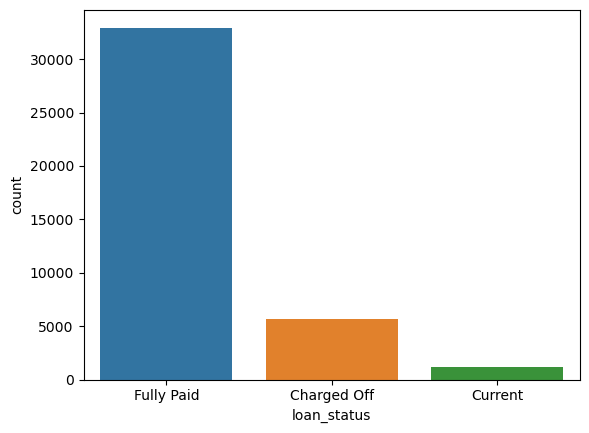

In [20]:
# Plotting to compare the rows against each of the status
sns.countplot(x = 'loan_status', data = ld)
plt.show()

In [21]:
# Exclude the rows with loan_status = 'Current', as out goal  is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
ld = ld[ld.loan_status != "Current"]
ld.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [22]:
ld.shape

(38577, 44)

In [23]:
# Since most of the loans are fully paid, check on the % of loans - status wise
(ld.loan_status.value_counts()*100)/len(ld)
# Approx. 83% of the loans are fully paid
# approx. 14% are defaulters
# approx 3% of are paying on-time

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [24]:
print("Purpose of Loan")
print(ld.purpose.value_counts())

Purpose of Loan
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64


In [25]:
#Check percentage of the Purpose for which the loans have been availed.
(ld.purpose.value_counts()*100)/len(ld)

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

In [26]:
#check for Public Record of bankruptcies
print(ld['pub_rec_bankruptcies'].unique())

[ 0.  1.  2. nan]


In [27]:
# Check for total rows with null Public Bankruptcies column
print(ld.pub_rec_bankruptcies.isnull().sum())

697


In [28]:
#Assuming that these nulls are due to the fact there is no known bankruptcies, update the nulls with "Unknown"
ld.pub_rec_bankruptcies.fillna('UnKnown',inplace=True)
#Check after filling the nulls
print(ld.pub_rec_bankruptcies.isnull().sum())

0


In [29]:
ld['pub_rec_bankruptcies_dive'] = ld.pub_rec_bankruptcies
ld['pub_rec_bankruptcies_dive'].replace(['UnKnown'], ['0.0'], inplace=True)
ld.pub_rec_bankruptcies_dive = ld.pub_rec_bankruptcies_dive.apply(pd.to_numeric)

In [30]:
#check datatypes and see whether there numberic fields all 0's
(ld.isna().sum()/len(ld.index))*100

id                           0.000000
member_id                    0.000000
loan_amnt                    0.000000
funded_amnt                  0.000000
funded_amnt_inv              0.000000
term                         0.000000
int_rate                     0.000000
installment                  0.000000
grade                        0.000000
sub_grade                    0.000000
emp_title                    6.185033
emp_length                   2.677761
home_ownership               0.000000
annual_inc                   0.000000
verification_status          0.000000
issue_d                      0.000000
loan_status                  0.000000
url                          0.000000
purpose                      0.000000
title                        0.028514
zip_code                     0.000000
addr_state                   0.000000
dti                          0.000000
delinq_2yrs                  0.000000
earliest_cr_line             0.000000
inq_last_6mths               0.000000
open_acc    

## Adding derived columns

In [31]:
# Lets look at the numeric data with any special characters
# Interest Rate and Revol Util (Revolving Credit Utilized) has %
ld['int_rate_dive'] = ld['int_rate'].str.rstrip('%')
ld['revol_util_dive'] = ld['revol_util'].str.rstrip('%')


In [32]:
ld[["int_rate_dive", "revol_util_dive"]]

int_rate_dive revol_util_dive
0             10.65           83.70
1             15.27            9.40
2             15.96           98.50
3             13.49              21
5              7.90           28.30
...             ...             ...
39712          8.07           13.10
39713         10.28           26.90
39714          8.07           19.40
39715          7.43            0.70
39716         13.75           51.50

[38577 rows x 2 columns]

In [33]:
ld.revol_util_dive.dtype

dtype('O')

#### Result 
- revol_util_dive, even thiugh we stipped the string values, it is still a object type, convert to numeric

In [34]:
ld.revol_util_dive = ld.revol_util_dive.apply(pd.to_numeric)

In [35]:
# Check whether conversion worked.
ld.revol_util_dive.dtype

dtype('float64')

In [36]:
#check Revolving Credit Utilization
ld['revol_util_dive']

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util_dive, Length: 38577, dtype: float64

In [37]:
# Covert derived column int_rate_dive to numeric
ld.int_rate_dive = ld.int_rate_dive.apply(pd.to_numeric)

In [38]:
# Check for emp_length (Employment Length)
# Employment Length should be numeric, replace null with '< 1 year' (assuming that the null value for this means that borrower has no emmployment history)
# Will use lambda here as need to replaces years and +
ld.emp_length.fillna('< 1 year',inplace=True)
ld['emp_length_dive']=ld.emp_length.str.extract('(\d+)')
# Note - Adding a derived column instead of updating the existing column.

In [39]:
#check Emp Length
ld['emp_length_dive']

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length_dive, Length: 38577, dtype: object

In [40]:
ld.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [41]:
ld.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [42]:
#ld['home_ownership'].replace(['NONE'], ['OTHER'], inplace=True)

In [43]:
# List the columns now
ld.dtypes

id                             int64
member_id                      int64
loan_amnt                      int64
funded_amnt                    int64
funded_amnt_inv              float64
term                          object
int_rate                      object
installment                  float64
grade                         object
sub_grade                     object
emp_title                     object
emp_length                    object
home_ownership                object
annual_inc                   float64
verification_status           object
issue_d                       object
loan_status                   object
url                           object
purpose                       object
title                         object
zip_code                      object
addr_state                    object
dti                          float64
delinq_2yrs                    int64
earliest_cr_line              object
inq_last_6mths                 int64
open_acc                       int64
p

#### Observation 
- Derived columns added int_rate_dive and emp_length_dive are of object type, conver them to numeric.

In [44]:
#new derived column int_rate_dive is object type, convert to numeric
ld.int_rate_dive = ld.int_rate_dive.apply(pd.to_numeric)
ld.emp_length_dive = ld.emp_length_dive.apply(pd.to_numeric)
#ld.pub_rec_bankruptcies  = ld.pub_rec_bankruptcies.apply(pd.to_numeric)

In [45]:
#Checking Annual income, it float converting it to integer, so that we can create bins
ld['annual_inc'] = ld['annual_inc'].astype(int)

In [46]:
# Creating Annual Income Categorical data
cut_bins = [0, 5000, 10000, 20000, 30000, 50000, 75000, 100000, 200000, 300000, 500000, 800000, 1000000, 1500000, 2000000]
cut_lables = ['0 - 5000', '5000 - 10000', '10000 - 20000', '20000 - 30000', '30000 - 50000', '50000 - 75000', '75000 - 100000', '100000 - 200000', '200000 - 300000', '300000 - 500000', '500000 - 800000', '800000 - 1000000', '1000000 - 1500000', ' > 1500000']
ld['annual_inc_dive'] = pd.cut(x=ld['annual_inc'], bins = cut_bins, labels = cut_lables)

In [47]:
#Check annaul_inc_dive
ld['annual_inc_dive']

0          20000 - 30000
1          20000 - 30000
2          10000 - 20000
3          30000 - 50000
5          30000 - 50000
              ...       
39712    100000 - 200000
39713      10000 - 20000
39714     75000 - 100000
39715    100000 - 200000
39716      20000 - 30000
Name: annual_inc_dive, Length: 38577, dtype: category
Categories (14, object): ['0 - 5000' < '5000 - 10000' < '10000 - 20000' < '20000 - 30000' ... '500000 - 800000' < '800000 - 1000000' < '1000000 - 1500000' < ' > 1500000']

In [48]:
# Create categorical derived column for Interest Rate
ld['int_rate_dive2'] = pd.cut(ld['int_rate_dive'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

In [49]:
# Create categorical Derived Column for Open_acc
ld['open_acc_dive'] = pd.cut(ld['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

In [50]:
#Create categorical derived column for revol_util
ld['revol_util_dive2'] = pd.cut(ld['revol_util_dive'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])

In [51]:
#Create categorical derived column for total_acc_dive
ld['total_acc_dive'] = pd.cut(ld['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])

In [52]:
#issue_d column is object type, convert from Object to date time
ld['issue_d'] = pd.to_datetime(ld.issue_d.str.upper(), format='%b-%y', yearfirst=False)
print(ld.issue_d)

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]


In [53]:
#Add Derived Columns - Year, Month from issue_d
ld['issue_d_yr'] = ld.issue_d.dt.year
ld['issue_d_mth'] = ld.issue_d.dt.strftime('%b')
print(ld.issue_d_yr, ld.issue_d_mth)
#not extracting day or weekday, as the issue_d is in 'MMM-YY' format in excel and the dd is always 1st of the month.

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_d_yr, Length: 38577, dtype: int64 0        Dec
1        Dec
2        Dec
3        Dec
5        Dec
        ... 
39712    Jul
39713    Jul
39714    Jul
39715    Jul
39716    Jun
Name: issue_d_mth, Length: 38577, dtype: object


In [54]:
#issue_d column convert from Object to date time
ld['earliest_cr_line'] = pd.to_datetime(ld.earliest_cr_line.str.upper(), format='%b-%y', yearfirst=False)
print(ld.earliest_cr_line)

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
5       2004-11-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line, Length: 38577, dtype: datetime64[ns]


In [55]:
# Repeat same for earliest_cr_line (as in case of issue_d)
ld['earliest_cr_line_yr'] = ld.earliest_cr_line.dt.year
ld['earliest_cr_line_mth'] = ld.earliest_cr_line.dt.strftime('%b')
print(ld.earliest_cr_line_yr, ld.earliest_cr_line_mth)
#not extracting day or weekday, as the earliest_cr_line is in 'MMM-YY' format in excel and the dd is always 1st of the month.

0        1985
1        1999
2        2001
3        1996
5        2004
         ... 
39712    1990
39713    1986
39714    1998
39715    1988
39716    2003
Name: earliest_cr_line_yr, Length: 38577, dtype: int64 0        Jan
1        Apr
2        Nov
3        Feb
5        Nov
        ... 
39712    Nov
39713    Dec
39714    Oct
39715    Nov
39716    Oct
Name: earliest_cr_line_mth, Length: 38577, dtype: object


In [56]:
# Convert Loan Status Categories to numeric data for plotting
ld['loan_status_dive'] = ld['loan_status']
ld['loan_status_dive'].replace(['Fully Paid','Charged Off'],
                        [0, 1], inplace=True)
#Convert derived column to numeric
ld['loan_status_dive'] = ld['loan_status_dive'].astype(int)
ld[['loan_status_dive', 'loan_status']]

loan_status_dive  loan_status
0                     0   Fully Paid
1                     1  Charged Off
2                     0   Fully Paid
3                     0   Fully Paid
5                     0   Fully Paid
...                 ...          ...
39712                 0   Fully Paid
39713                 0   Fully Paid
39714                 0   Fully Paid
39715                 0   Fully Paid
39716                 0   Fully Paid

[38577 rows x 2 columns]

In [57]:
ld['installment_dive'] = pd.cut(ld['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
ld['funded_amnt_inv_dive'] = pd.cut(ld['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
ld['funded_amnt_dive'] = pd.cut(ld['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
ld['loan_amnt_dive'] = pd.cut(ld['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
ld['dti_dive'] = pd.cut(ld['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [58]:
#Checking whether Funded Amount is same as requested loan amount, and what percentage of the requested loan amount has been sanctioned
#loan_amnt                              int64
#funded_amnt                            int64
#funded_amnt_inv                      float64
ld['approved_loan_amnt_ratio'] = round(ld.funded_amnt_inv*100/ld.loan_amnt,2)

In [59]:
#check whether all derived columns have been added.
ld.dtypes

id                             int64
member_id                      int64
loan_amnt                      int64
funded_amnt                    int64
funded_amnt_inv              float64
                              ...   
funded_amnt_inv_dive        category
funded_amnt_dive            category
loan_amnt_dive              category
dti_dive                    category
approved_loan_amnt_ratio     float64
Length: 64, dtype: object

In [60]:
ld.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'pub_rec_bankruptcies_dive', 'int_rate_dive',
       'revol_util_dive', 'emp_length_dive', 'annual_inc_dive',
       'int_rate_dive2', 'open_acc_dive', 'revol_util_dive2', 'total_acc_dive',
       'issue_d_yr', 'issue_d_mth', 'earliest_cr_line_yr',
       'earliest_cr_lin

#### Checking for Outliers
- Important to check the columns having amounts - annual_inc, loan_amnt,funded_amnt, funded_amnt_inv, dti

<AxesSubplot:xlabel='annual_inc'>

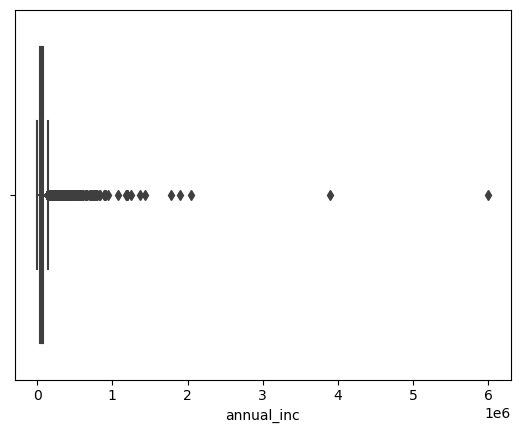

In [61]:
# Annual Income.
sns.boxplot(ld['annual_inc'])

#### Observation - From the Box Plot, it is clear that there outliers in the annual income column
Action - 
- Remove them
- How : Criteria Used - Values above 0.95 percentile seem to be out of place. Hence, consdering to retain values which are only <= 0.95 quantile.

In [62]:
annual_inc_quantile_info = ld.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
annual_inc_quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [63]:
ld['annual_inc'].quantile(0.95)

140004.0

In [64]:
# Selecting annual_inc less than or equal to 0.95 quantile value
annual_inc_95_quantile = ld['annual_inc'].quantile(0.95)
ld = ld[ld.annual_inc <= annual_inc_95_quantile]

In [65]:
ld.annual_inc.describe()

count     36654.000000
mean      60855.744994
std       27750.285238
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

In [66]:
ld.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count     36654.000000
mean      60855.744994
std       27750.285238
min        4000.000000
5%        24000.000000
10%       29120.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
90%      100000.000000
95%      117000.000000
99%      135000.000000
max      140004.000000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

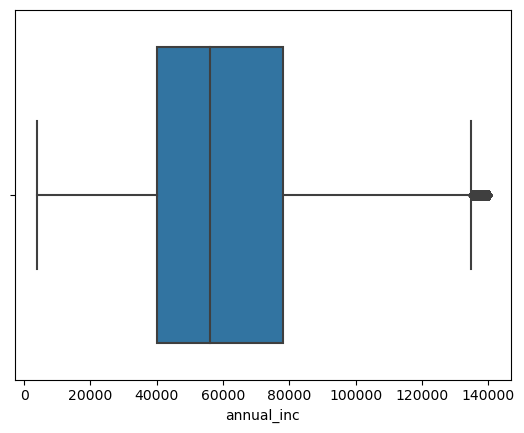

In [67]:
# Lets check the box plot now
sns.boxplot(ld['annual_inc'])

<AxesSubplot:xlabel='loan_amnt'>

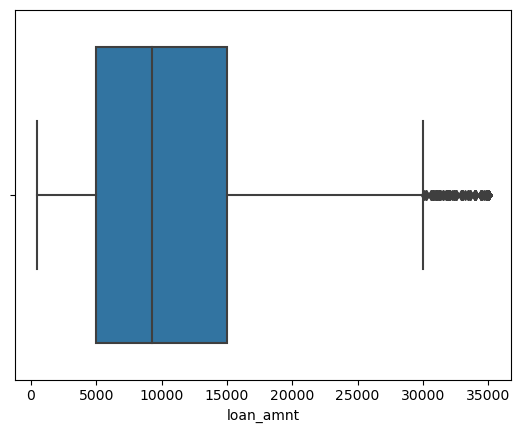

In [68]:
# loan_amnt
sns.boxplot(ld['loan_amnt'])

<AxesSubplot:xlabel='funded_amnt'>

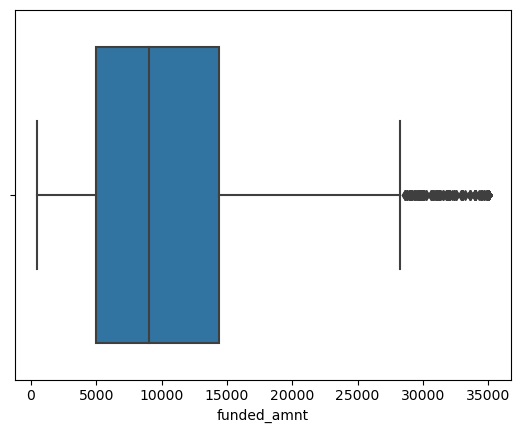

In [69]:
# funded_amnt
sns.boxplot(ld['funded_amnt'])

<AxesSubplot:xlabel='funded_amnt_inv'>

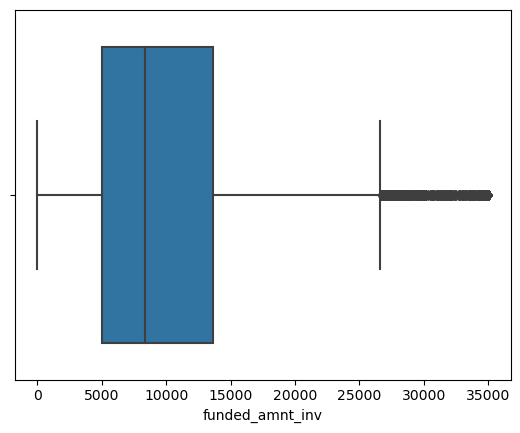

In [70]:
# funded_amnt_inv
sns.boxplot(ld['funded_amnt_inv'])

<AxesSubplot:xlabel='dti'>

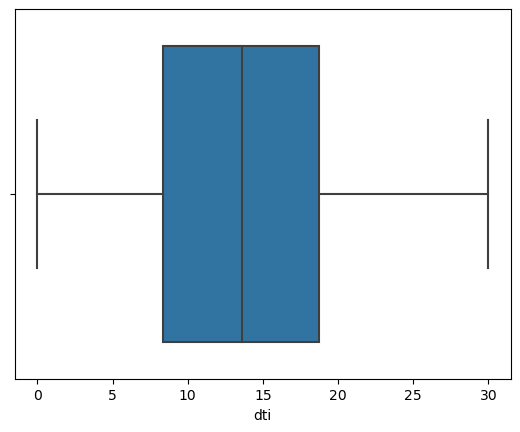

In [71]:
# dti
sns.boxplot(ld['dti'])

#### Observation - There are some outliers for Loan amount, funded amounts. Lets check whether they are continous.
- If they are continous then no need to remove them.

In [72]:
# loan_amnt
ld.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

In [73]:
ld.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
5%        2250.000000
10%       3000.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [74]:
# funded_amnt
ld.funded_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    14400.0
0.900    20000.0
0.950    25000.0
0.970    25000.0
0.975    26000.0
0.980    28100.0
0.990    34000.0
1.000    35000.0
Name: funded_amnt, dtype: float64

In [75]:
ld.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36654.000000
mean     10436.144077
std       6800.636737
min        500.000000
5%        2200.000000
10%       3000.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
90%      20000.000000
95%      25000.000000
99%      34000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [76]:
# funded_amnt_inv
ld.funded_amnt_inv.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    13623.731415
0.900    19750.000000
0.950    23941.875589
0.970    24975.000000
0.975    25350.000000
0.980    27950.000000
0.990    31954.028576
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

In [77]:
ld.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36654.000000
mean      9894.181349
std       6730.756232
min          0.000000
5%        1800.000000
10%       2800.000000
25%       4975.000000
50%       8375.000000
75%      13623.731415
90%      19750.000000
95%      23941.875589
99%      31954.028576
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [78]:
# though there are no outliers for dti, we still check the data continuity
ld.dti.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    18.7100
0.900    22.3900
0.950    23.8535
0.970    24.5400
0.975    24.7000
0.980    24.8800
0.990    26.6494
1.000    29.9900
Name: dti, dtype: float64

In [79]:
ld.dti.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36654.000000
mean        13.446725
std          6.661899
min          0.000000
5%           2.206500
10%          4.170000
25%          8.350000
50%         13.580000
75%         18.710000
90%         22.390000
95%         23.853500
99%         26.649400
max         29.990000
Name: dti, dtype: float64

In [80]:
# Creating Dataframe for Charged off Loans only
Charged_off_df = ld[ld.loan_status == 'Charged Off']
Charged_off_df.shape

(5418, 64)

In [ ]:
## Observation :
- Data Cleaning:
    - Removal (Dropping) of Columns with all null values
    - Removal (Dropping) of Columns with only one data value.
    - Removal of Outliers
- Data Handling :
    - Creation (adding) of Derived Columns
    - Creation (adding) of Category Columns, based on the analysis of the Category and Series data columns.
    - Conversion of the Data Types
    - Creation of Dataframe for Charged Off Loans.
    

## Univariate Analysis

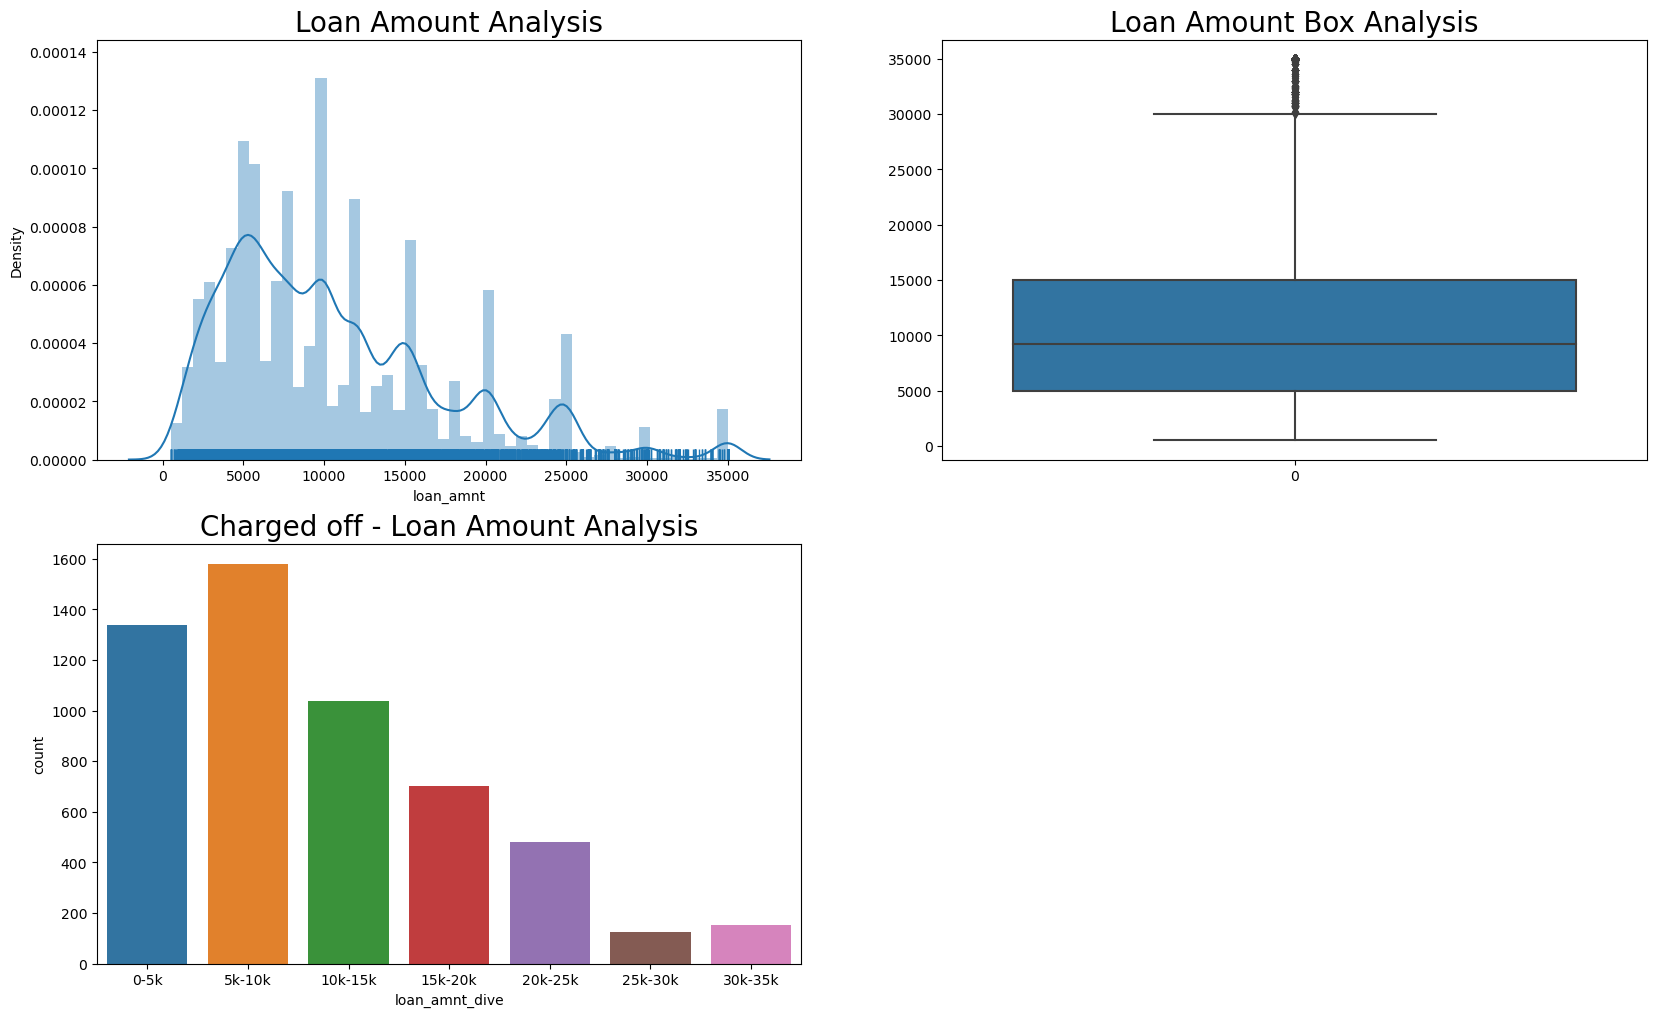

In [81]:
# Loan Amount - sns plots
plt.figure(figsize=(20,12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.loan_amnt, rug=True)
plt.title('Loan Amount Analysis', size=20)

#Box plot
plt.subplot(2,2,2)
sns.boxplot(data=ld.loan_amnt)
plt.title('Loan Amount Box Analysis', size=20)

# Charge Off Loans
plt.subplot(2,2,3)
#sns.distplot(a=Charged_off_df.loan_amnt, rug=True)
sns.countplot(x='loan_amnt_dive', data=Charged_off_df)
plt.title('Charged off - Loan Amount Analysis', size=20)

plt.show()

#### Observation 
- Majority of Applicants availed loan amount of 10k and fewer applicants took loan above 30k
- Charged Off Loans
    - Majority of the defaulter have availed between 5k - 10k loan amount, followed by those who have availed between 10k - 15k.

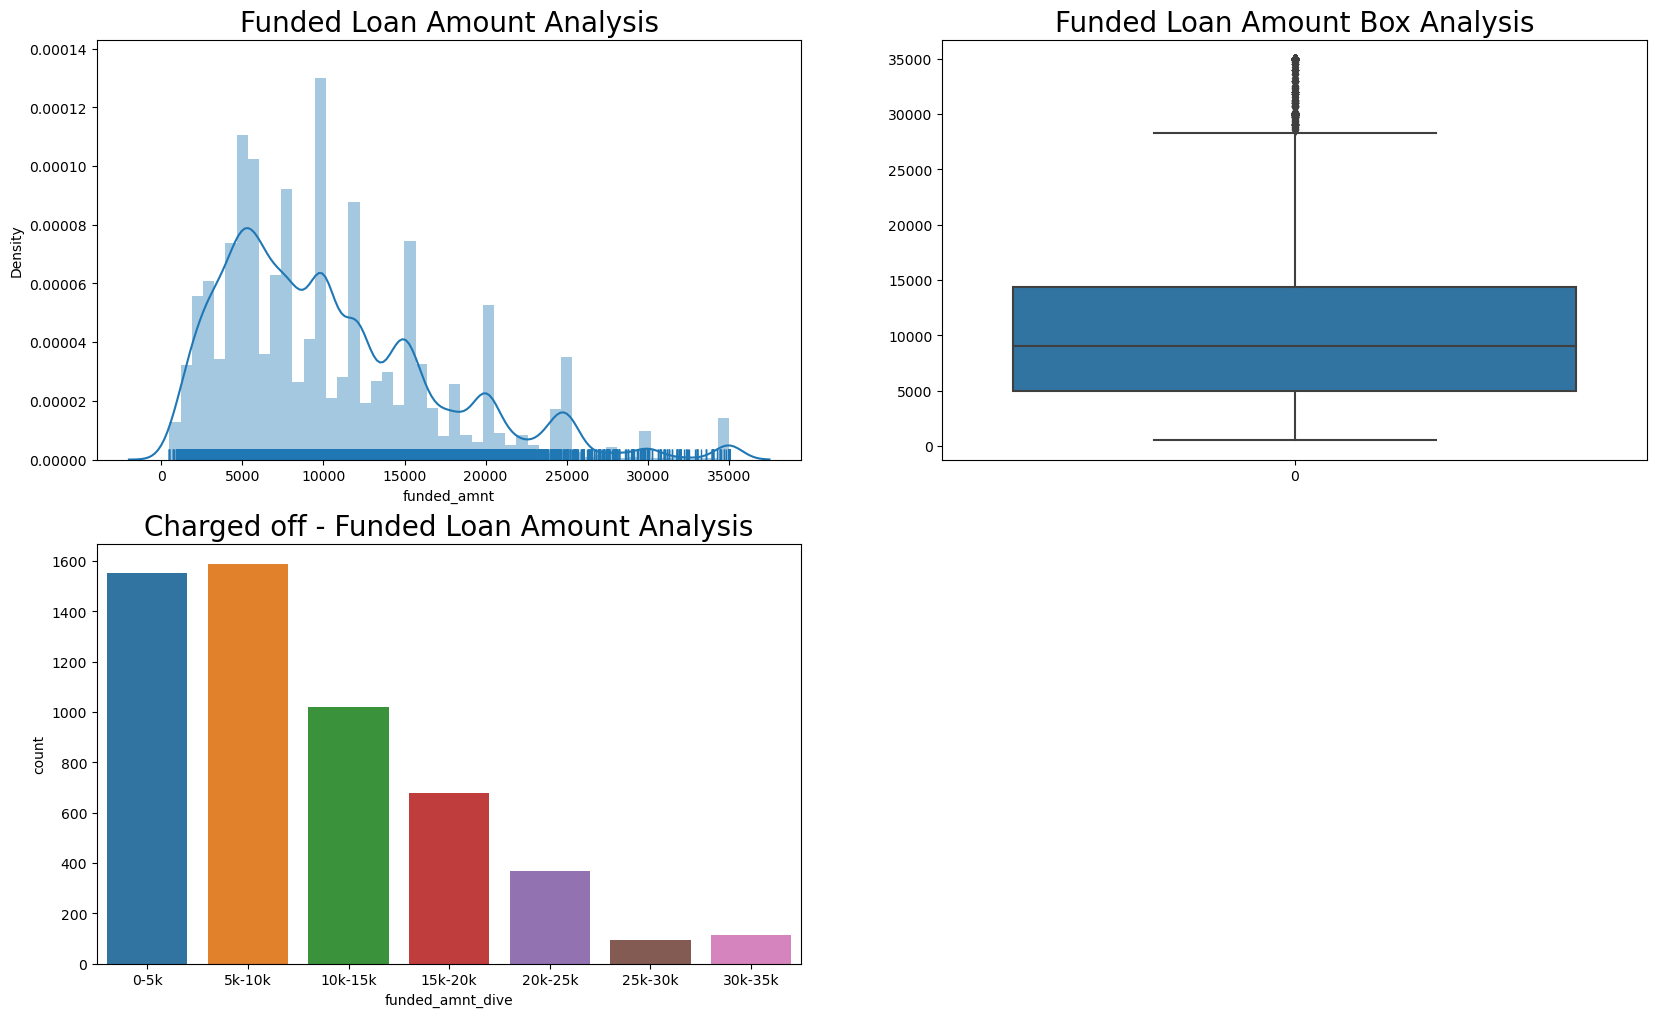

In [82]:
# Lets look at Funded Amount - Which is the committed amount to the applicant
# Funded Amount - sns plots
plt.figure(figsize=(20,12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.funded_amnt, rug=True)
plt.title('Funded Loan Amount Analysis', size=20)
plt.subplot(2,2,2)
#Box plot
sns.boxplot(data=ld.funded_amnt)
plt.title('Funded Loan Amount Box Analysis', size=20)

# Charge Off Loans
plt.subplot(2,2,3)
#sns.distplot(a=Charged_off_df.loan_amnt, rug=True)
sns.countplot(x='funded_amnt_dive', data=Charged_off_df)
plt.title('Charged off - Funded Loan Amount Analysis', size=20)

plt.show()

#### Observation 
- Funded Amount plots are similar to loan amount.
- Charged Off Loans
    - Loans Funded <= 10k have majority of the defaulters.

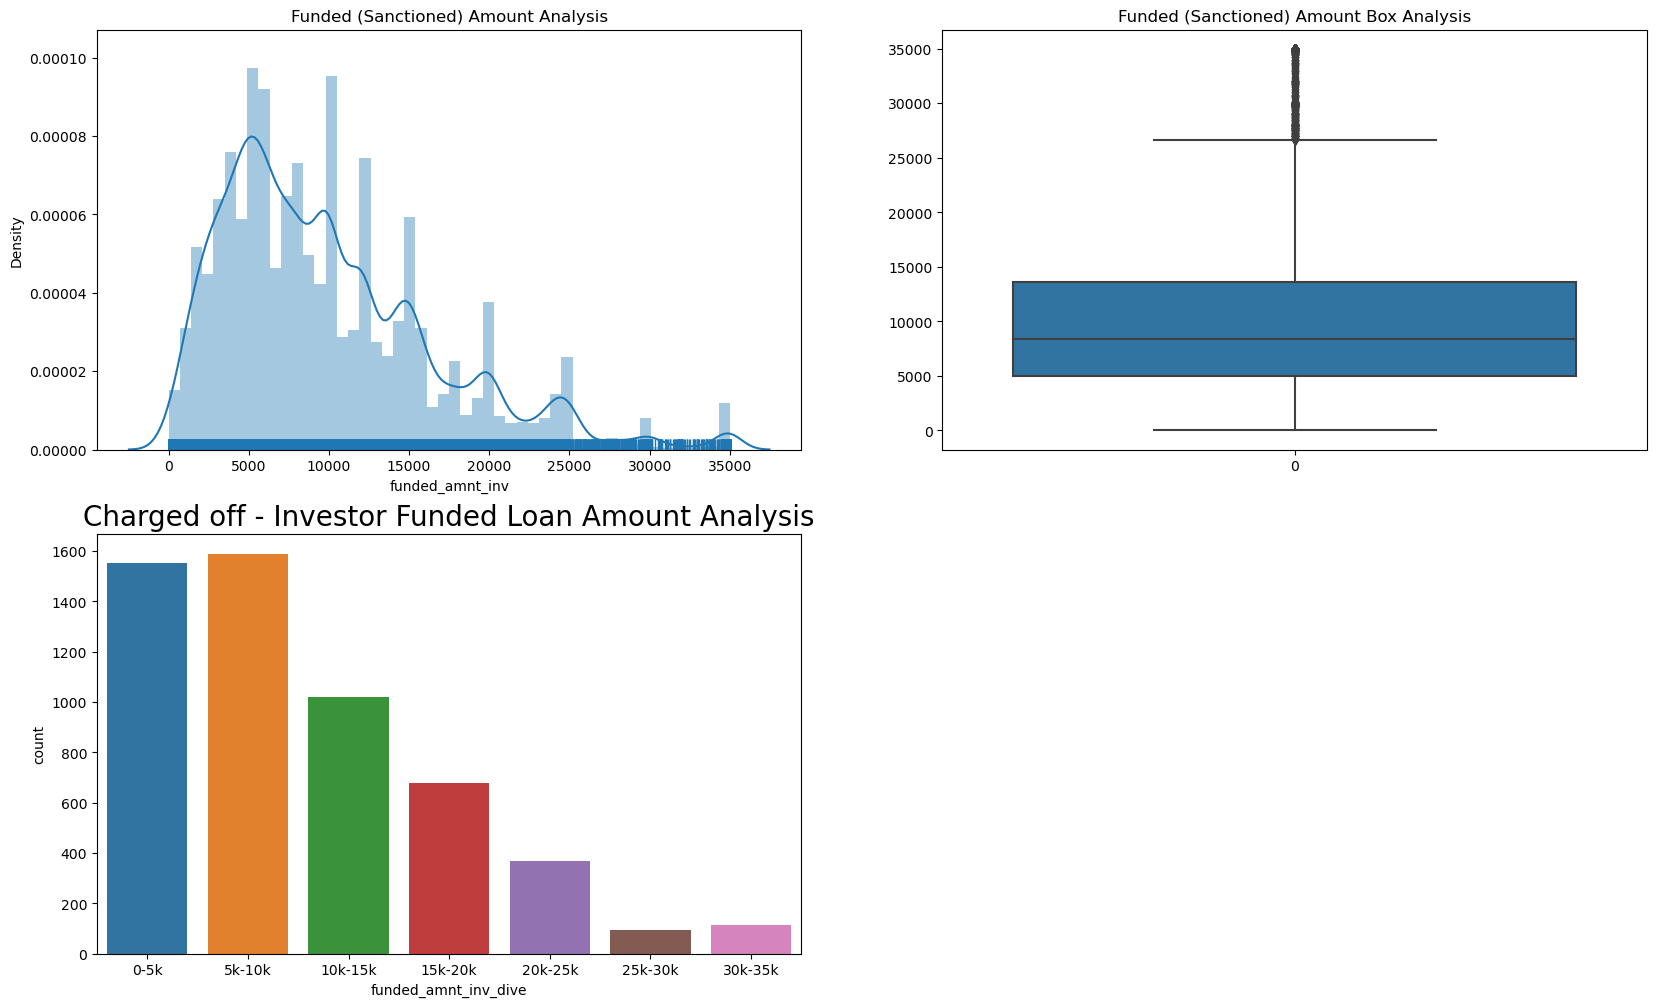

In [83]:
# Funded Amount invested - The amount funded by the investors.
# Funded Amount Invested - sns plots
plt.figure(figsize=(20,12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.funded_amnt_inv, rug=True)
plt.title('Funded (Sanctioned) Amount Analysis')
plt.subplot(2,2,2)
#Box plot
sns.boxplot(data=ld.funded_amnt_inv)
plt.title('Funded (Sanctioned) Amount Box Analysis')

# Charge Off Loans
plt.subplot(2,2,3)
#sns.distplot(a=Charged_off_df.loan_amnt, rug=True)
sns.countplot(x='funded_amnt_inv_dive', data=Charged_off_df)
plt.title('Charged off - Investor Funded Loan Amount Analysis', size=20)
plt.show()

#### Observation 
- Funded Amount Invested plots are similar to the loan amount and Funded amount
- Charged off Loans
    - Majority of loans Defaulted are with Funded amount <= 10K.

Remember earlier we had checked Ratio between Requested amount vs. the actual funded amount and derived a column "approved_loan_amnt_ratio"


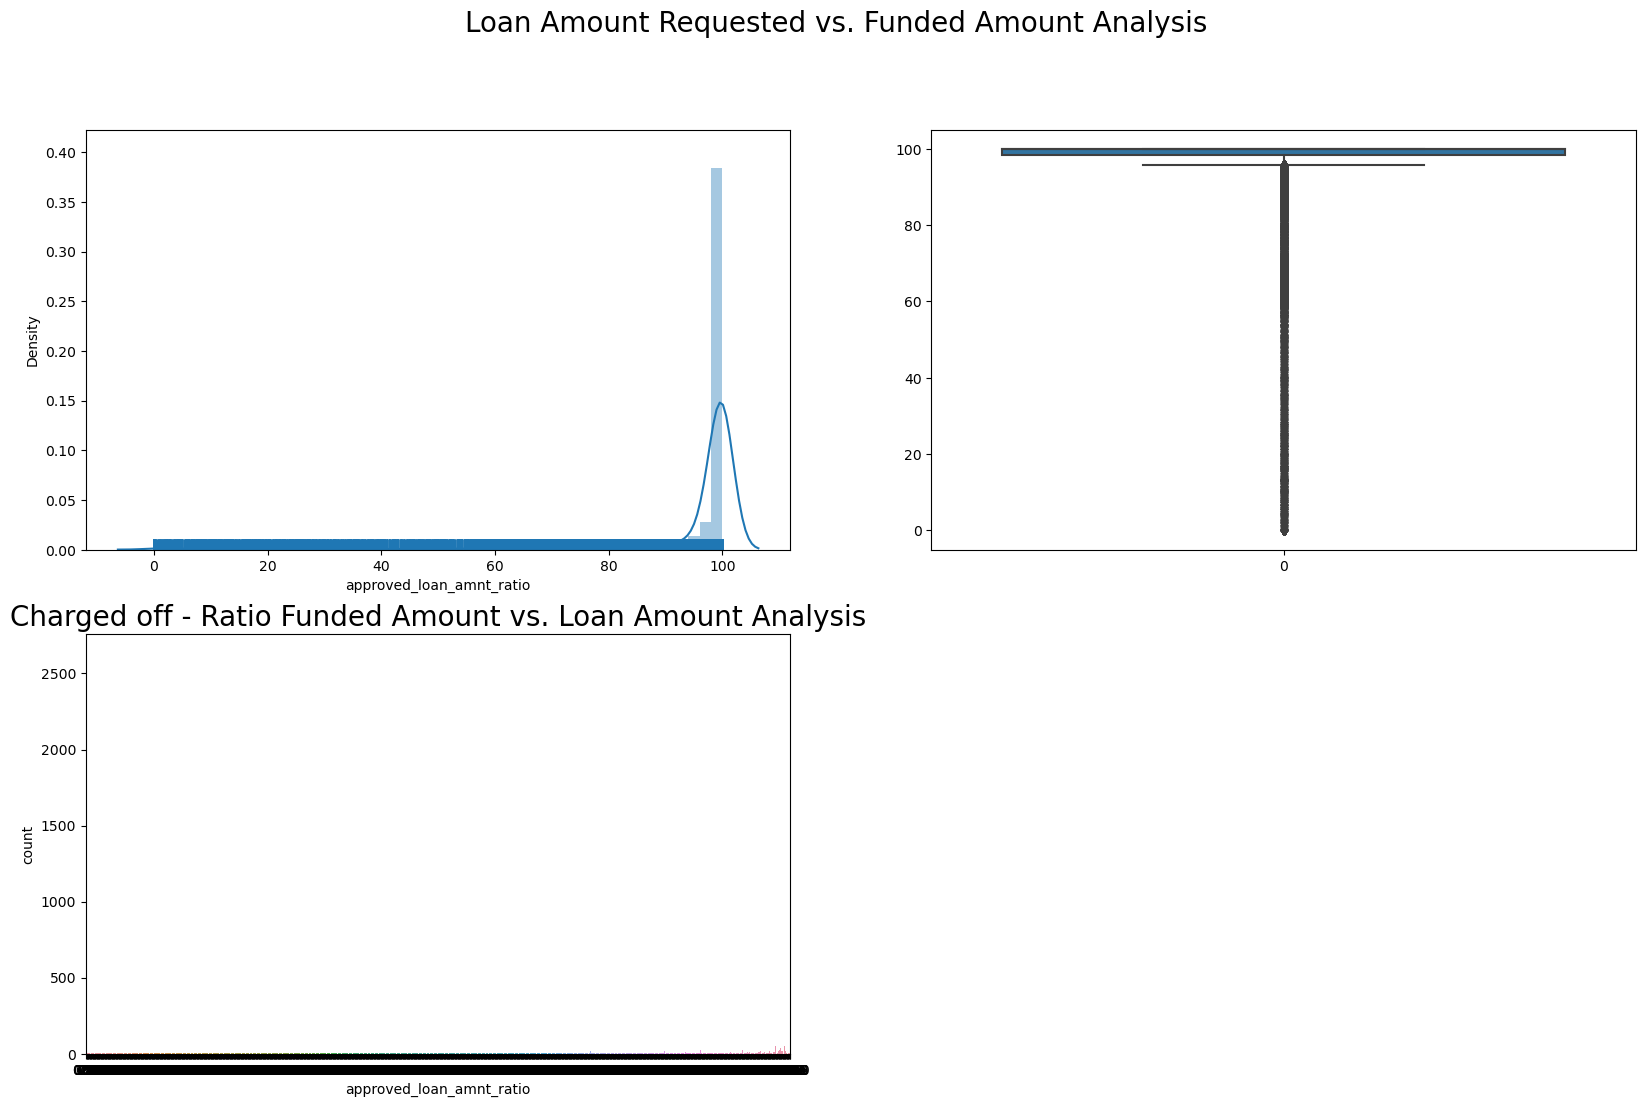

In [84]:
# Lets check what % of applicants received 100% of the request loan amount.
#approved_loan_amnt_ratio
plt.figure(figsize=(20,12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.approved_loan_amnt_ratio, rug=True)
plt.subplot(2,2,2)
#Box plot
sns.boxplot(data=ld.approved_loan_amnt_ratio)
plt.suptitle('Loan Amount Requested vs. Funded Amount Analysis', size=20)

# Charge Off Loans
plt.subplot(2,2,3)
sns.countplot(x='approved_loan_amnt_ratio', data=Charged_off_df)
plt.title('Charged off - Ratio Funded Amount vs. Loan Amount Analysis', size=20)

plt.show()

#### Observation 
- 50% of the loan Applicants received 100% of the loan amount requested.
- Charged Off Loans
    - Charged off Loans were 100% sanctioned as per the requested loan amount.

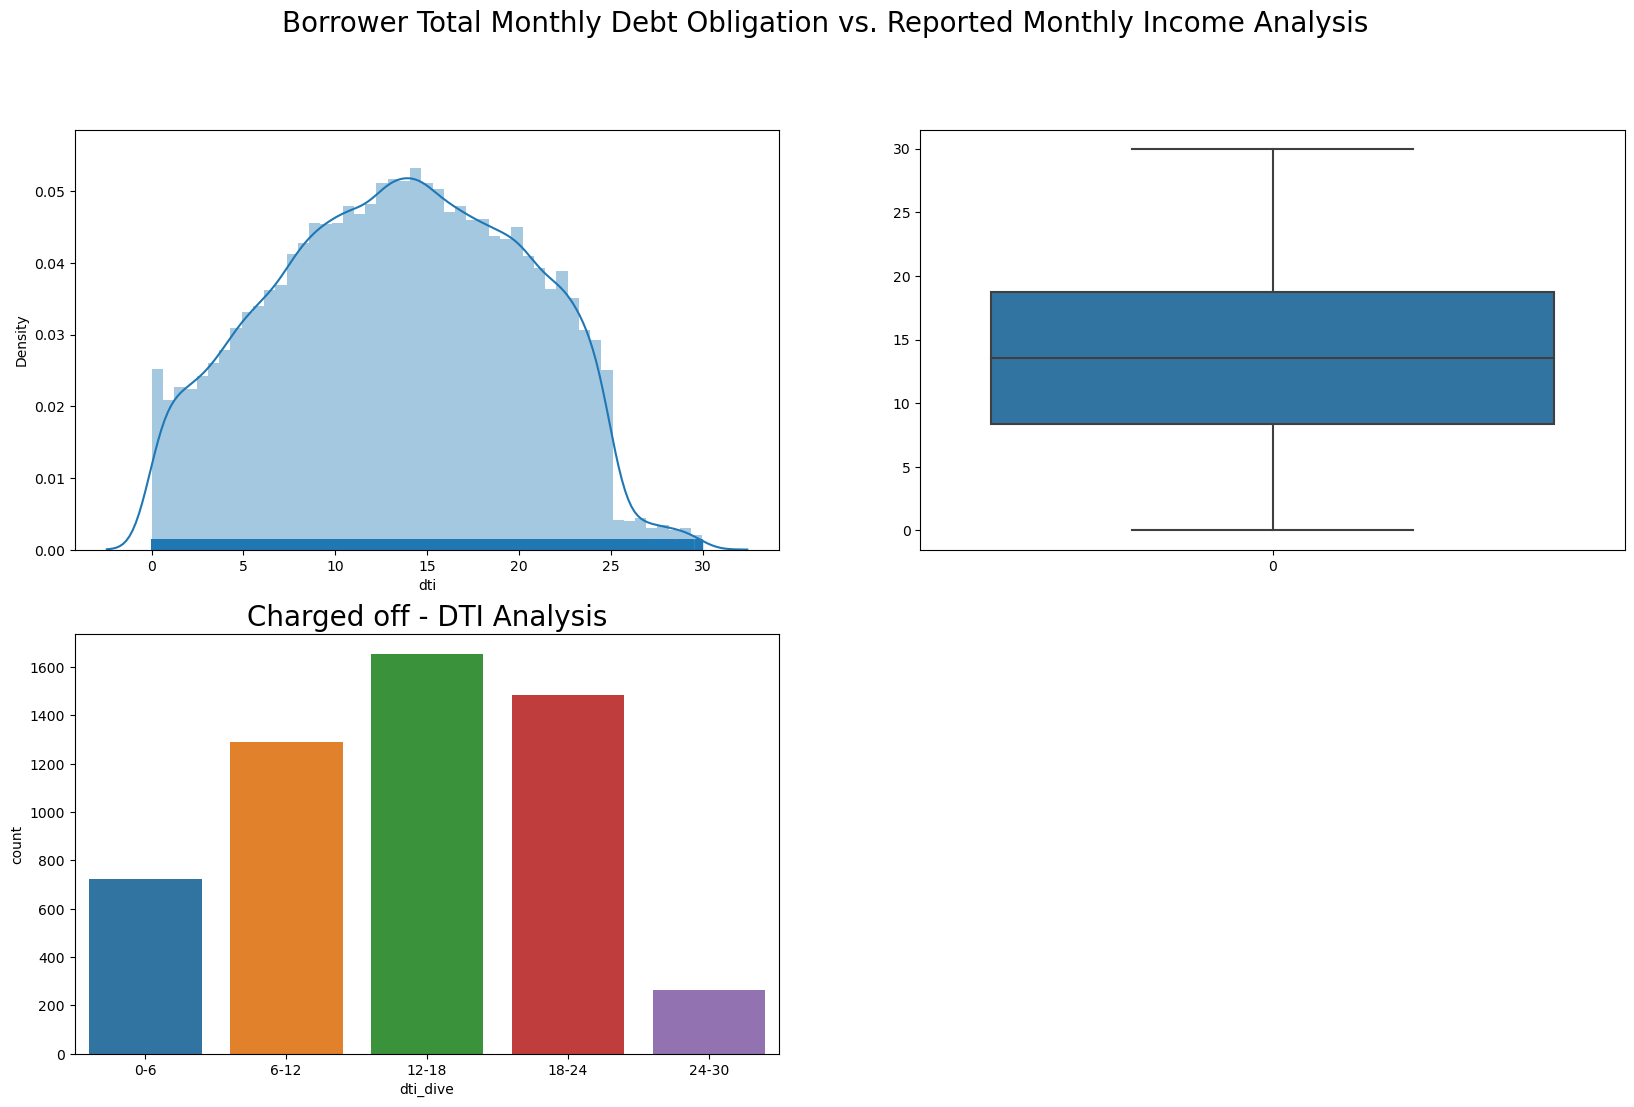

In [85]:
#dti
plt.figure(figsize=(20,12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.dti, rug=True)
plt.subplot(2,2,2)
#Box plot
sns.boxplot(data=ld.dti)
plt.suptitle('Borrower Total Monthly Debt Obligation vs. Reported Monthly Income Analysis', size=20)

# Charged off Loans
plt.subplot(2,2,3)
sns.countplot(x='dti_dive', data=Charged_off_df)
plt.title('Charged off - DTI Analysis', size=20)

plt.show()

#### Observation 
- DTI has clear bell curve and people with average imcome have highest monthly debt.
- Charged Off Loans
    - Majority of the Defaulters are between range of 12- 18 DTI.

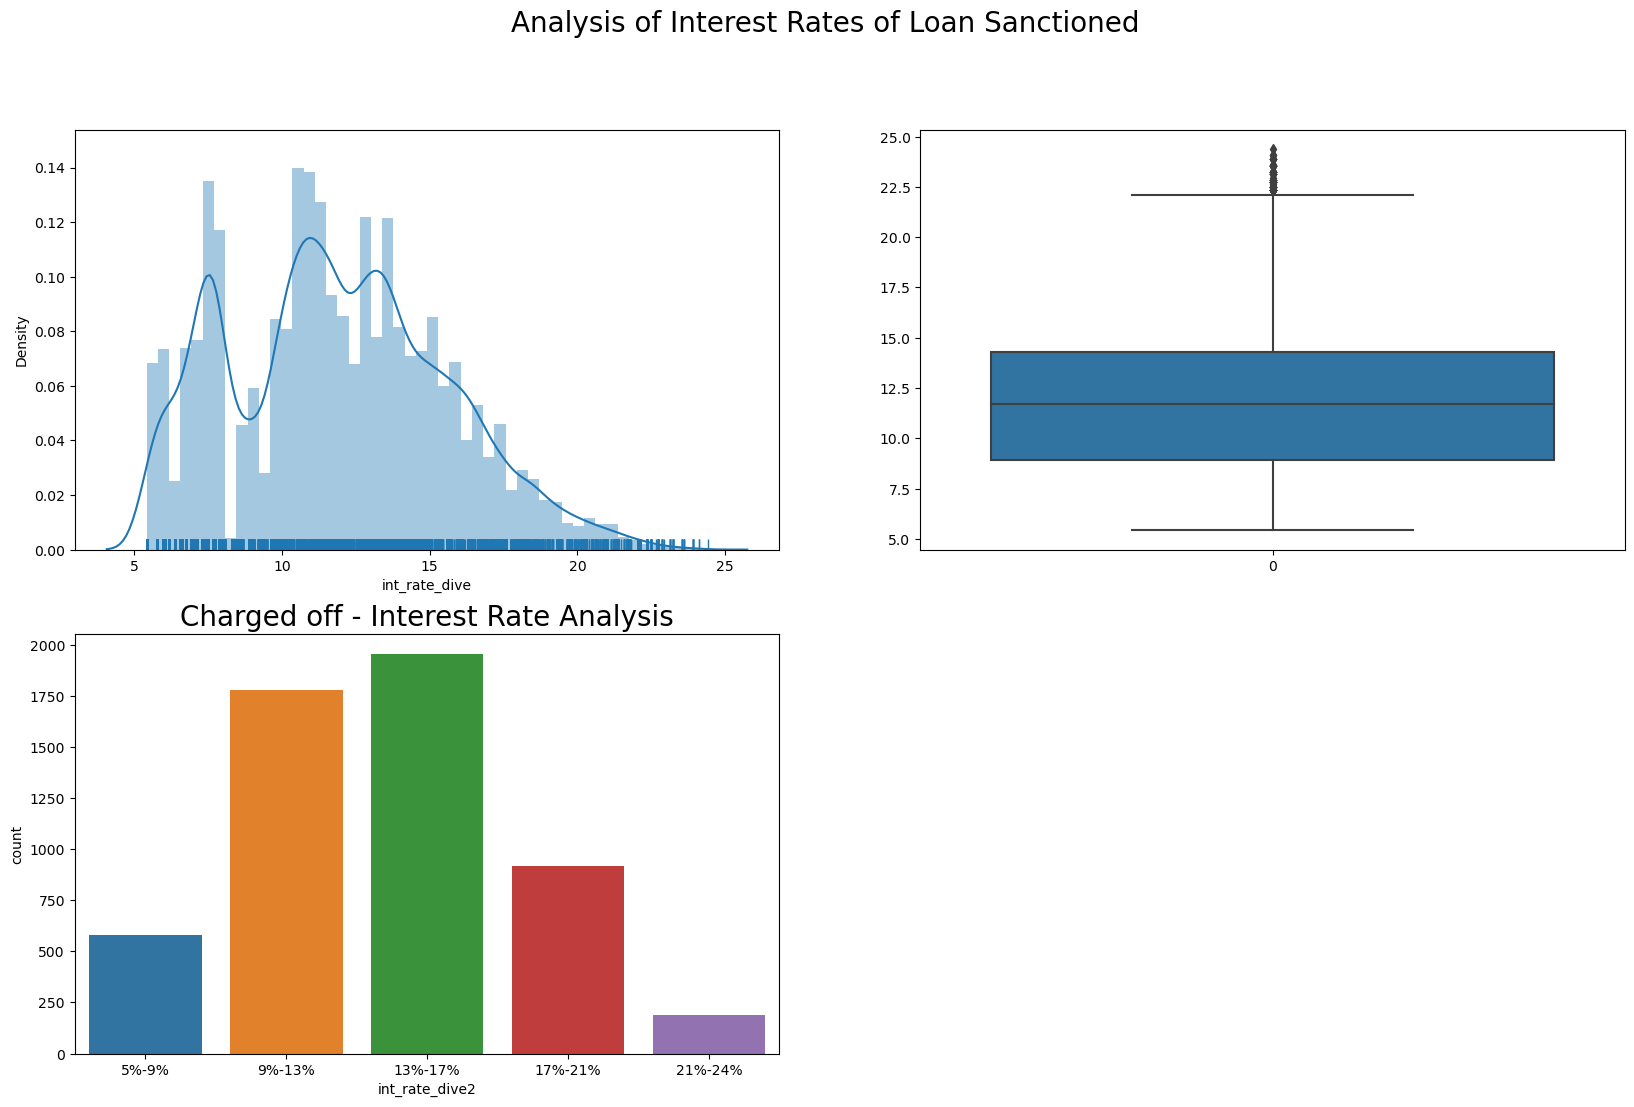

In [86]:
# Check for Interest Rate
plt.figure(figsize=(20, 12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.int_rate_dive, rug=True)
plt.subplot(2,2,2)
#Box plot
sns.boxplot(data=ld.int_rate_dive)
plt.suptitle('Analysis of Interest Rates of Loan Sanctioned', size=20)

# Charge Off Loans
plt.subplot(2,2,3)
sns.countplot(x='int_rate_dive2', data=Charged_off_df)
plt.title('Charged off - Interest Rate Analysis', size=20)


plt.show()

#### Observation 
- Majority of the Loan Applicants were sanctioned loans with interest rate rande between 9% (approx.) - 14% (approx.).
- Charged Off Loans
    - Majority of the Defaulters are the ones who were sanctioned loan with interest between 9 - 17%

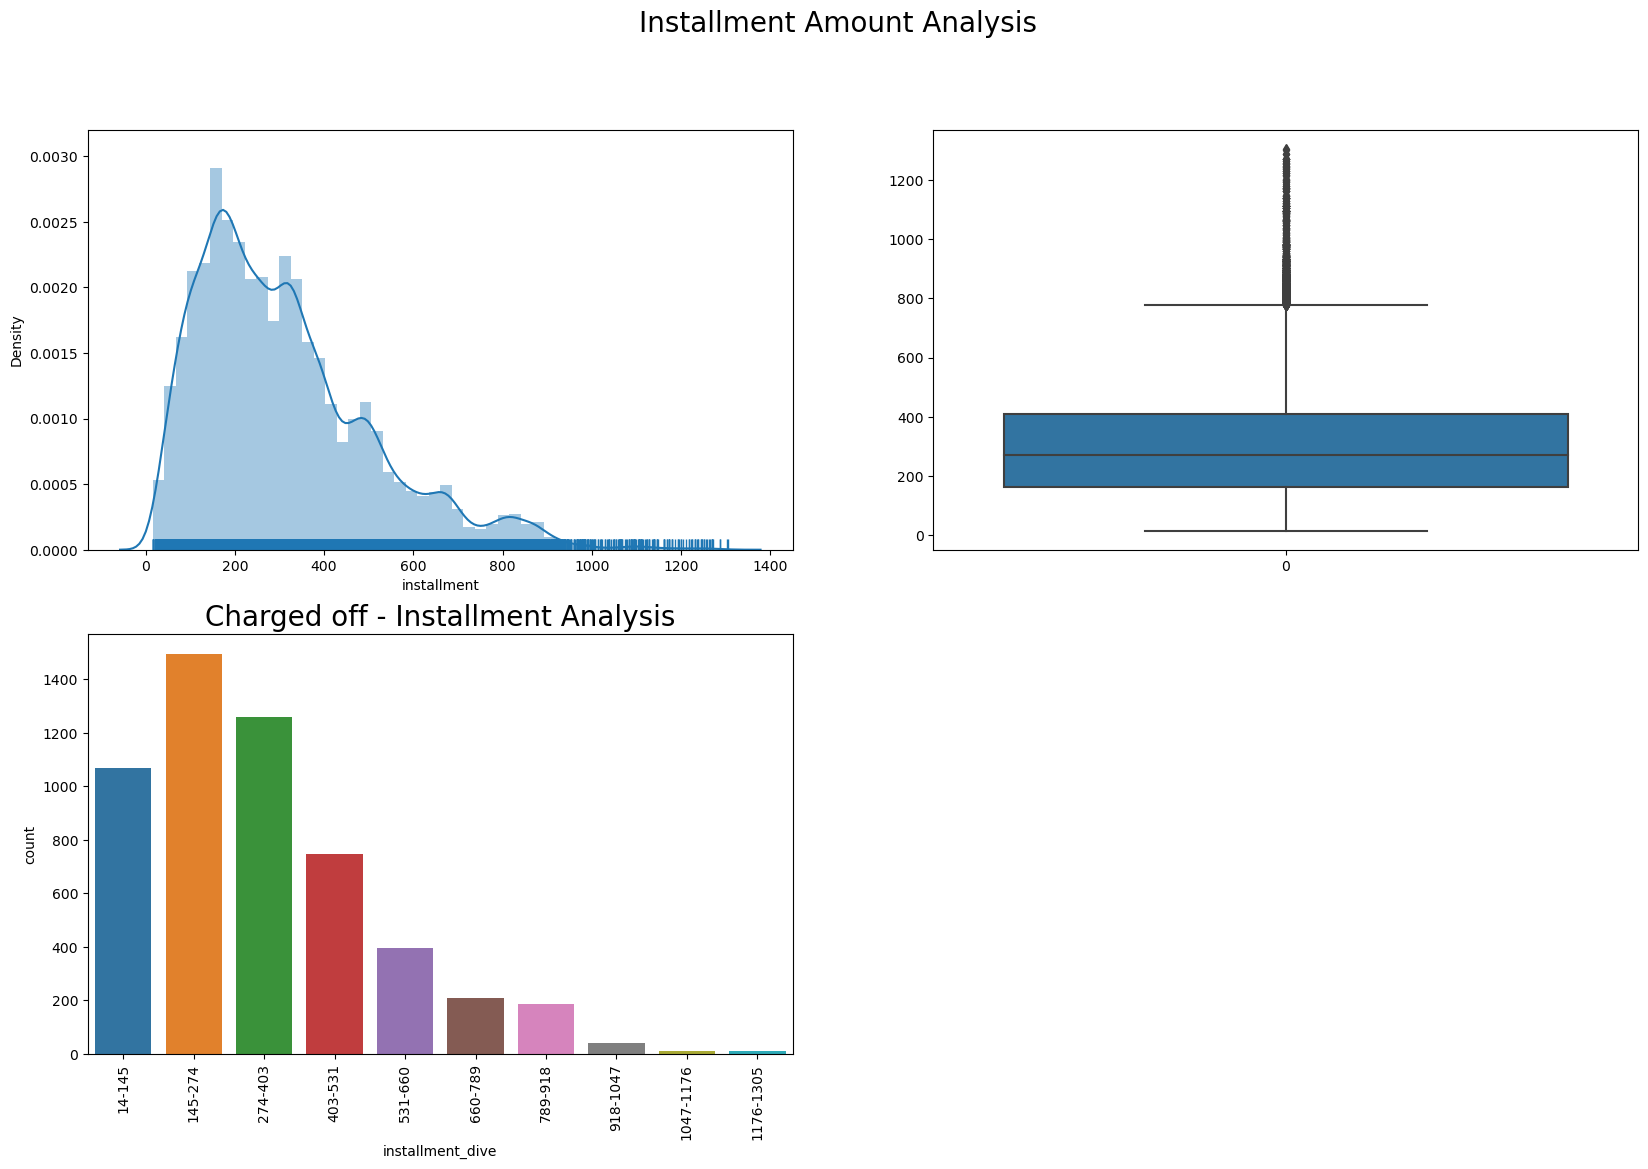

In [87]:
# Check for installment
plt.figure(figsize=(20, 12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.installment, rug=True)
plt.subplot(2,2,2)
#Box plot
sns.boxplot(data=ld.installment)
plt.suptitle('Installment Amount Analysis', size=20)

# Charge Off Loans
plt.subplot(2,2,3)
sns.countplot(x='installment_dive', data=Charged_off_df)
plt.xticks(rotation=90)
plt.title('Charged off - Installment Analysis', size=20)
plt.show()

#### Observation 
- Most of the applicatis have Installment amount around 270.
- Charge Off Loans
    - Majority of the defaulters had installment in range of 145 - 274

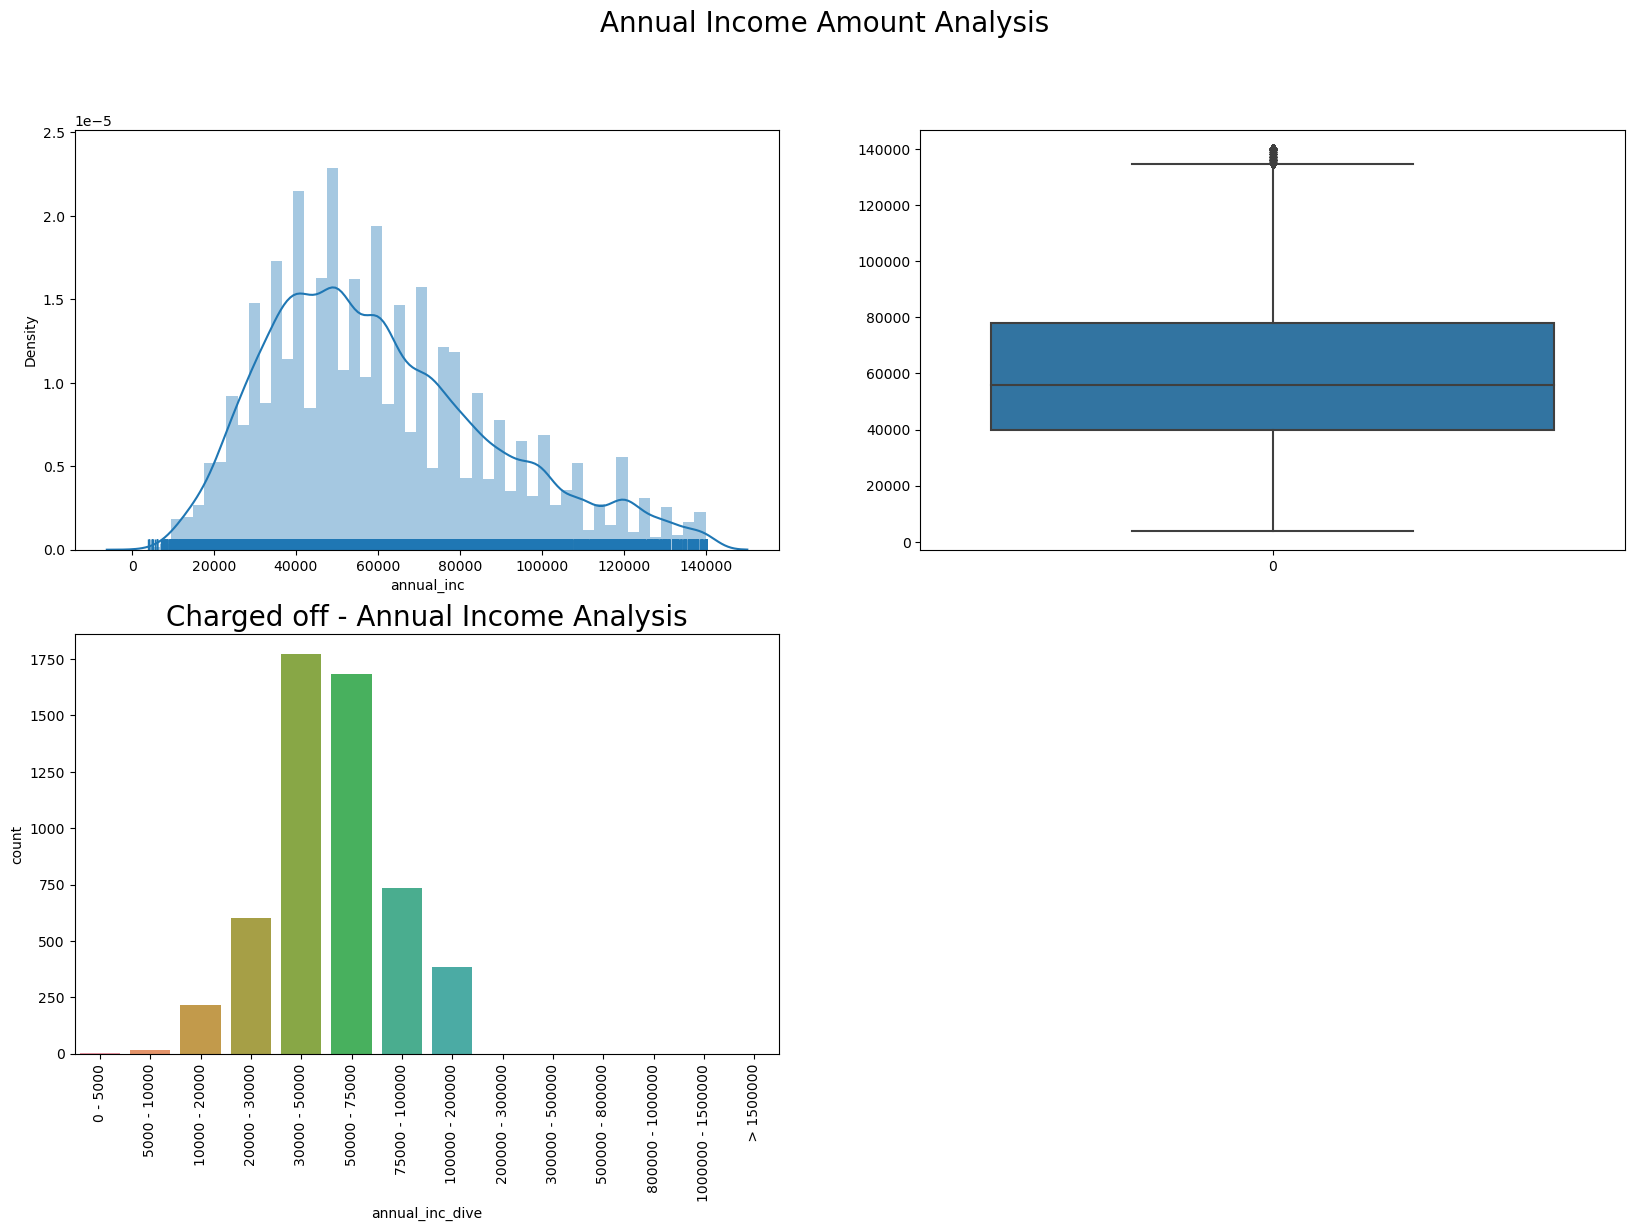

In [88]:
# Check for Annual Income
plt.figure(figsize=(20, 12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.annual_inc, rug=True)
plt.subplot(2,2,2)
#Box plot
sns.boxplot(data=ld.annual_inc)
plt.suptitle('Annual Income Amount Analysis', size=20)

# Charge Off Loans
plt.subplot(2,2,3)
sns.countplot(x='annual_inc_dive', data=Charged_off_df)
plt.xticks(rotation=90)
plt.title('Charged off - Annual Income Analysis', size=20)
plt.show()

#### Observation 
- Maximum loans have been availed by the applicants with annual income in range of 30k - 75k
- Charged Off Loans
    - Majority of defaulters have annual income ranging between 30k - 75k.

## Loan Status and Loan Term

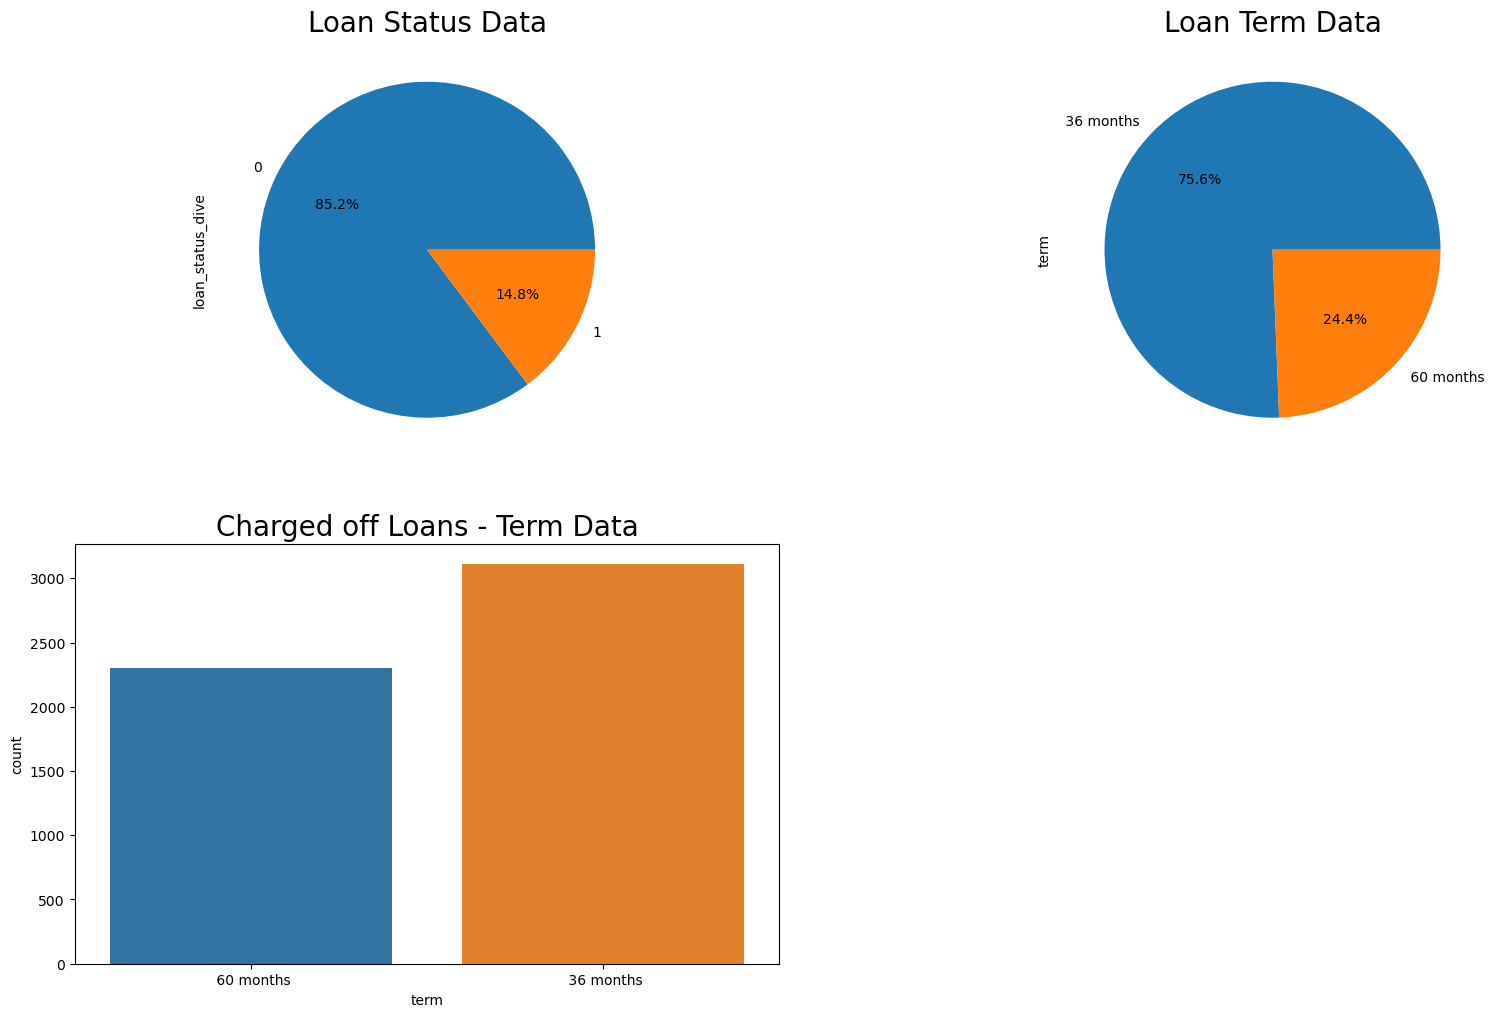

In [89]:
#loan status
#Percentage of loan status
plt.figure(figsize=(20,12))
#Setting subplot index
plt.subplot(2,2,1)
# Pie Plot
ld['loan_status_dive'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Loan Status Data', size=20)
plt.subplot(2,2,2)
#pie plot - Loan Term 
ld['term'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Loan Term Data', size=20)
# Charged-Off Loans vs. Term
plt.subplot(2,2,3)
sns.countplot(x = Charged_off_df['term'], data = Charged_off_df)
plt.title('Charged off Loans - Term Data', size=20)


plt.show()

#### Observation - 
- More than 85% of the loans have been Fully Paid (Settled) 
- More thank 75% of loans have been availed for 36 month term
- Fully Paid rate is higher in 36 months tenure.
- Charged Off Loans
    - Majority of Loan Defaulted (Charged Off) under 36 months Term.
    

#### Loan Applicant Public Records

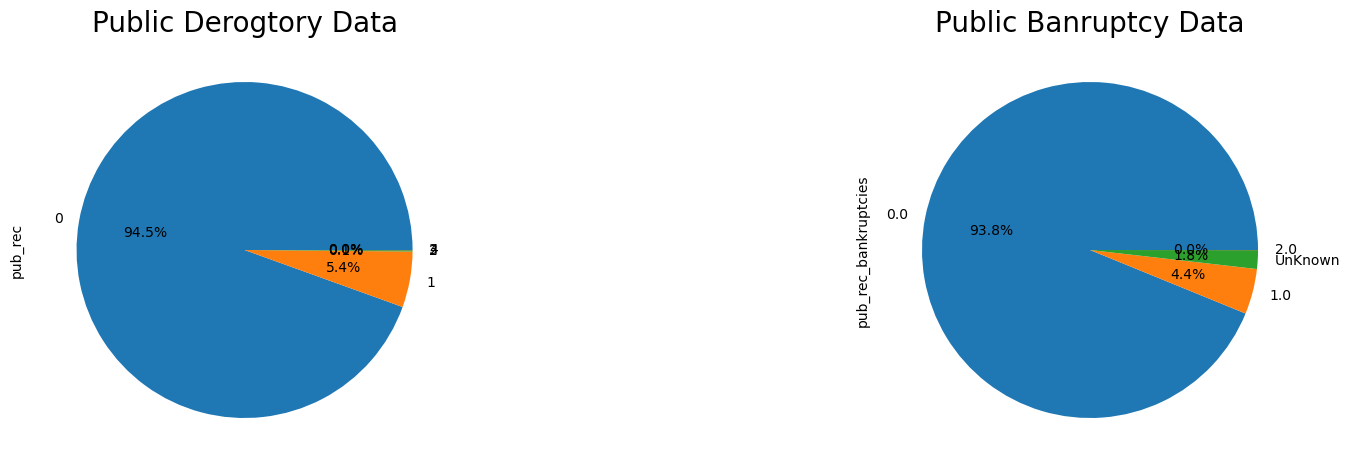

In [90]:
#loan status
#Percentage of loan status
plt.figure(figsize=(20,12))
#Setting subplot index
plt.subplot(2,2,1)
# Pie Plot
ld['pub_rec'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Public Derogtory Data', size=20)
plt.subplot(2,2,2)
#pie plot - Bankruptcy
ld['pub_rec_bankruptcies'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Public Banruptcy Data', size=20)

plt.show()

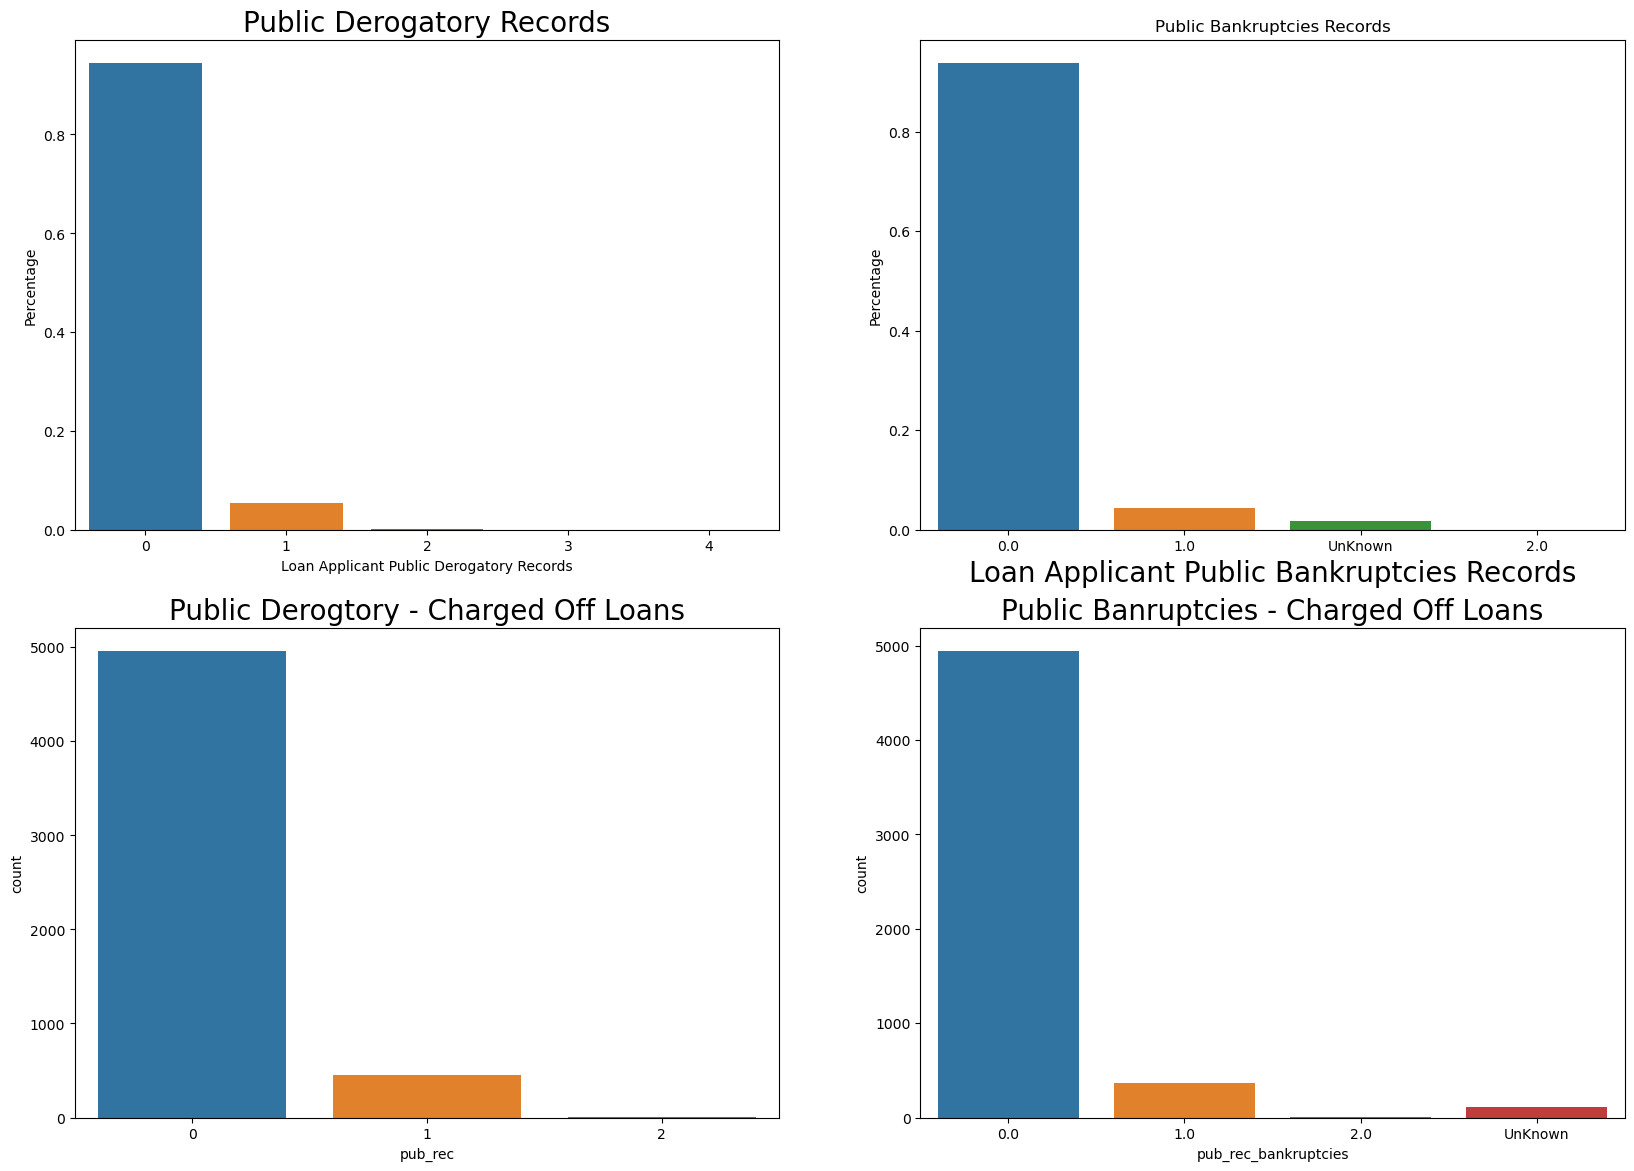

In [91]:
# pub_rec - Public Derogatory Records.
plt.figure(figsize=(20,14))
#Setting subplot index
plt.subplot(2,2,1)
#Percentage of each values
perc_pub_rec = ld['pub_rec'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='pub_rec', data=perc_pub_rec)
plt.xlabel('Loan Applicant Public Derogatory Records')
plt.ylabel('Percentage')
plt.title('Public Derogatory Records', size=20)
# pub_rec_bankruptcies - Public Bankruptcies Record.
plt.subplot(2,2,2)
#Percentage of each values
perc_bankrupt_rec = ld['pub_rec_bankruptcies'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='pub_rec_bankruptcies', data=perc_bankrupt_rec)
plt.xlabel('Loan Applicant Public Bankruptcies Records', size=20)
plt.ylabel('Percentage')
plt.title('Public Bankruptcies Records')
# Loans Defaulted for Applicants with Derogatory Records
plt.subplot(2,2,3)
sns.countplot(x = Charged_off_df['pub_rec'], data = Charged_off_df)
plt.title('Public Derogtory - Charged Off Loans', size=20)
# Loans Defaulted for Applicants with Bankruptcy Records
plt.subplot(2,2,4)
sns.countplot(x = Charged_off_df['pub_rec_bankruptcies'], data = Charged_off_df)
plt.title('Public Banruptcies - Charged Off Loans', size=20)

plt.show()

#### Observation :
- Less than 10% of applicants have Public Derogatory Records.
- More than 80% of the loan applicants do not have Public Bankruptcies Records.
- Charged Off Loans
    - Loan Applicants with 0 Public Derogatory have majority of defaulters
    - Loan Applicants with 0 Public Banruptcy have majority of defaulters

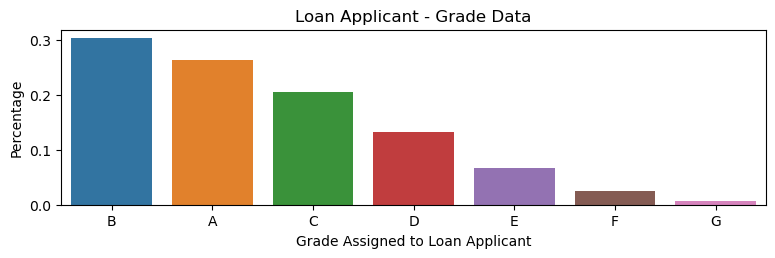

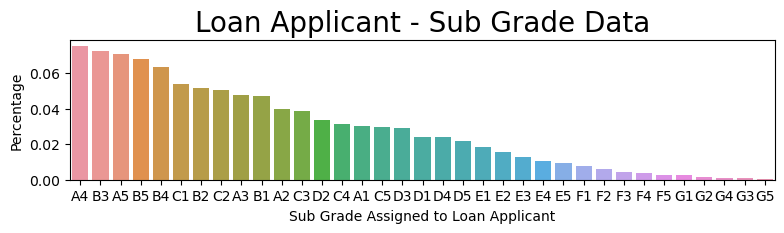

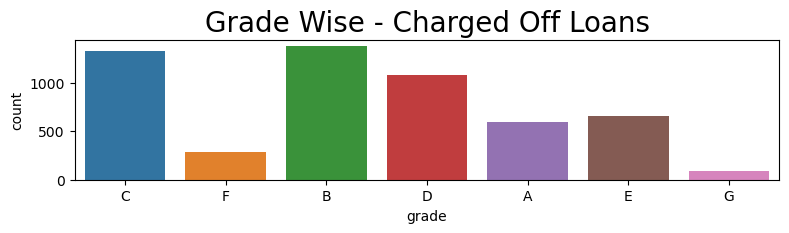

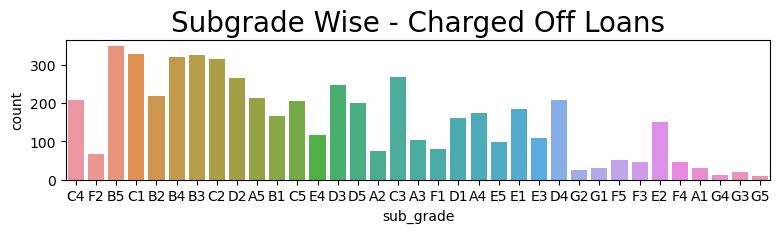

In [92]:
# Grade - Grade assigned to Loan Applicant
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
#Percentage of each values
perc_grade = ld['grade'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='grade', data=perc_grade)
plt.xlabel('Grade Assigned to Loan Applicant')
plt.ylabel('Percentage')
plt.title('Loan Applicant - Grade Data')
# sub_grade - Sub Grade Assigned to Loan Applicants
# Adding plot size as the initial plot looked too cluttered on x Axis
plt.figure(figsize=(20,4))
plt.subplot(2,2,2)
#Percentage of each values
perc_sub_grade = ld['sub_grade'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='sub_grade', data=perc_sub_grade)
plt.xlabel('Sub Grade Assigned to Loan Applicant')
plt.ylabel('Percentage')
plt.title('Loan Applicant - Sub Grade Data', size=20)

### Charged off Loans
plt.figure(figsize=(20,4))
plt.subplot(2,2,3)
sns.countplot(x = Charged_off_df['grade'], data = Charged_off_df)
plt.title('Grade Wise - Charged Off Loans', size=20)
plt.figure(figsize=(20,4))
plt.subplot(2,2,4)
sns.countplot(x = Charged_off_df['sub_grade'], data = Charged_off_df)
plt.title('Subgrade Wise - Charged Off Loans', size=20)
plt.show()

#### Observation : 
- More than 50% of the applicants are assigned Grade A or B.
- Sub-Grade Plot re-affirms the observation under Grade.
- Charged off Loans
    - Grade B and C have higher defaulters
    - Sub-Grade B5 and C1 have higher Defaulters

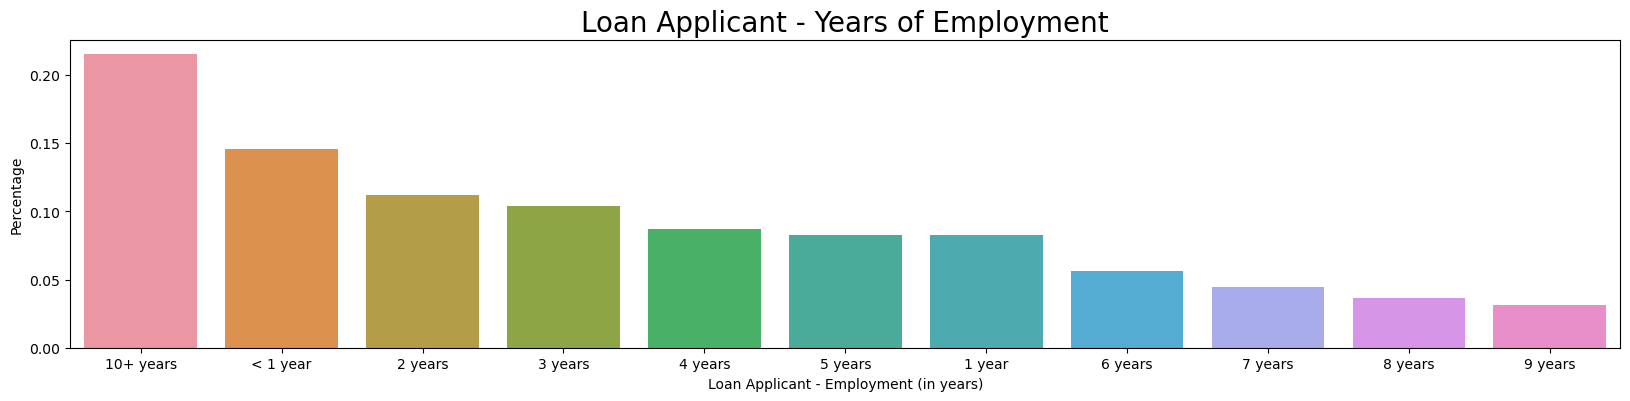

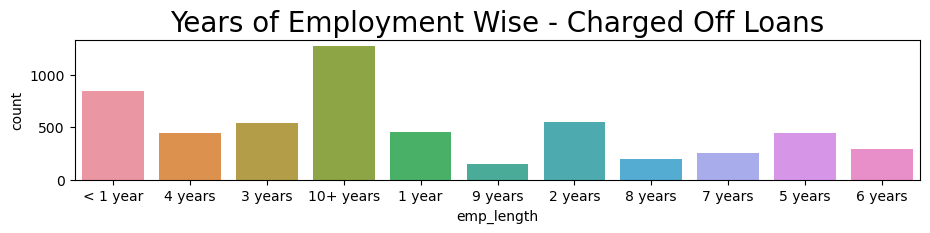

In [93]:
# emp_length
# Adding plot size as the initial plot looked too cluttered on x Axis
plt.figure(figsize=(20,4))
#Percentage of each values
perc_emp_length = ld['emp_length'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='emp_length', data=perc_emp_length)
plt.xlabel('Loan Applicant - Employment (in years)')
plt.ylabel('Percentage')
plt.title('Loan Applicant - Years of Employment', size=20)

# Charged Off Loans 
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x = Charged_off_df['emp_length'], data = Charged_off_df)
plt.title('Years of Employment Wise - Charged Off Loans', size=20)

plt.show()

# Observation 
- More than 20% of the applicants have more than 10 years of employment experience.
- Majority of loan defaulters are with 10+ years of experience.

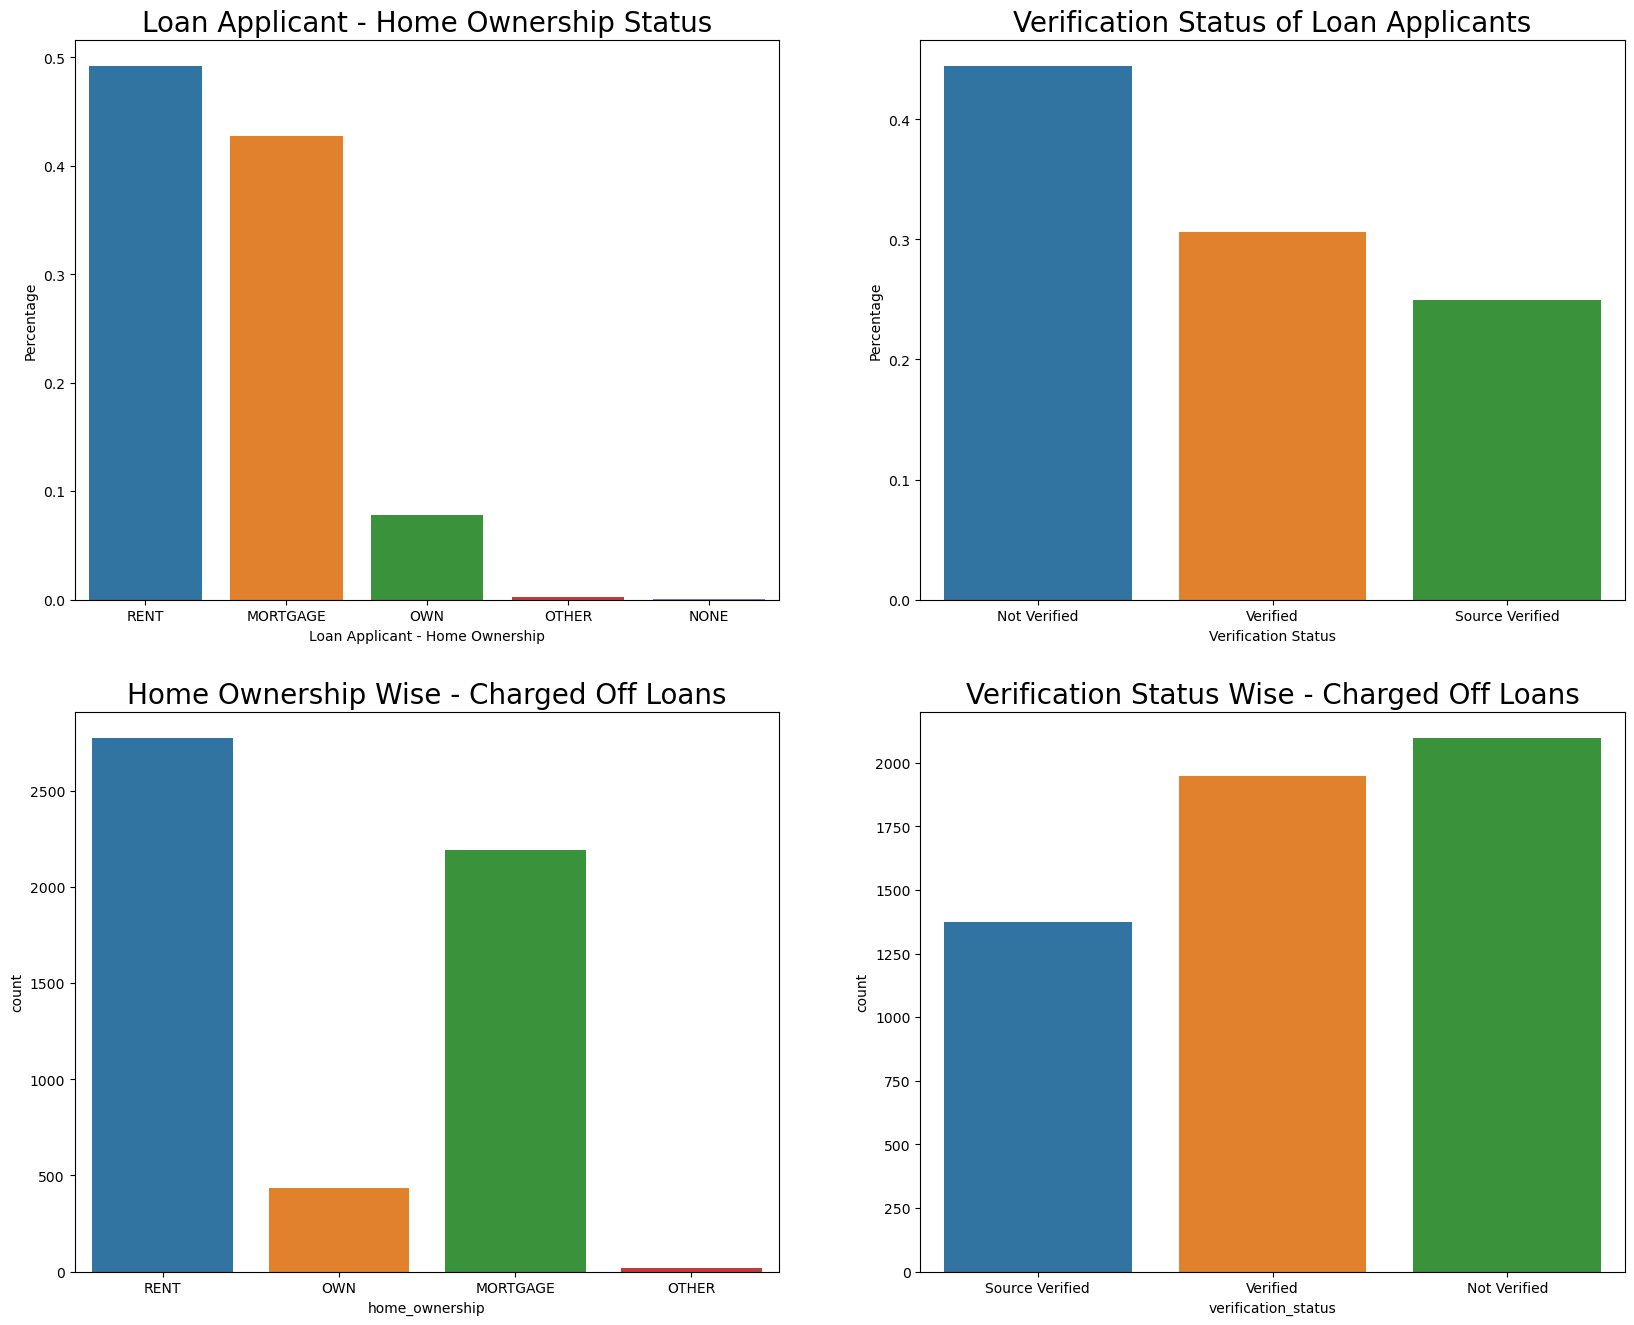

In [94]:
# home_ownership
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
#Percentage of each values
perc_home_ownership = ld['home_ownership'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='home_ownership', data=perc_home_ownership)
plt.xlabel('Loan Applicant - Home Ownership')
plt.ylabel('Percentage')
plt.title('Loan Applicant - Home Ownership Status', size=20)
#verification_status - Verification of the loan applicant.
plt.subplot(2,2,2)
#Percentage of each values
perc_verification_status = ld['verification_status'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='verification_status', data=perc_verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Percentage')
plt.title('Verification Status of Loan Applicants',size=20)

# Charged off Loans
plt.subplot(2,2,3)
sns.countplot(x = Charged_off_df['home_ownership'], data = Charged_off_df)
plt.title('Home Ownership Wise - Charged Off Loans', size=20)

plt.subplot(2,2,4)
sns.countplot(x = Charged_off_df['verification_status'], data = Charged_off_df)
plt.title('Verification Status Wise - Charged Off Loans', size=20)

plt.show()

#### Observation :
- Most of the loan applicants stay in Rental homes or have mortgage against their homes.
- More than 40% of the applicant where sanctioned loan without verification.
- Charged Off Loans
    - Applicants with Home Ownership of Rental and Mortgage are the highest defaulters
    - Appicants whose source of income was not verified are likely to default more.

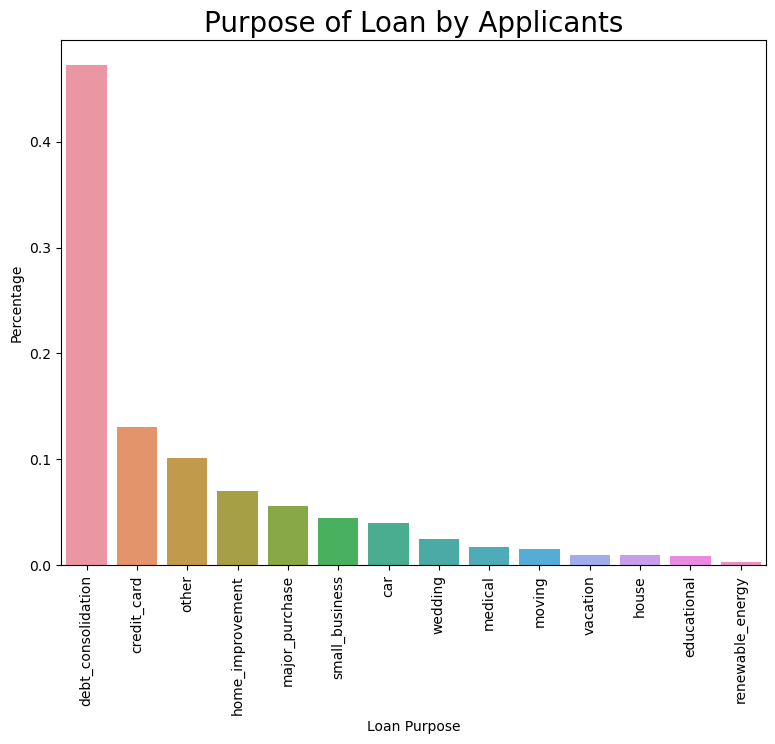

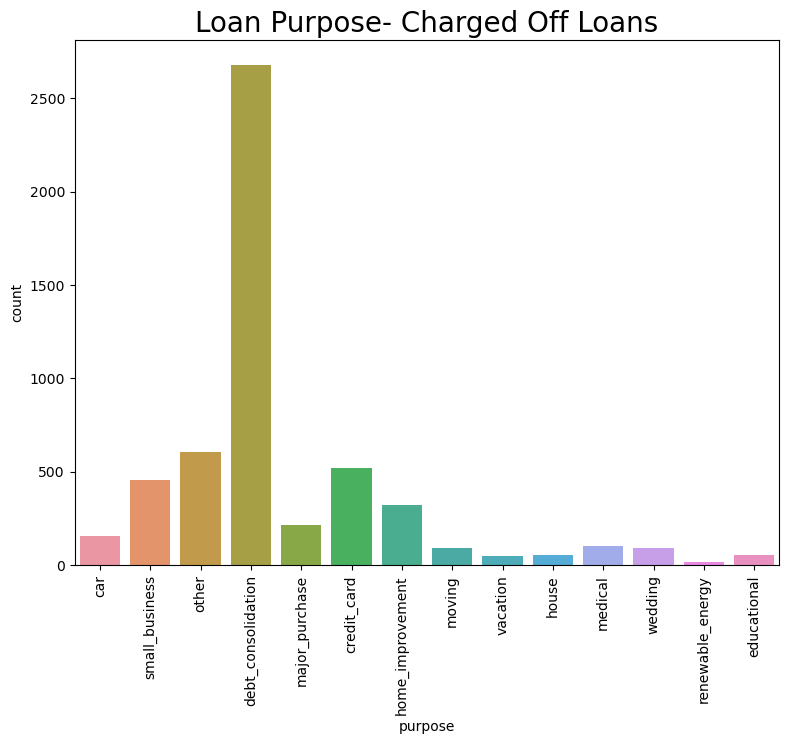

In [95]:
# purpose - Purpose of the loan availed by applicants
# Adding plot size as the initial plot looked too cluttered on x Axis
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
#Percentage of each values
perc_purpose = ld['purpose'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='purpose', data=perc_purpose)
plt.xticks(rotation=90)
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage')
plt.title('Purpose of Loan by Applicants', size=20)

### Charge Off Loans
plt.figure(figsize=(20,15))
plt.subplot(2,2,2)
sns.countplot(x = Charged_off_df['purpose'], data = Charged_off_df)
plt.xticks(rotation=90)
plt.title('Loan Purpose- Charged Off Loans', size=20)

plt.show()

#### Observation
- Majority of the loans availed are for Debt Consolidation
- Charge Off Loans
    - Similar to Loans Sanctioned, majority of the defaulters are the applicants who have availed loan with 'Debt Consolidation' as purpose.

#### Analysis on Date Columns

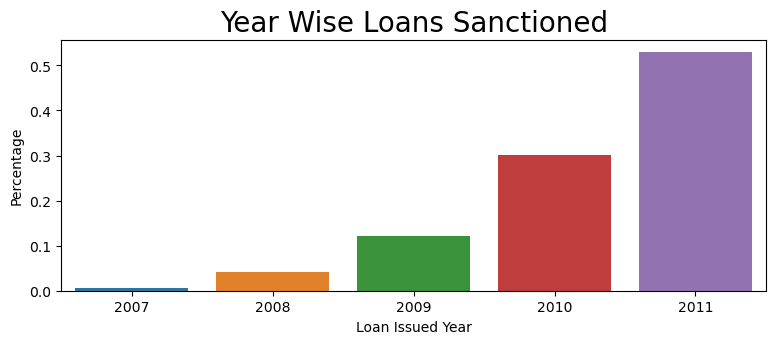

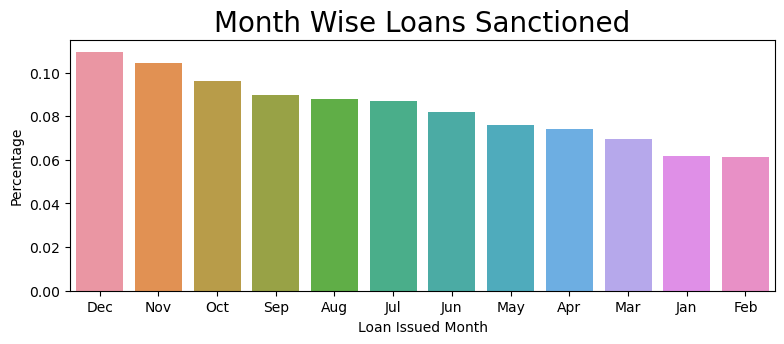

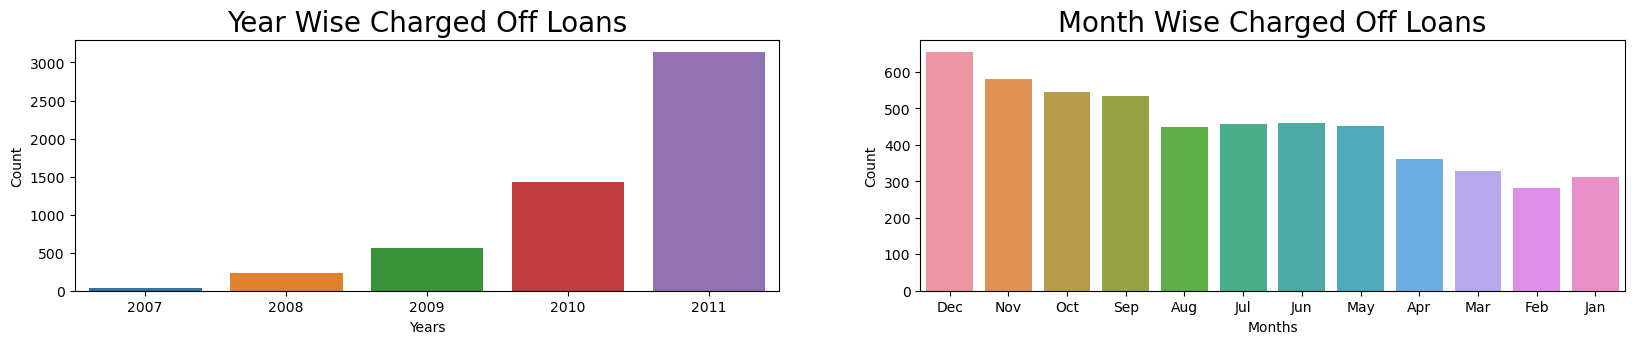

In [96]:
# Loan Issue Date
#Probability / Percentage of each values
perc_issue_d_yr = ld['issue_d_yr'].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.barplot(x='index', y='issue_d_yr', data=perc_issue_d_yr)
plt.xlabel('Loan Issued Year')
plt.ylabel('Percentage')
plt.title('Year Wise Loans Sanctioned',size=20)

#Probability / Percentage of each values
plt.figure(figsize=(20,15))
perc_issue_d_mth = ld['issue_d_mth'].value_counts(normalize=True).reset_index()
plt.subplot(4,2,2)
sns.barplot(x='index', y='issue_d_mth', data=perc_issue_d_mth)
plt.xlabel('Loan Issued Month')
plt.ylabel('Percentage')
plt.title('Month Wise Loans Sanctioned',size=20)

## Charged Off Loans
plt.figure(figsize=(20,15))
plt.subplot(4,2,3)
sns.countplot(x=Charged_off_df['issue_d_yr'], data=Charged_off_df[Charged_off_df['loan_status'] =='Charged Off'])
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Year Wise Charged Off Loans',size=20)
plt.subplot(4,2,4)
sns.countplot(x=Charged_off_df['issue_d_mth'], data=Charged_off_df[Charged_off_df['loan_status'] =='Charged Off'])
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Month Wise Charged Off Loans',size=20)
plt.show()

#### Observation:
- More than 50% of the loans were sanctioned in 2011 year
- YoY increase in number of loans sanctioned is increasing approx. 2x times.  
- Maximum number of loans were sanctioned during las few months of the year (Oct to Dec), while Months of Jul, Aug and Sep shows consistent number of loans sanctioned.
- Charged Off 
    - Loans are maximum for the year 2011 & for months Oct to Dec
    - Trend is similar as in case overall sanctioned loans.

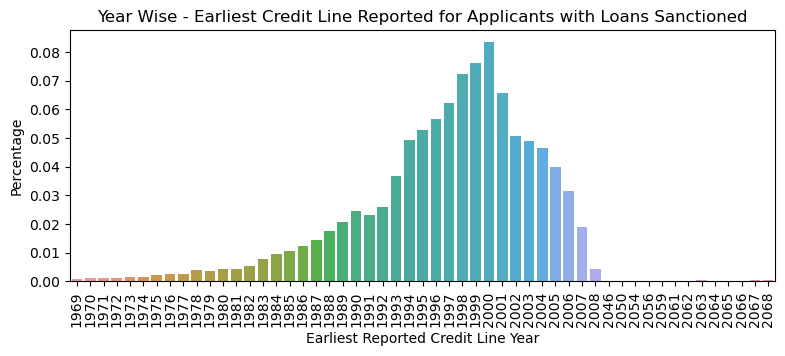

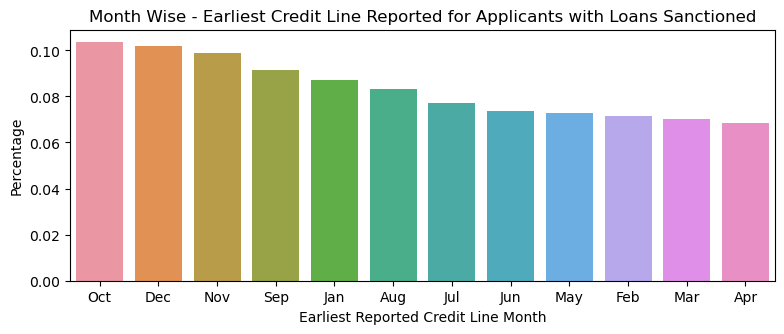

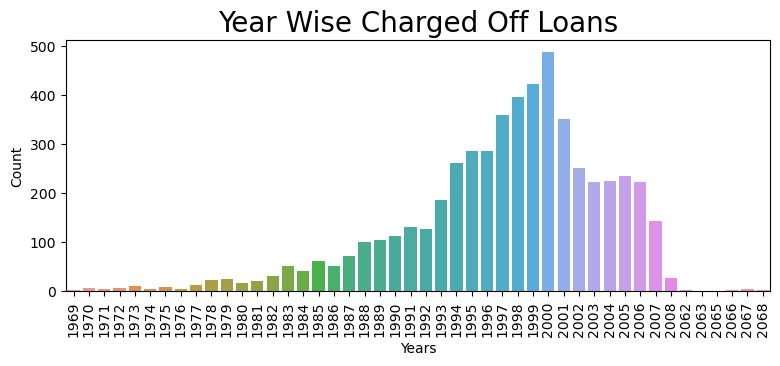

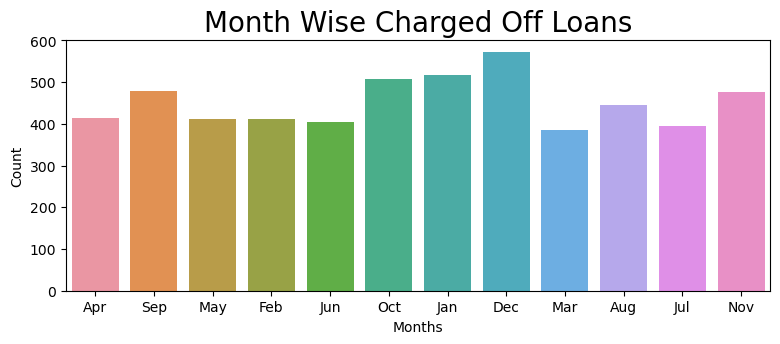

In [97]:
# Earliest Credit Line (earliest_cr_line) - The month the borrower's earliest reported credit line was opened
#Percentage of each values
perc_earliest_cr_line_yr = ld['earliest_cr_line_yr'].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.barplot(x='index', y='earliest_cr_line_yr', data=perc_earliest_cr_line_yr)
plt.xticks(rotation=90)
plt.xlabel('Earliest Reported Credit Line Year')
plt.ylabel('Percentage')
plt.title('Year Wise - Earliest Credit Line Reported for Applicants with Loans Sanctioned')

#Percentage of each values
plt.figure(figsize=(20,15))
perc_earliest_cr_line_mth = ld['earliest_cr_line_mth'].value_counts(normalize=True).reset_index()
plt.subplot(4,2,2)
sns.barplot(x='index', y='earliest_cr_line_mth', data=perc_earliest_cr_line_mth)
plt.xlabel('Earliest Reported Credit Line Month')
plt.ylabel('Percentage')
plt.title('Month Wise - Earliest Credit Line Reported for Applicants with Loans Sanctioned')

## Charged Off Loans
plt.figure(figsize=(20,15))
plt.subplot(4,2,3)
sns.countplot(x=Charged_off_df['earliest_cr_line_yr'], data=Charged_off_df)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Year Wise Charged Off Loans',size=20)
plt.figure(figsize=(20,15))
plt.subplot(4,2,4)
sns.countplot(x=Charged_off_df['earliest_cr_line_mth'], data=Charged_off_df)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Month Wise Charged Off Loans',size=20)

plt.show()

#### Observation -
- Maximum number of loan applicant got their earliest credit line during the year of 2000.
- Month Wise Data shows similar consistency as Loan Issue Month, most of the Loan applicants got their Earliest Credit Line from Oct to Nov.
- Charged Off Loans 
    - Yearly & Month Trend for Charged Off Loans trend is similar to the overall loans Sanctioned.

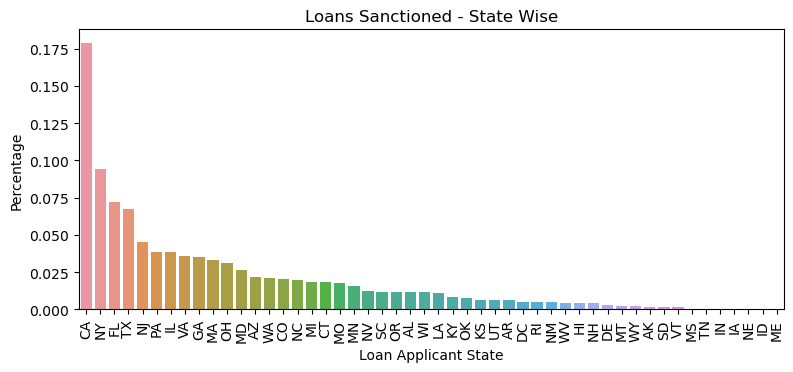

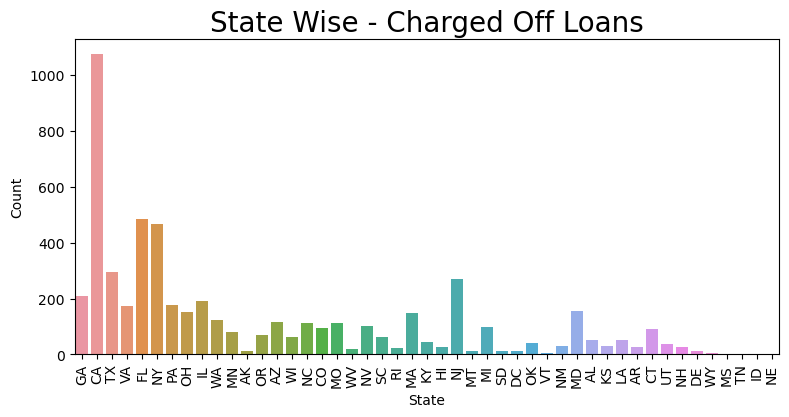

In [98]:
# Loan Applicants from State (address) 
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
# Percentage of each values
perc_addr_state = ld['addr_state'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='addr_state', data=perc_addr_state)
plt.xticks(rotation=90)
plt.xlabel('Loan Applicant State')
plt.ylabel('Percentage')
plt.title('Loans Sanctioned - State Wise')

## Charged off Loans
plt.figure(figsize=(20,9))
plt.subplot(2,2,1)
sns.countplot(x=Charged_off_df['addr_state'], data=Charged_off_df)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Wise - Charged Off Loans',size=20)
plt.show()

#### Observation :
- Majority of loans were sanctioned for applicants from California (CA) & New York (NY) states.
- Followed by Florida (FL) and Texas (TX)
- Charged Off Loans
    - Loans Sanctioned to California residents have majority of the defaulters.

## Univariate Analysis - Analysis Summary
#### The analysis of Sanctioned loans and the analysis of Charged Off Loans indicate that the applicant with following characteristics are likely to default the loan repayment.
- Applicants reside in rental homes
- Applicants who have mortagaged their homes
- Applicants Applying for loan with purpose of Debt Consolidation, i.e. applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 30k - 75k
- Applicants with employement length of 10
- When investor funding is between 5000-10000
- Loan Funded request is between 5k - 10k
- Dti is between 12-18
- When monthly installments works out between 145-274
- Applicants who avail shorter term of 36 months
- When the loan status is Not verified and Source of Income is not verified
- When the number of derogatory public records and bakruptcy records is 0
- Grade is 'B' or 'C', especially with sub-grades 'B5' and 'C1'
- Loan Applicant applying in last 3 months of the year.
- Loan Applicant residing in California State.

#### The year wise data indicated YoY proportionate increase in Loan Sanctioned and Loan Defaulters.


 

## Bivariate / Multi-Variate Analysis

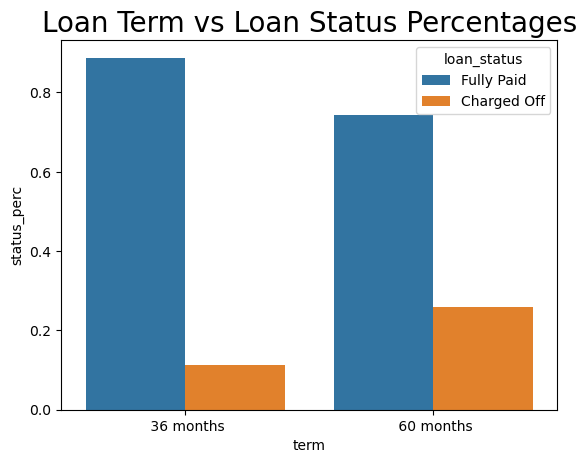

In [99]:
# Loan Term vs. Loan Status
df = ld.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['status_perc'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='status_perc', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Loan Term vs Loan Status Percentages', size=20)
plt.show()

#### Observaton :
- In Univariate Analysis we identified that people with 36 months term had highest number (in terms of count) of defaulters but now with the above analysis we notice that when compared with percentage of loans the people with 60 months have higher % of defaulters.

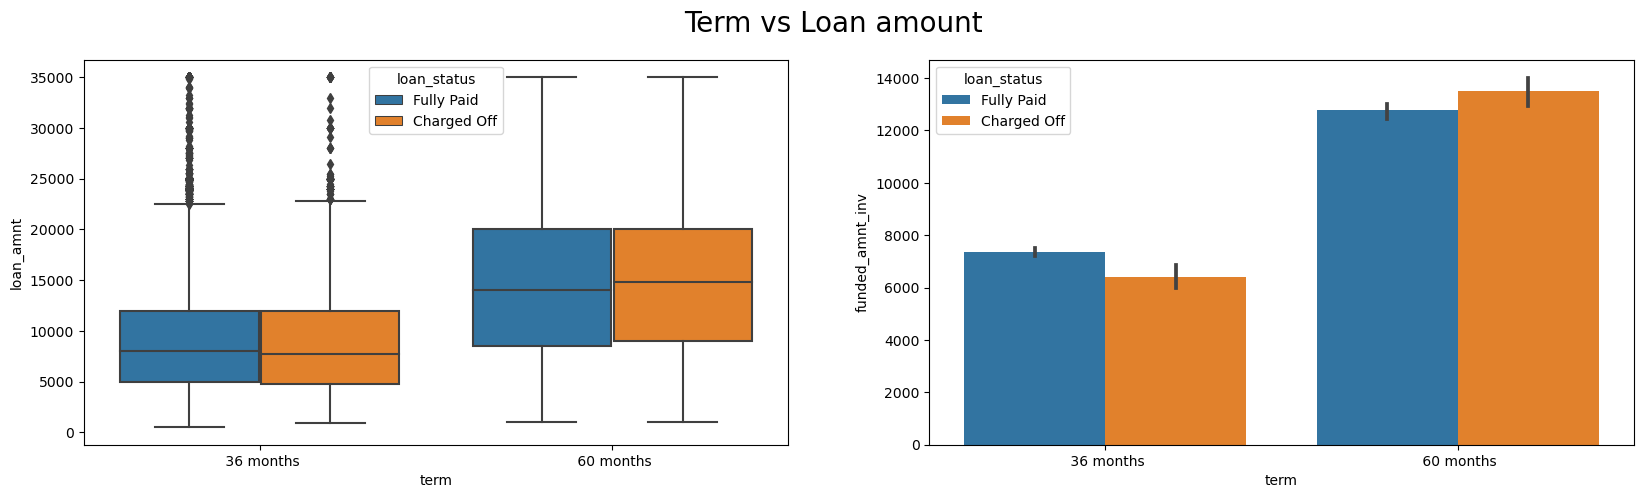

In [100]:
# Funded Amount by Inverstors and Loan Term
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=ld)
plt.subplot(1,2,2)
sns.barplot(x='term', y='funded_amnt_inv', hue='loan_status', data=ld, estimator=np.median)
plt.suptitle('Term vs Loan amount', size=20)
plt.show()

#### Observation :
- Amount Funded by the Investor is not a factor for default for both terms (36 and 60 months)
- For Median, 
    - We notice that Loan Defaulters are higher in case of 60 months terms. This is consistent with our earlier observation.
        - The Funded Amount is also higher for these applicants
    - Also, the Fully Paid loans are higher for 36 months term.

#### Lets check whether Interest Rates are impacting the Loan Defaulters

In [101]:
ld.int_rate_dive2.dtypes

CategoricalDtype(categories=['5%-9%', '9%-13%', '13%-17%', '17%-21%', '21%-24%'], ordered=True)

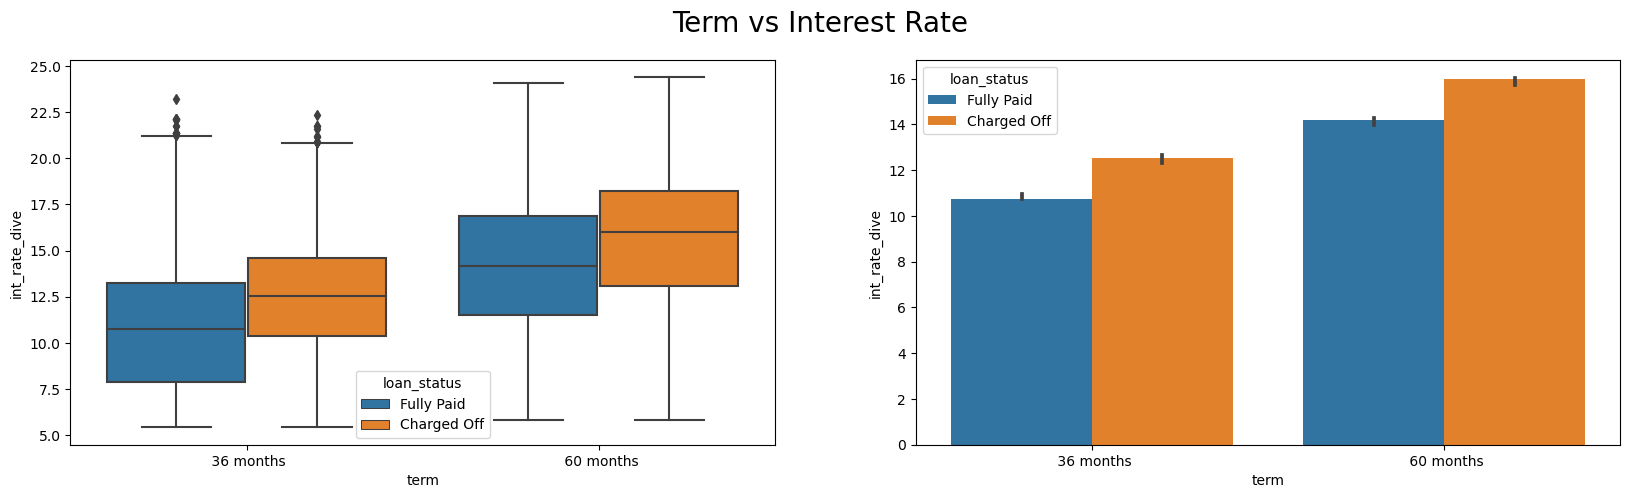

In [102]:
# Term vs. Interest Rate
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='term', y='int_rate_dive', hue='loan_status', data=ld)
plt.subplot(1,2,2)
sns.barplot(x='term', y='int_rate_dive', hue='loan_status', data=ld, estimator=np.median)
plt.suptitle('Term vs Interest Rate', size=20)
plt.show()

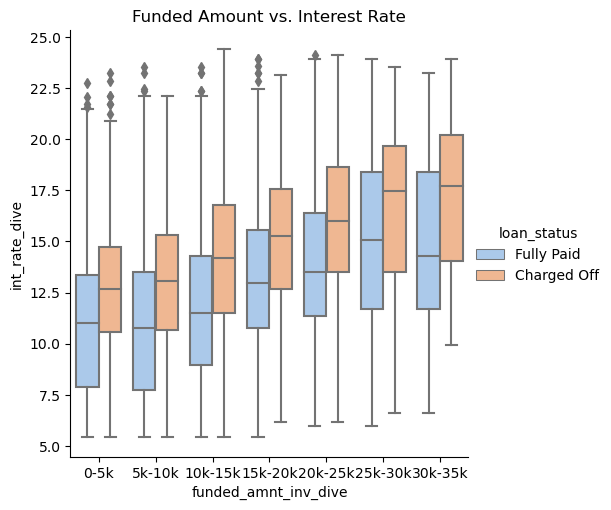

In [103]:
# Lets Check Funded Amount vs Interest Rate
sns.catplot(data =ld, y ='int_rate_dive', x ='funded_amnt_inv_dive', hue ='loan_status',palette="pastel",kind = 'box')
plt.title('Funded Amount vs. Interest Rate')
plt.show()

#### Observation - 
- Term vs. Interest Rate : Loan with higher interest rate have higher number of defaulters, irrespective of term.
- Funded Amount vs. Interest Rate : All Charged Off Loans have higher interest rates when compared to the Fully Paid Loans in same group.
    - Seems the loans funded for the similar amounts have different interest rates. This can be a factor for higher defaulter/s.

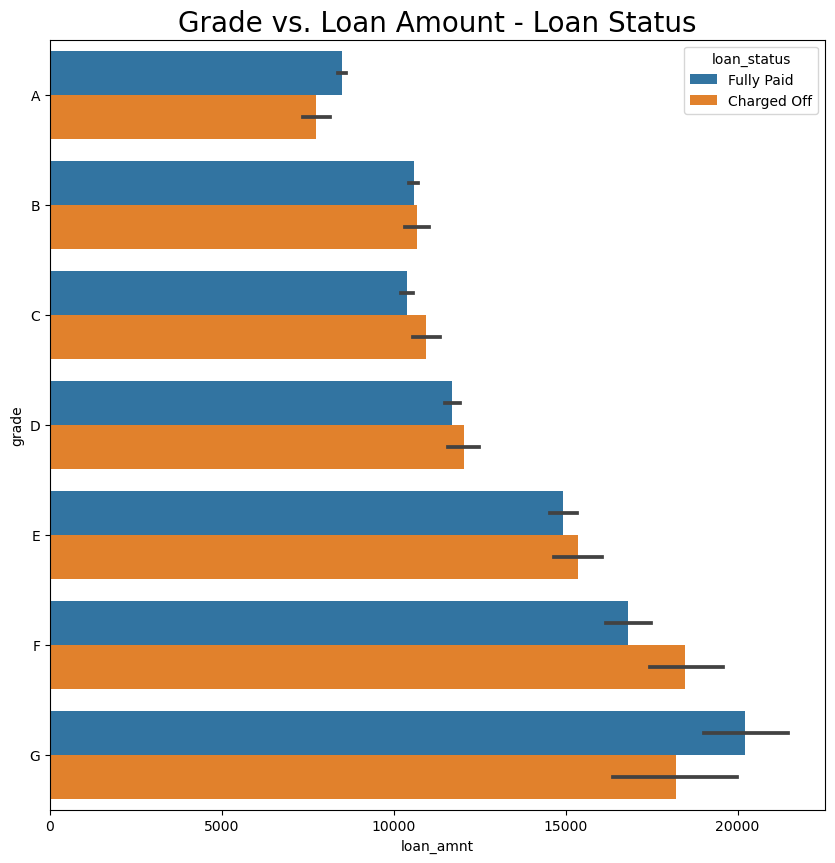

In [104]:
# Loan Amount, Grade and Status
plt.figure(figsize=(10,10))
sns.barplot(data =ld,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.title('Grade vs. Loan Amount - Loan Status', size=20)
plt.show()

#### Observation :
- The Charged Off (defaulter) steadily rise in numbers as the grade move from A (Higher) to G (Lower)

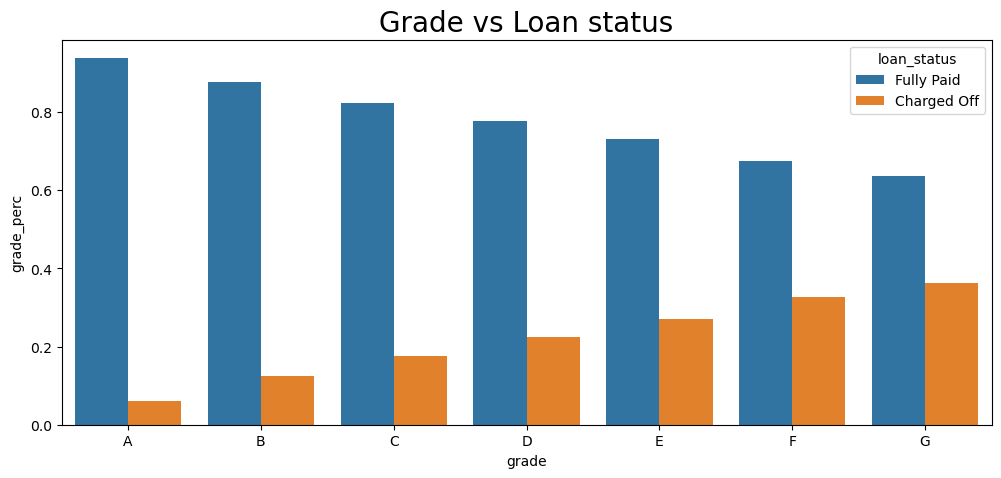

In [105]:
# Lets validate the above based on the percentage of loans sanctioned for each the grades
df = ld.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['grade_perc'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='grade_perc', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status', size=20)
plt.show()

#### Observation :
- The Defaulted (Charged Off) loans steadily increase (in terms of percentage) as we move from Grade A (Higher) to G (Lower).
- Indicating that lower Graded Applicants carry larger risk of loan default.

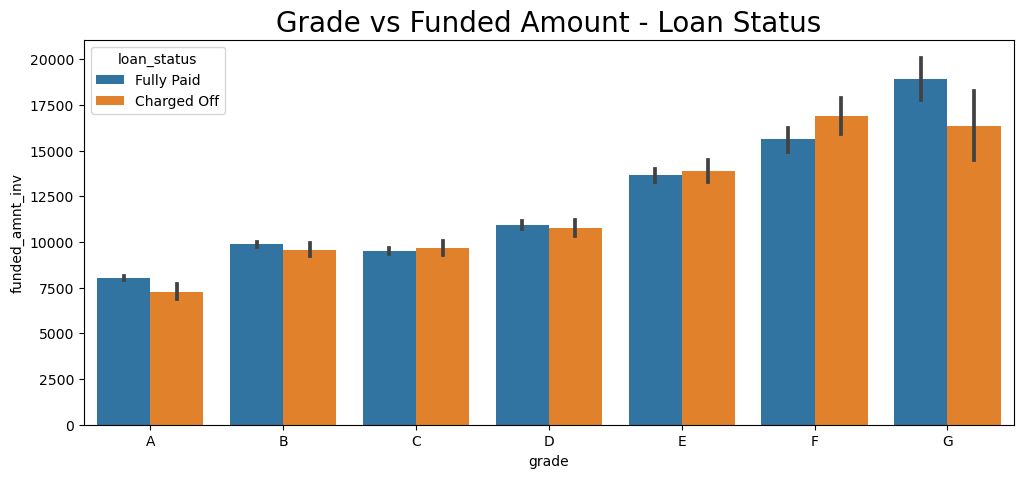

In [106]:
# Loan Amount, Grade and Status
# Lets validate the above based on the percentage of loans sanctioned for each the grades
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='funded_amnt_inv', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'], order=['A','B','C','D','E','F','G'])
plt.title('Grade vs Funded Amount - Loan Status', size=20)
plt.show()

#### Observation :
- The difference between Charged Off and Fully Paid is seen as proportionate for Grades A to E.
- Grades 'F' and 'G' depict larger gap between charged-off and fully paid.
- Interesting to notice that the lower grade applicants have been sanctioned higher amount of loans, hence notice that Grade Assigned are not being considered diligently during the loan sanction process.

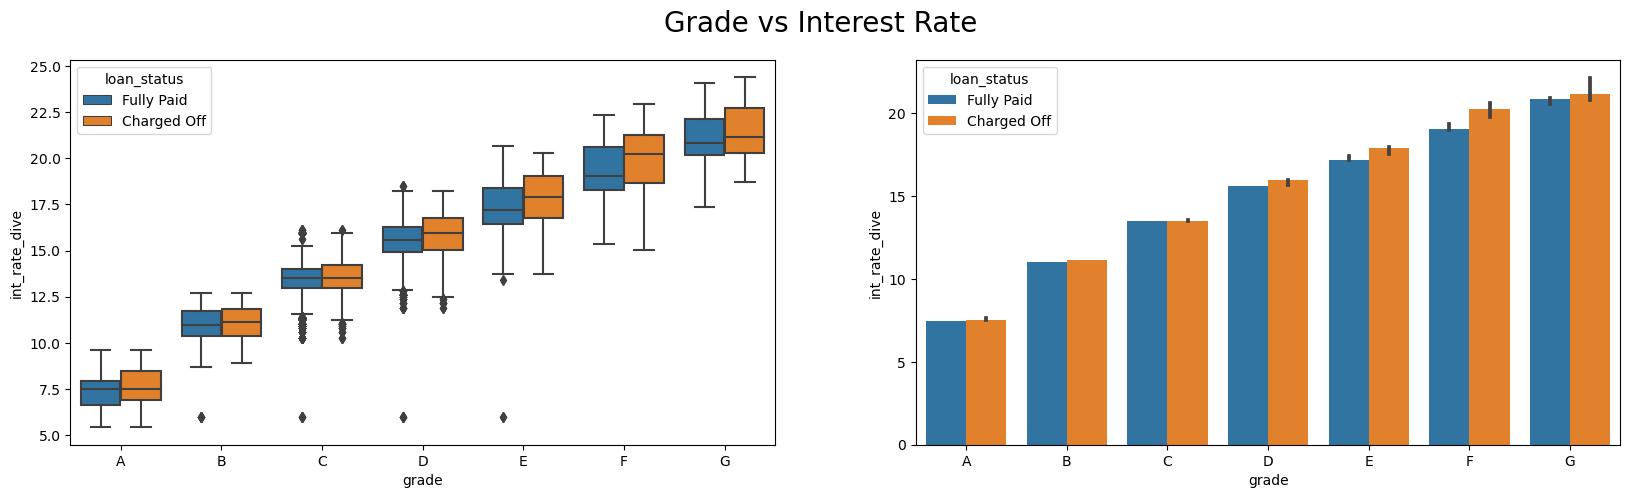

In [107]:
# Lets Check what the interest rates for these higher funded amounts for lower grades
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='grade', y='int_rate_dive', hue='loan_status', data=ld, order =['A','B','C','D','E','F','G'] )
plt.subplot(1,2,2)
sns.barplot(x='grade', y='int_rate_dive', hue='loan_status', data=ld, order = ['A','B','C','D','E','F','G'], estimator=np.median)
plt.suptitle('Grade vs Interest Rate', size=20)
plt.show()

#### Observation :
- Interest Rate increases as we move from A (Higher) to G (Lower) grades.
    - This seems to be consistent as the applicants with lower grades carry high risk of being loan defaulters.
#### Summary of Observation for Grades
- Seems Grades are being considered for interest rate to be charged, but the same logic is not being applied when it comes to funding of the loan amount.

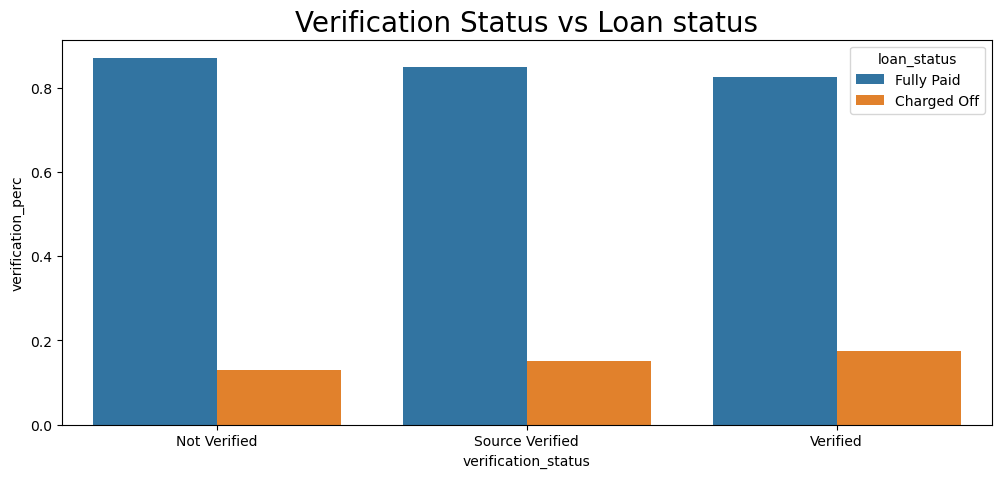

In [108]:
# Lets check Verification Status 
df = ld.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['verification_perc'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='verification_perc', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Verification Status vs Loan status', size=20)
plt.show()

#### Observation :
- The percentage of Charged Off (Defaulted) loans are consistent irrespective of the Verification Status.

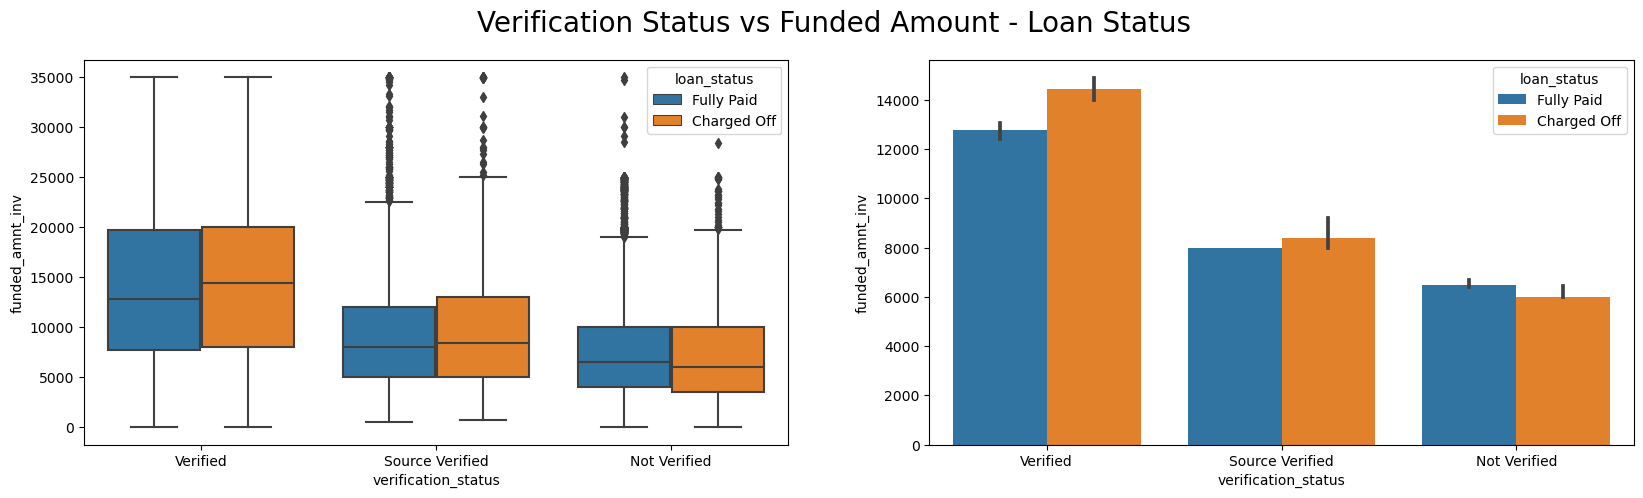

In [109]:
# Lets Check Verification Status and Funded Amount 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='verification_status', y='funded_amnt_inv', hue='loan_status', data=ld)
plt.subplot(1,2,2)
sns.barplot(x='verification_status', y='funded_amnt_inv', hue='loan_status', data=ld, estimator=np.median)
plt.suptitle('Verification Status vs Funded Amount - Loan Status', size=20)
plt.show()

#### Observation :
- Higher Loan Amounts are given to Verified and Source Verified Applicants
- The difference between fully paid and defaulted (Charged Off) loans are significantly higher for Verified and Source Verified, when compared to Not Verified applicants.

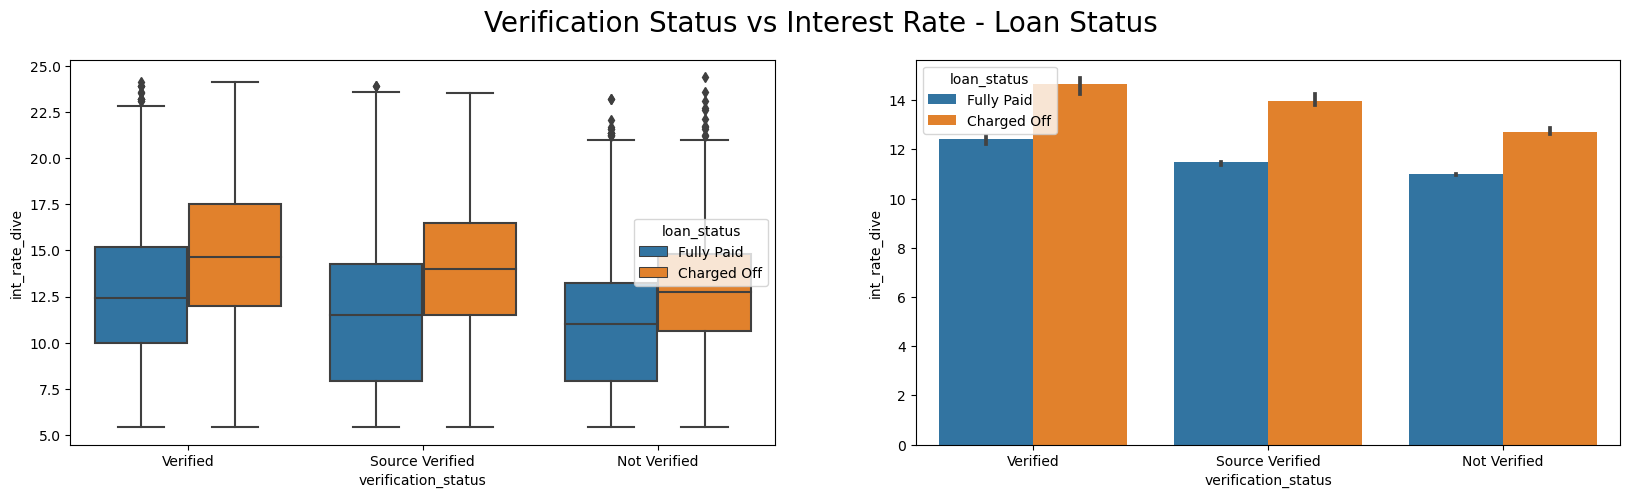

In [110]:
# Lets Check What the interest rates applied based on Verification Status for sanctioned loans
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='verification_status', y='int_rate_dive', hue='loan_status', data=ld)
plt.subplot(1,2,2)
sns.barplot(x='verification_status', y='int_rate_dive', hue='loan_status', data=ld, estimator=np.median)
plt.suptitle('Verification Status vs Interest Rate - Loan Status', size=20)
plt.show()

#### Observation :
- Defaulted (Charged Off) Loans have higher Interest Rates when compared to the Full Paid Loans.
- This is consistent, irrespective of the Verification status.

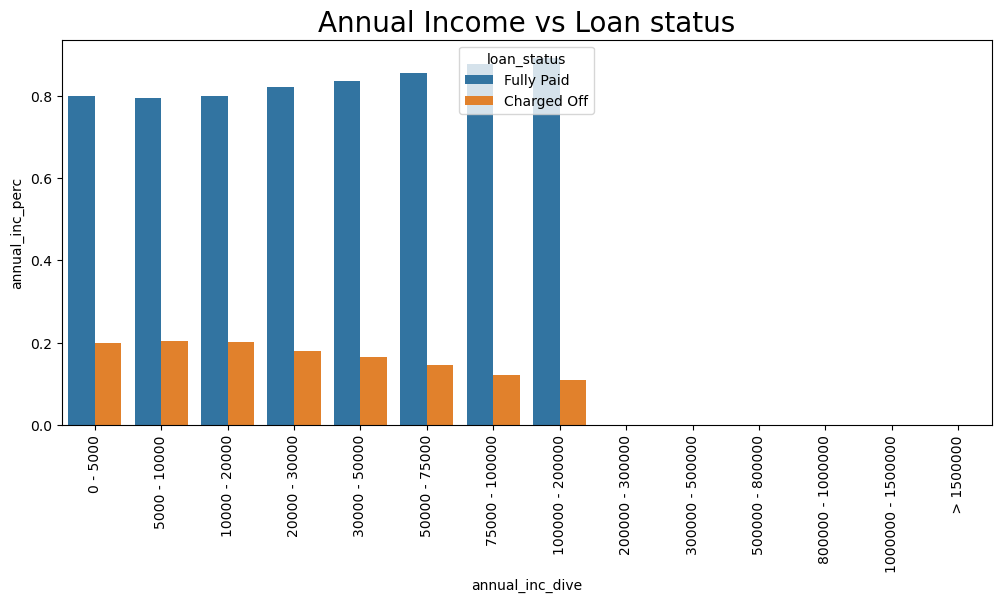

In [111]:
# Lets check whether How Annual Income is considered for Funding the Loans and Interest Rates
df = ld.groupby(['annual_inc_dive', 'loan_status'], as_index=False)['id'].count()
df['annual_inc_perc'] = df.groupby('annual_inc_dive').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='annual_inc_dive', y='annual_inc_perc', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.xticks(rotation=90)
plt.title('Annual Income vs Loan status', size=20)
plt.show()

#### Observation :
- Percentage of Defaulters (Charged Off) shows a decreasing trend as the Annual Income Group Range increases.
- Percentage of Defaulters (Charged Off) higher in lower income gtoup.

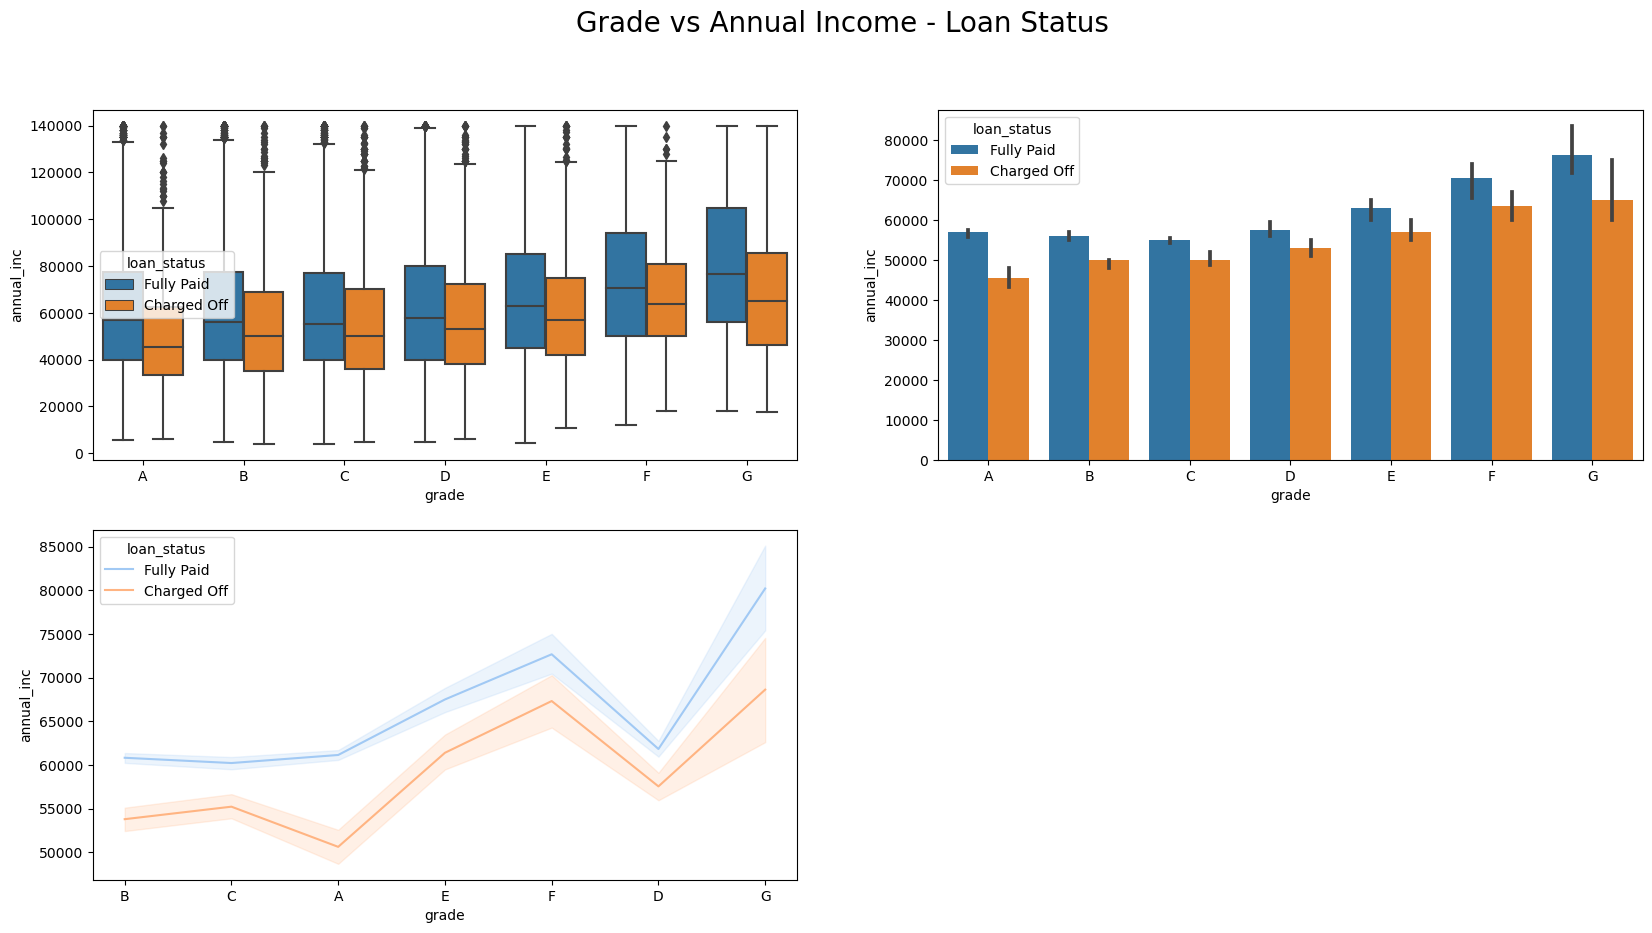

In [112]:
# Lets Check whether Grades and Annual Income show any relationship.
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x='grade', y='annual_inc', hue='loan_status', data=ld, order = ['A','B','C','D','E','F','G'])
plt.subplot(2,2,2)
sns.barplot(x='grade', y='annual_inc', hue='loan_status', order = ['A','B','C','D','E','F','G'], data=ld, estimator=np.median)
plt.subplot(2,2,3)
sns.lineplot(data =ld,y='annual_inc', x='grade', hue ='loan_status', palette="pastel")
plt.suptitle('Grade vs Annual Income - Loan Status', size=20)
plt.show()

#### Observation :
- Higher Income applicants in Grade F and G have received higher Funded Amounts and also have defaulted (Charged Off) higher than rest of the loan applicants.
- there are signicant number of higher income applicants in lower grades.

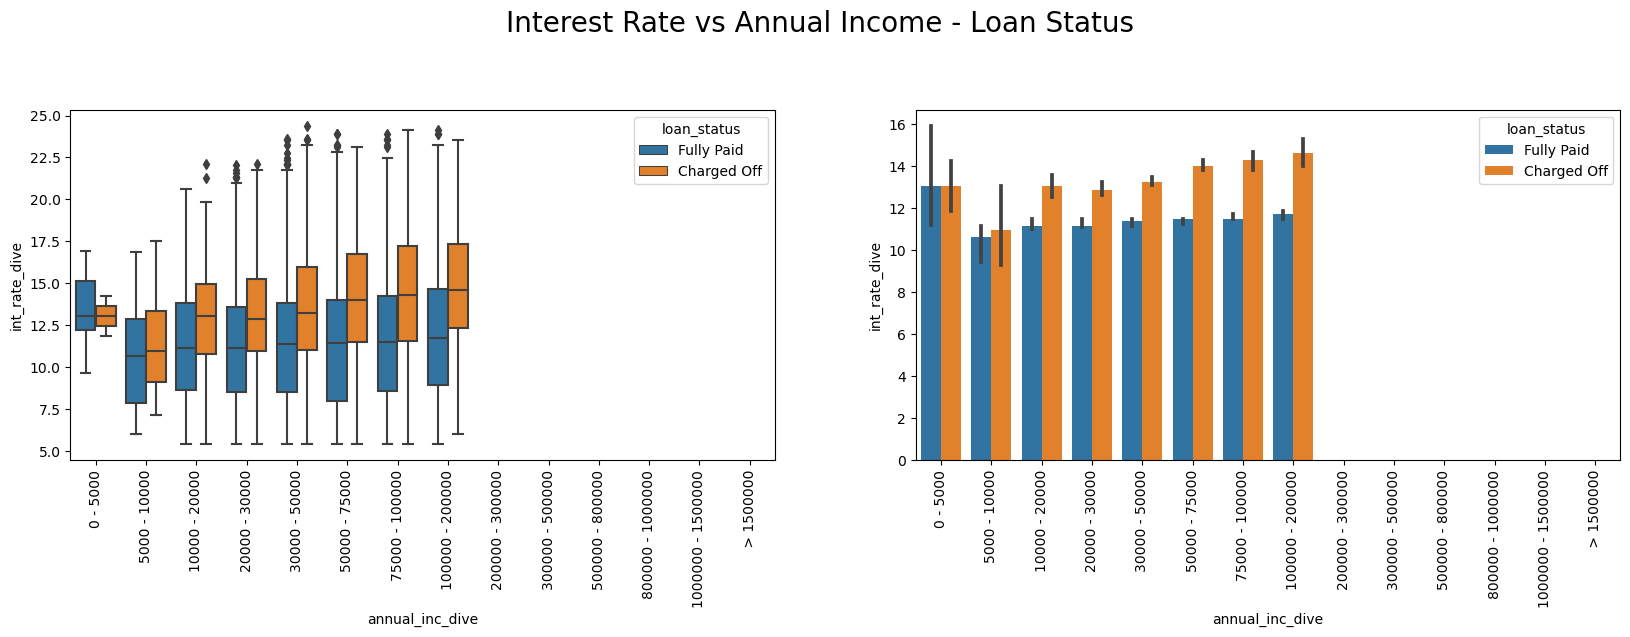

In [113]:
# Let check whether Annual Income has any impact on the Interest Rates charged.
plt.figure(figsize=(20,10))
plt.suptitle('Interest Rate vs Annual Income - Loan Status', size=20)
plt.subplot(2,2,1)
sns.boxplot(x='annual_inc_dive', y='int_rate_dive', hue='loan_status', data=ld)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.barplot(x='annual_inc_dive', y='int_rate_dive', hue='loan_status', data=ld, estimator=np.median)
plt.xticks(rotation=90)
plt.suptitle('Interest Rate vs Annual Income - Loan Status', size=20)
plt.show()

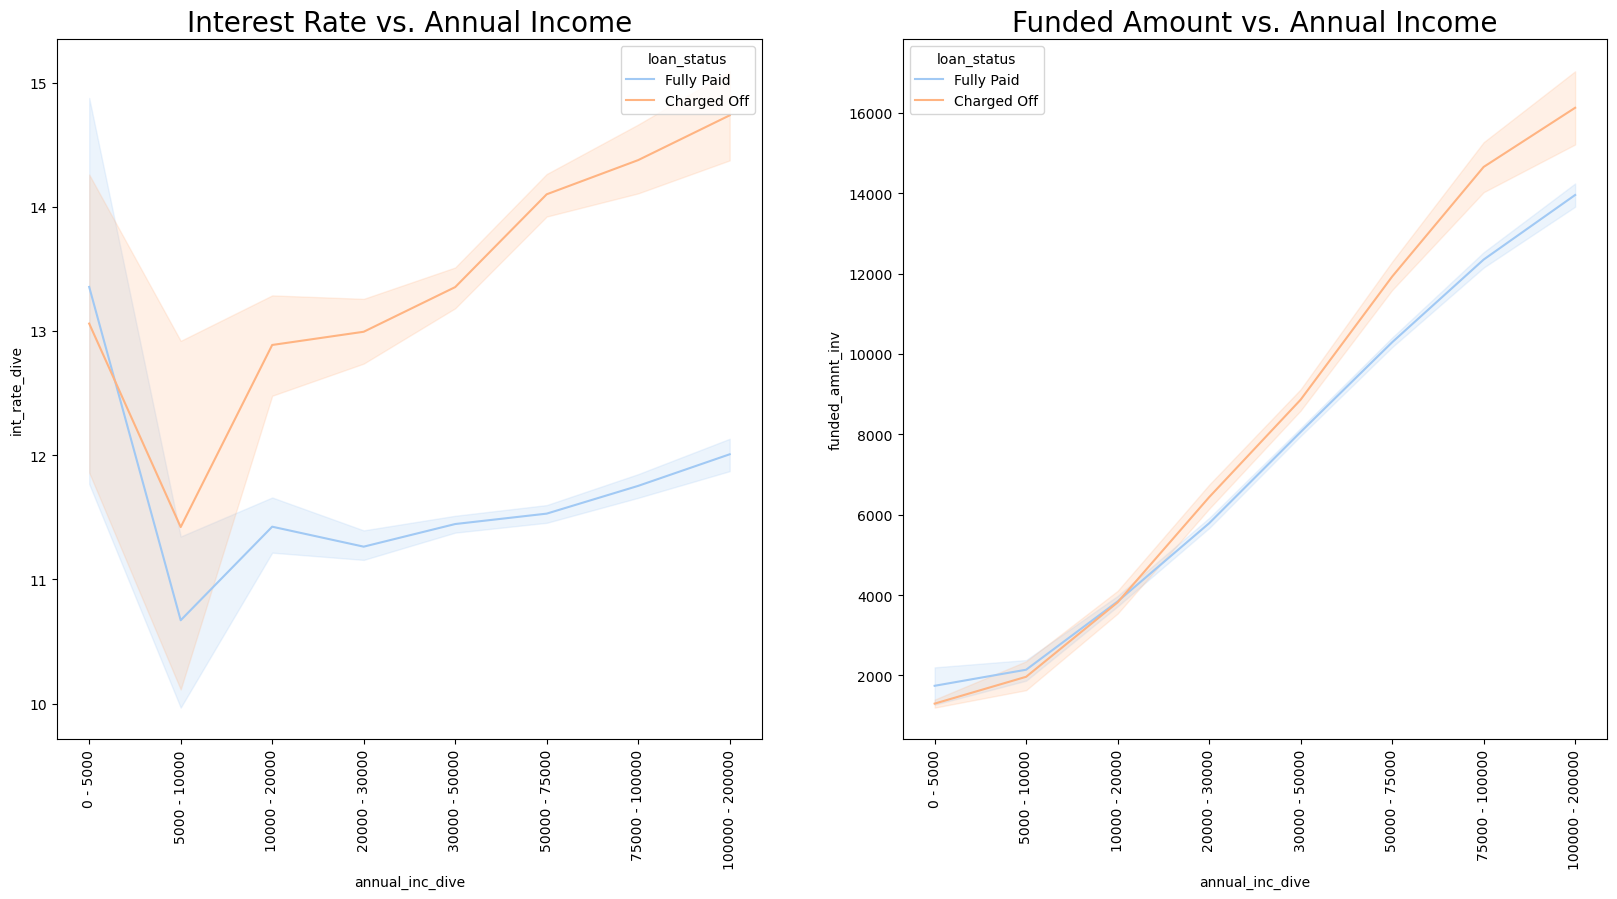

In [114]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.lineplot(data =ld,y='int_rate_dive', x='annual_inc_dive', hue ='loan_status',palette="pastel")
plt.xticks(rotation=90)
plt.title('Interest Rate vs. Annual Income', size=20)
plt.subplot(2,2,2)
sns.lineplot(data =ld,y='funded_amnt_inv', x='annual_inc_dive', hue ='loan_status',palette="pastel")
plt.xticks(rotation=90)
plt.title('Funded Amount vs. Annual Income', size=20)
plt.show()

#### Observation :
- Interest Rate is higher for the lowest Income group < 5000, for both Full Paid and Charged Off Loans
- Interest Rate is consistently lower for rest of income groups.
- Interest Rate for Charged off loans is higher across all income groups, with an exception of 5k - 10k income group range.
- Funded Loan Amount increase proportionally to the Annual Income. Indicating the higher the Annual Income, higher will be the Funded Loan Amount.
    - Also, indicates that with increase in both annual income and funded loan amount, there is increase in number of defaulted (Charged Off) loans.

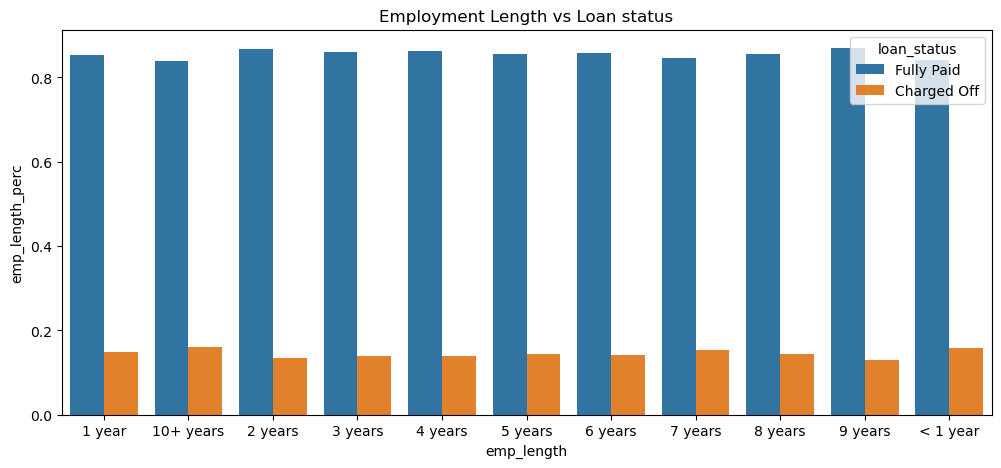

In [115]:
# Lets Check for Employment Length (as indicated in Univariate, lets verify whether applicants with 10+ years of experience likely to default more)
df = ld.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['emp_length_perc'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='emp_length_perc', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Employment Length vs Loan status')
plt.show()

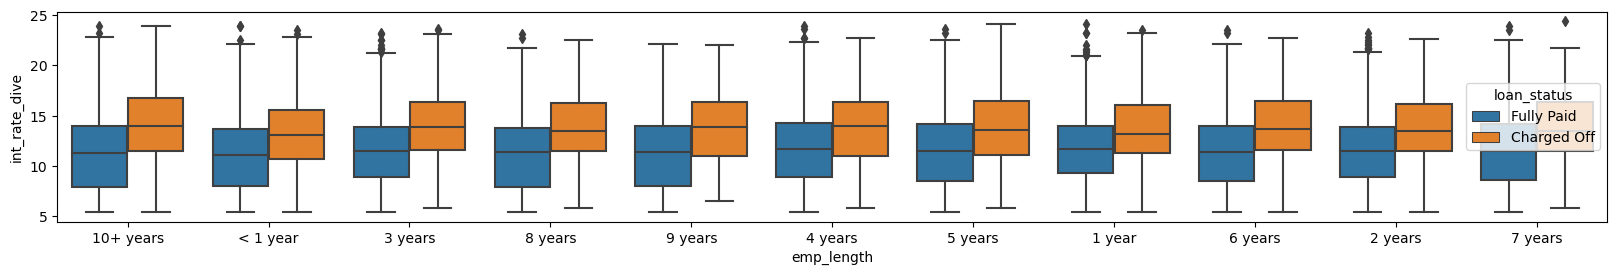

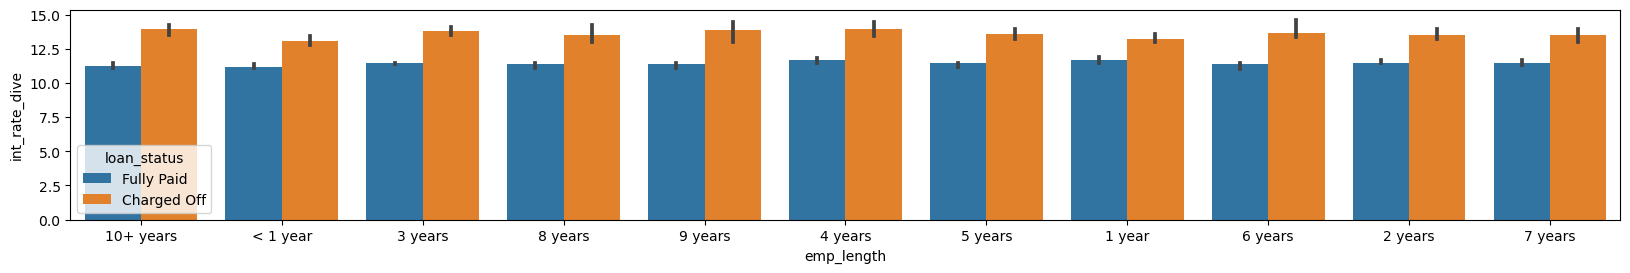

In [116]:
# Employment Length vs. Interest Rate
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
sns.boxplot(x='emp_length', y='int_rate_dive', hue='loan_status', data=ld)
plt.figure(figsize=(20,6))
plt.subplot(2,1,2)
sns.barplot(x='emp_length', y='int_rate_dive', hue='loan_status', data=ld, estimator=np.median)

plt.show()

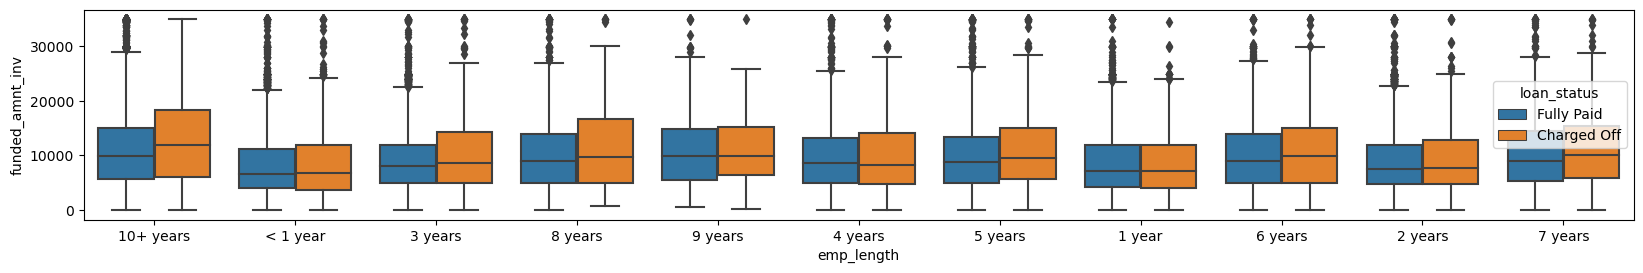

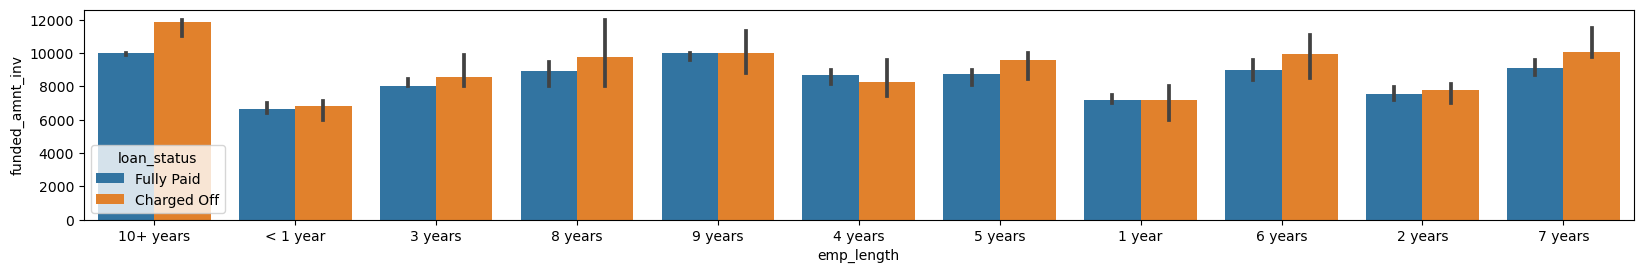

In [117]:
# Employment Length vs. Funded Loan Amount
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
sns.boxplot(x='emp_length', y='funded_amnt_inv', hue='loan_status', data=ld)
plt.figure(figsize=(20,6))
plt.subplot(2,1,2)
sns.barplot(x='emp_length', y='funded_amnt_inv', hue='loan_status', data=ld, estimator=np.median)

plt.show()

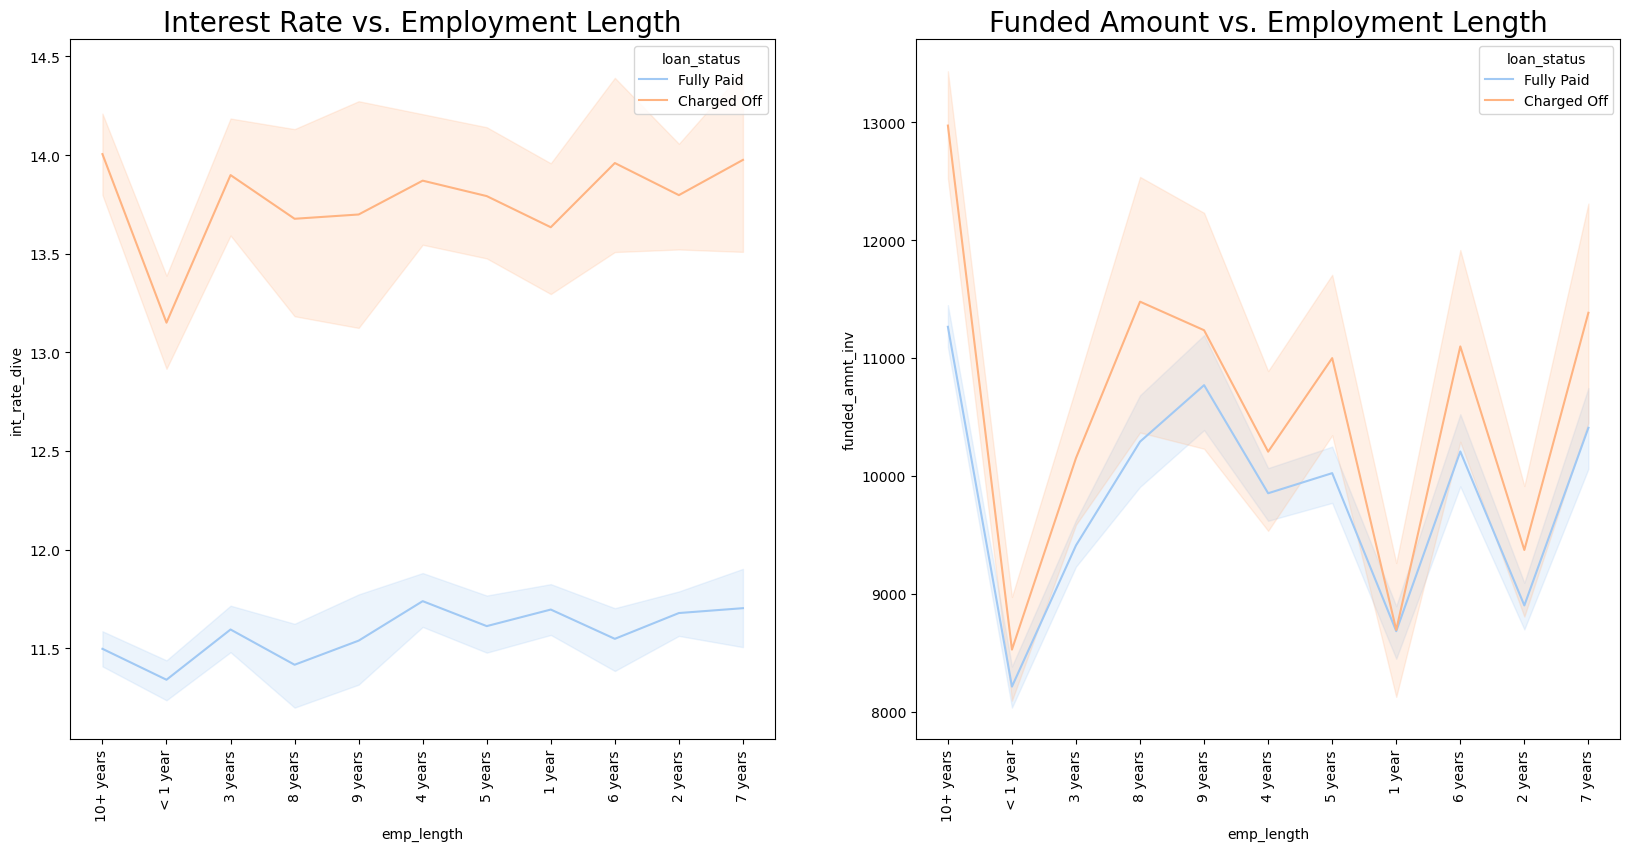

In [118]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.lineplot(data =ld,y='int_rate_dive', x='emp_length', hue ='loan_status',palette="pastel")
plt.xticks(rotation=90)
plt.title('Interest Rate vs. Employment Length', size=20)
plt.subplot(2,2,2)
sns.lineplot(data =ld,y='funded_amnt_inv', x='emp_length', hue ='loan_status',palette="pastel")
plt.xticks(rotation=90)
plt.title('Funded Amount vs. Employment Length', size=20)
plt.show()

#### Observation :
- Full Paid and Charged Off Loans are consistent across Employment Length.
- Interest Rates are consistent across the Employment Length for both Full Paid and Charge Off Loans.
- Interest Rates for Charged Off Loans is significantly higher than Fully Paid Loans.
- Funded Loan Amount is significantly higher for applicants with 10+ years experience in case of both Fully Paid and Charged Off Loans
- 10+ years employment length holds a significant gap between Fully Paid and Charged Off, with Charged Off Loans being higher.
- 10+ years employment length higher charged off loans than the rest.

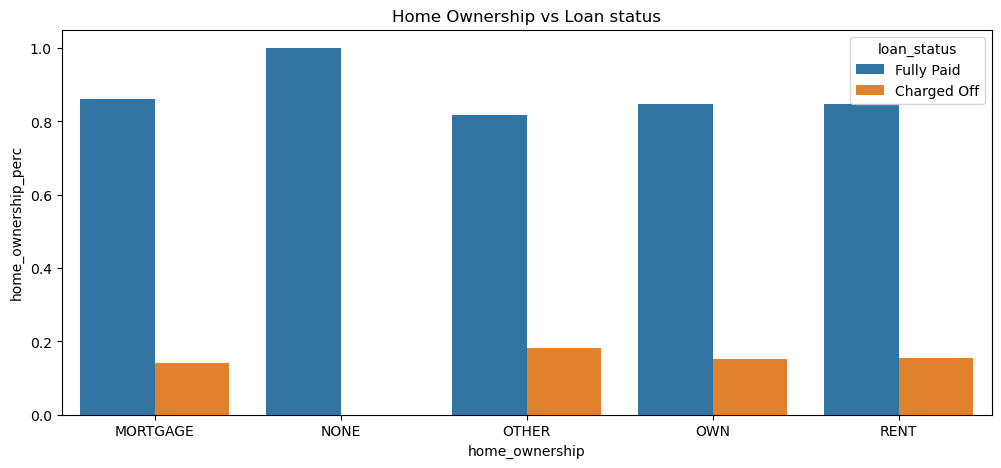

In [119]:
# Lets Check for Home Ownership
df = ld.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['home_ownership_perc'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='home_ownership_perc', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')
plt.show()

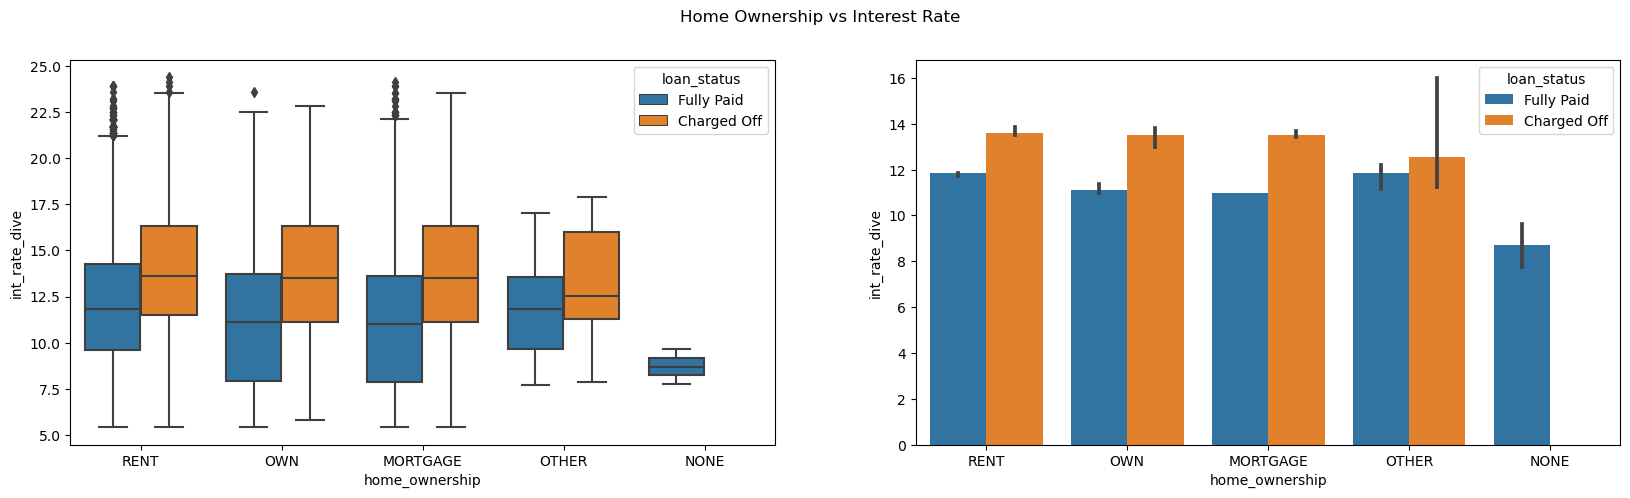

In [120]:
# Home Ownership vs. Interest Rates
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='home_ownership', y='int_rate_dive', hue='loan_status', data=ld)
plt.subplot(1,2,2)
sns.barplot(x='home_ownership', y='int_rate_dive', hue='loan_status', data=ld, estimator=np.median)
plt.suptitle('Home Ownership vs Interest Rate')
plt.show()

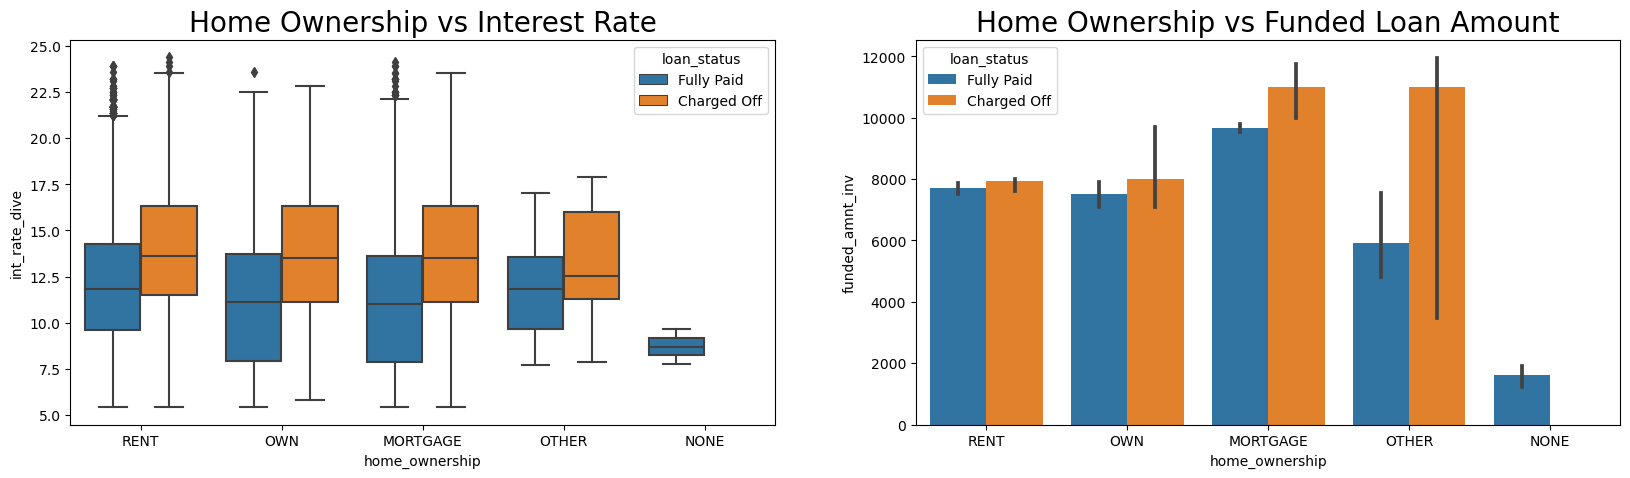

In [121]:
# Home Ownership vs. Funded Loan Amount
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='home_ownership', y='int_rate_dive', hue='loan_status', data=ld)
plt.title('Home Ownership vs Interest Rate', size=20)
plt.subplot(1,2,2)
sns.barplot(x='home_ownership', y='funded_amnt_inv', hue='loan_status', data=ld, estimator=np.median)
plt.title('Home Ownership vs Funded Loan Amount', size=20)
plt.show()

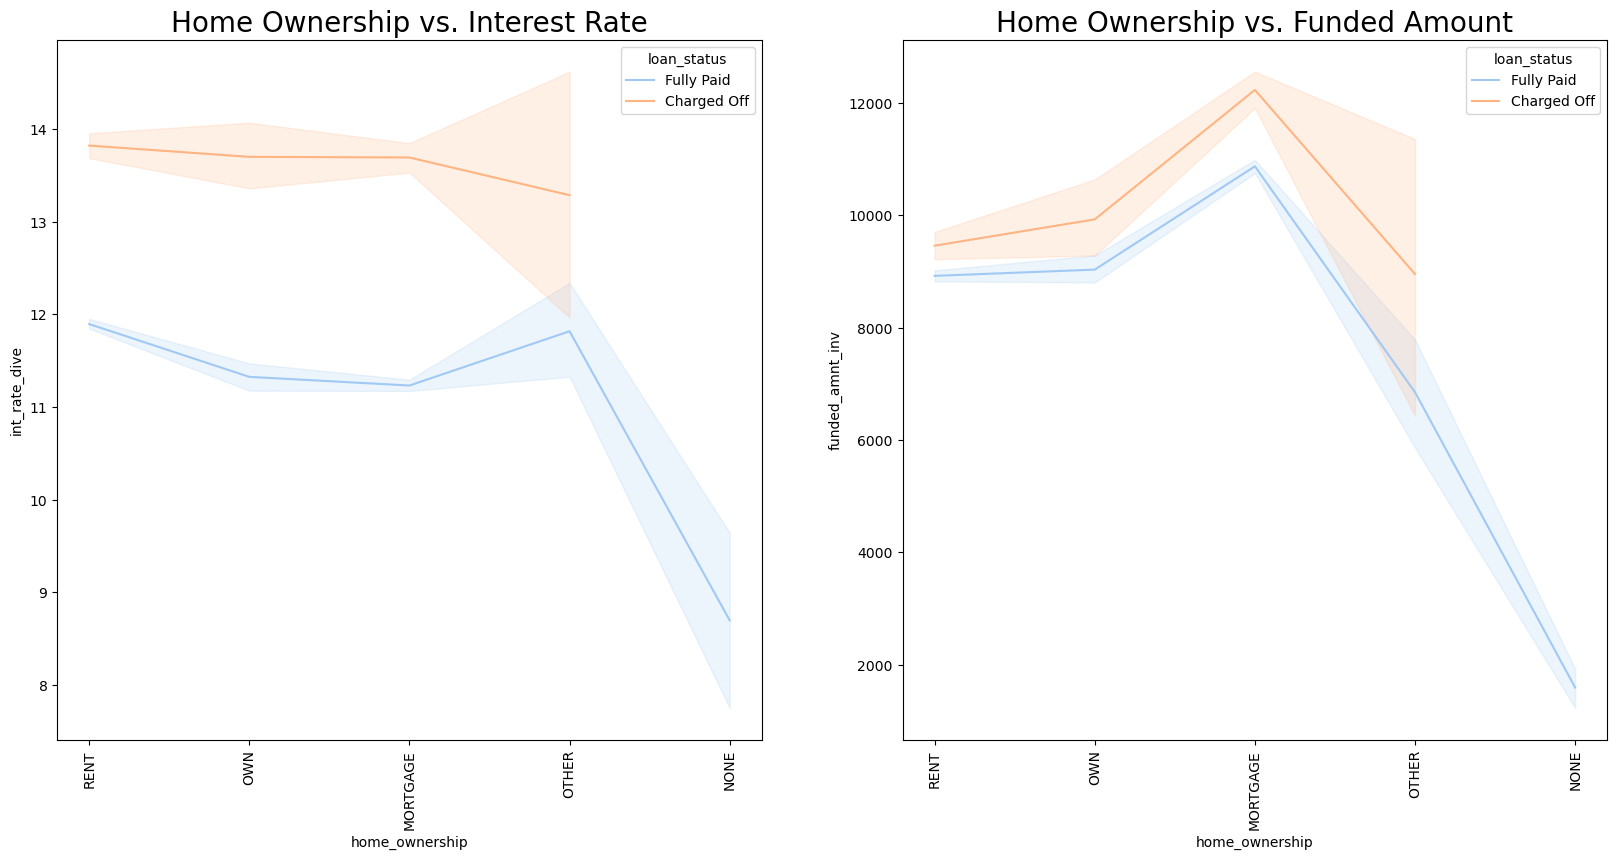

In [122]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.lineplot(data =ld,y='int_rate_dive', x='home_ownership', hue ='loan_status',palette="pastel")
plt.xticks(rotation=90)
plt.title('Home Ownership vs. Interest Rate', size=20)
plt.subplot(2,2,2)
sns.lineplot(data =ld,y='funded_amnt_inv', x='home_ownership', hue ='loan_status',palette="pastel")
plt.xticks(rotation=90)
plt.title('Home Ownership vs. Funded Amount', size=20)
plt.show()

#### Observation :
- Percentage Wise Home Ownership with status as 'Other' have slightly higher Charged Off loans
- Interest rates for Full Paid and Charge Off Loans are similar trend against home ownership categories
    - Interest Rates for Charged Off Loans is higher than the Fully Paid Loans
- Loan Applicants with Home Ownership category as 'Mortgages' have significantly higher funded loan amount.
    - Investors have funded higher loan amount to the applicants with Mortgages.
- Loan Applicants with mortgages are significantly higher defaulters.

<Figure size 640x480 with 0 Axes>

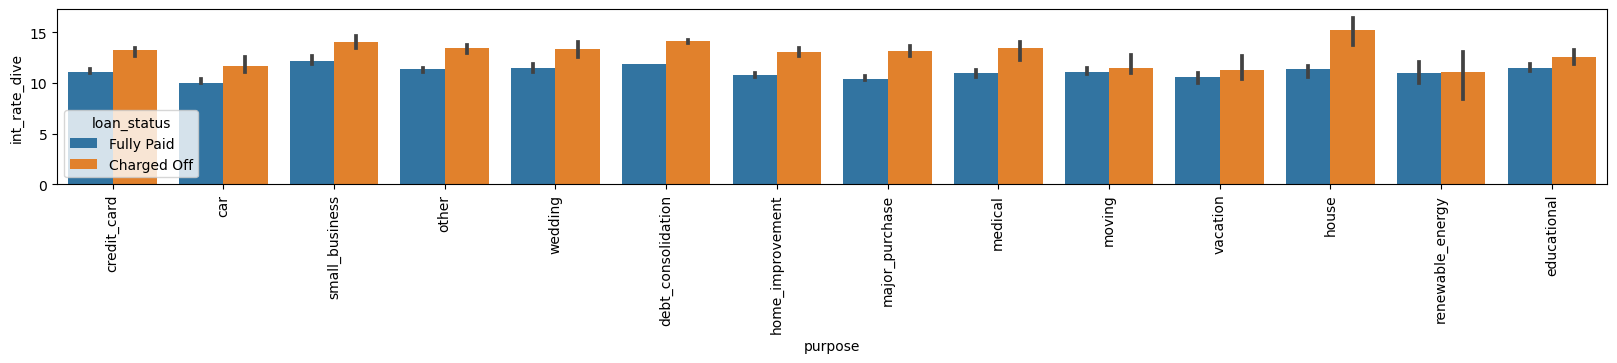

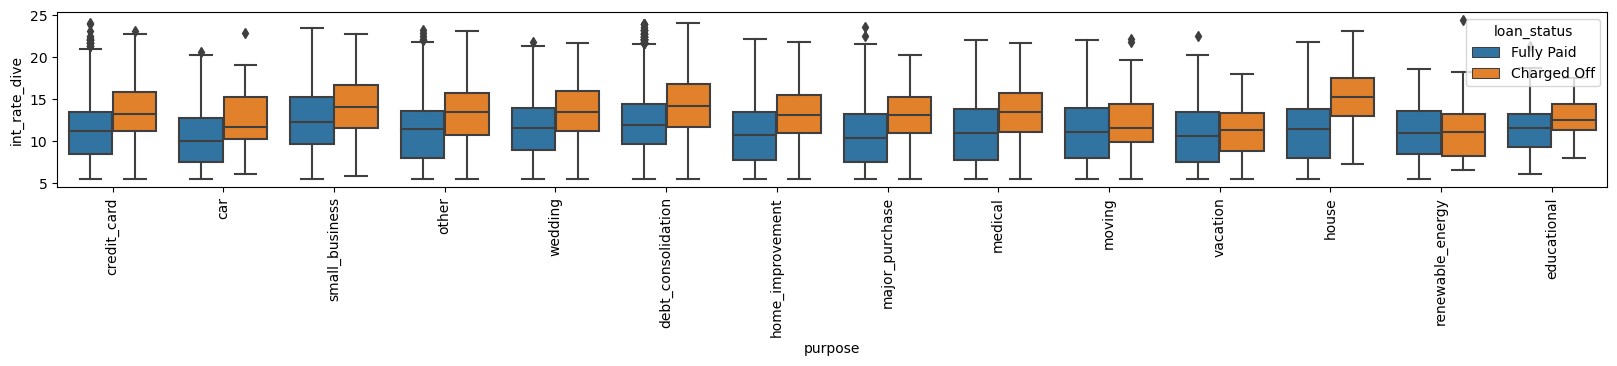

In [123]:
# Does Purpose of loan impact the interest rate of the loan
df = ld.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
#purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose of Loan vs Interest rate')
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.barplot(x='purpose', y='int_rate_dive', hue='loan_status', data= ld, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.boxplot(x='purpose', y='int_rate_dive', hue='loan_status', data= ld)
plt.xticks(rotation=90)
plt.show()

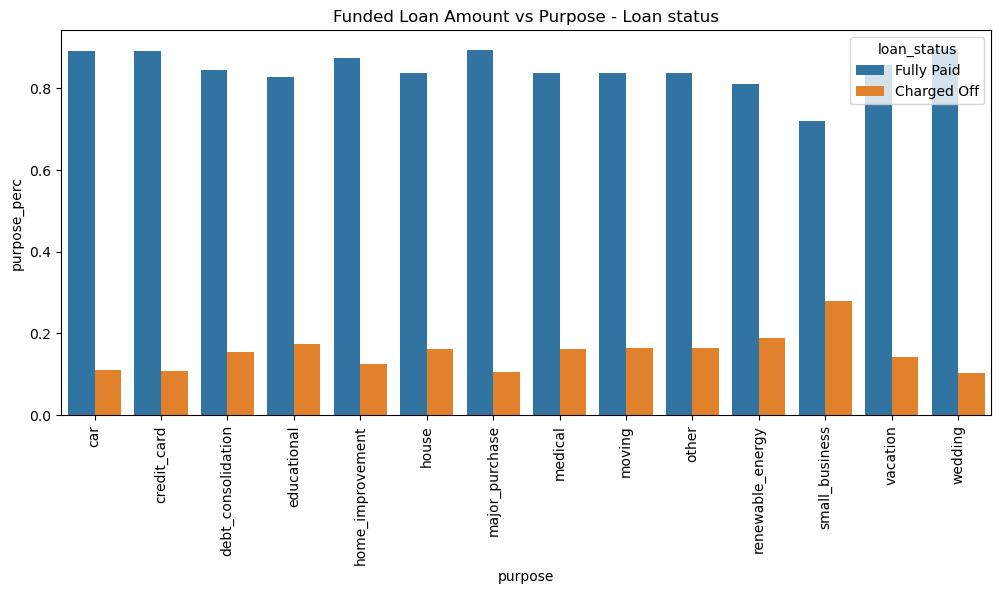

In [124]:
# Purpose of the Loan vs. Loan Status
df = ld.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['purpose_perc'] = df.groupby('purpose').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='purpose_perc', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.xticks(rotation=90)
plt.title('Funded Loan Amount vs Purpose - Loan status')
plt.show()

<Figure size 640x480 with 0 Axes>

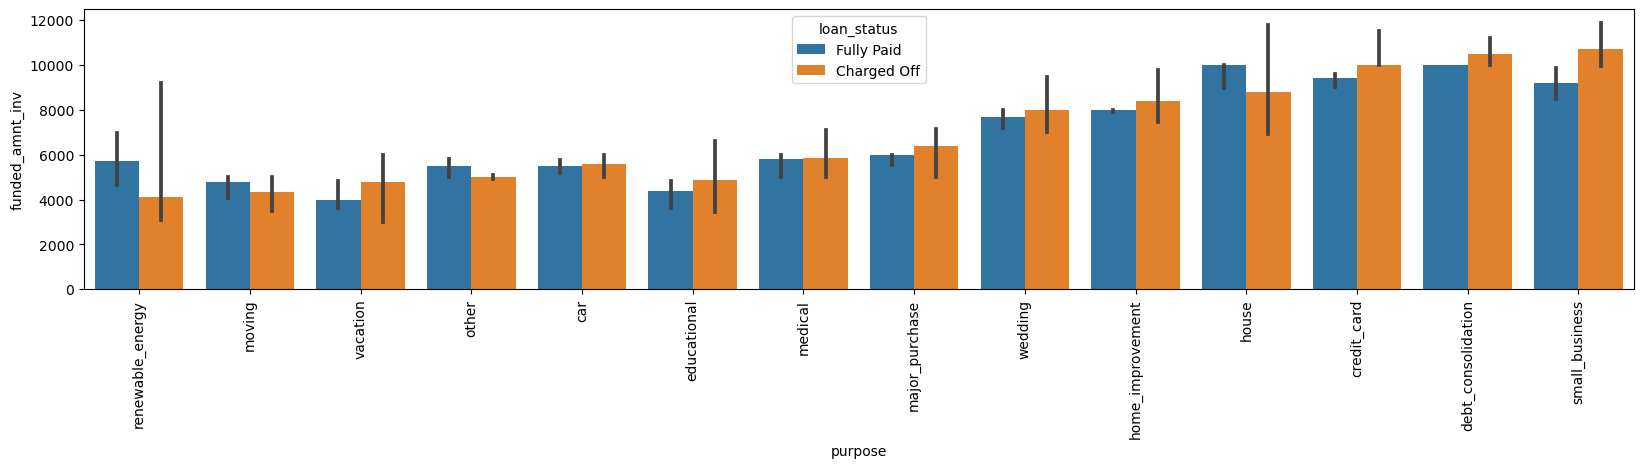

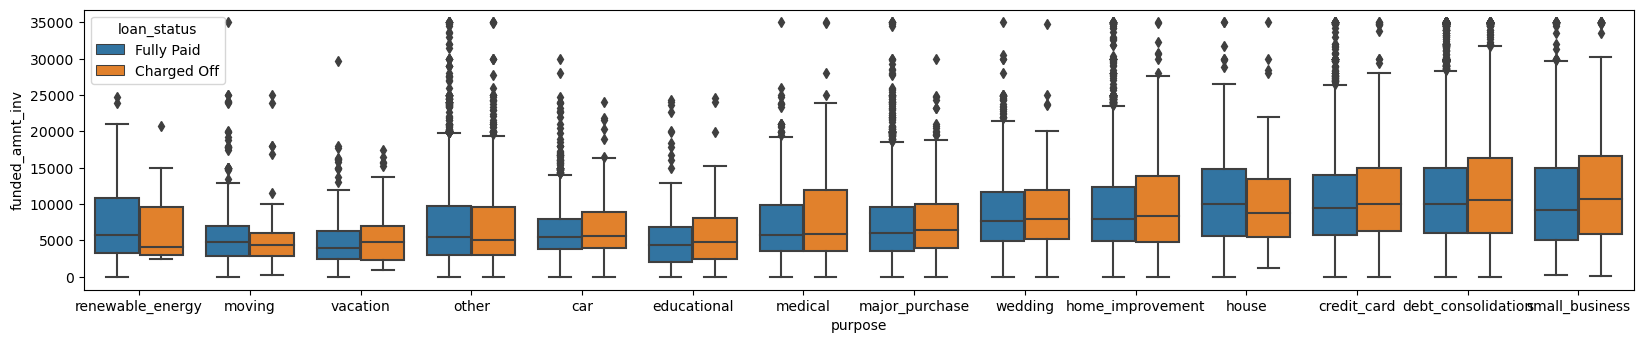

In [125]:
# See the Funded Amount  trend against the Purpose of loan
df = ld.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs Funded Loan amount')
plt.figure(figsize=(20,8))
plt.subplot(211)
sns.barplot(x='purpose', y='funded_amnt_inv', hue='loan_status', data= ld, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,8))
plt.subplot(212)
sns.boxplot(x='purpose', y='funded_amnt_inv', hue='loan_status', data= ld, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

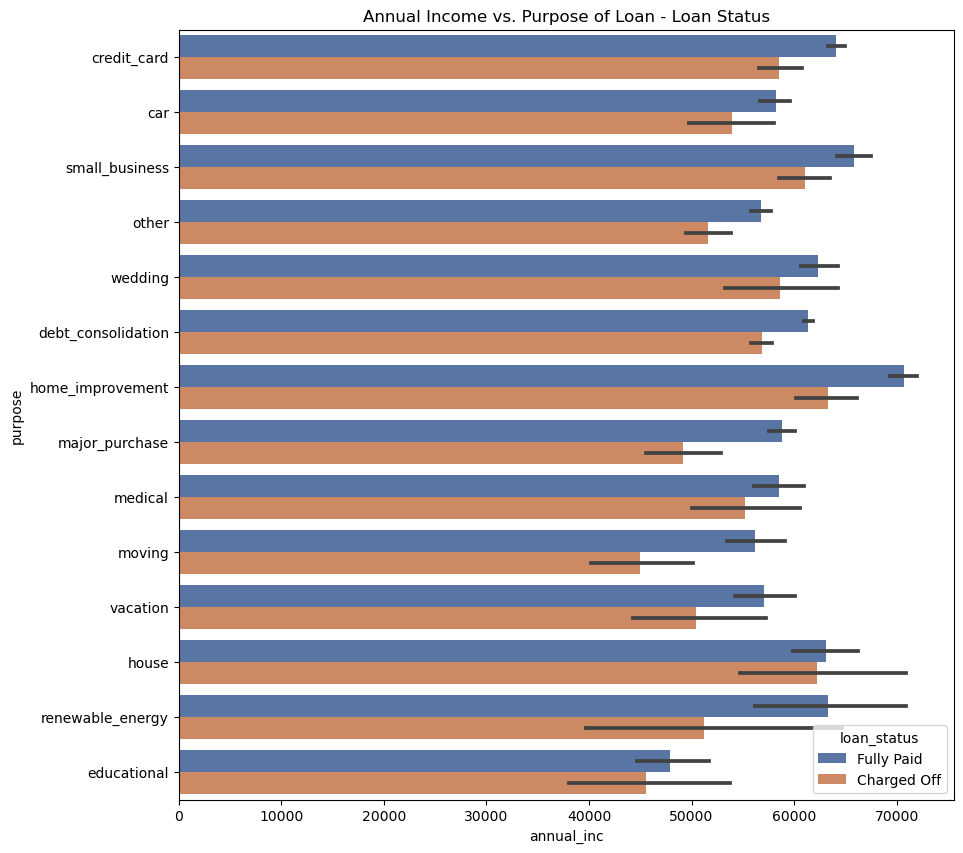

In [126]:
# Annual Income vs Purpose
plt.figure(figsize=(10,10))
sns.barplot(data =ld,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.title('Annual Income vs. Purpose of Loan - Loan Status')
plt.show()

In [127]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = ld.groupby(['annual_inc_dive', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)



loan_status    annual_inc_dive  Charged Off  Fully Paid  Total  \
1                 5000 - 10000           18          70     88   
2                10000 - 20000          217         865   1082   
0                     0 - 5000            2           8     10   
3                20000 - 30000          602        2769   3371   
4                30000 - 50000         1774        9065  10839   
5                50000 - 75000         1686        9981  11667   
6               75000 - 100000          736        5303   6039   
7              100000 - 200000          383        3175   3558   
8              200000 - 300000            0           0      0   
9              300000 - 500000            0           0      0   
10             500000 - 800000            0           0      0   
11            800000 - 1000000            0           0      0   
12           1000000 - 1500000            0           0      0   
13                   > 1500000            0           0      0   

loan_status  Chargedoff_Proportion  
1                         0.204545  
2                         0.200555  
0                         0.200000  
3                         0.178582  
4                         0.163668  
5                         0.144510  
6                         0.121874  
7                         0.107645  
8                              NaN  
9                              NaN  
10                             NaN  
11                             NaN  
12                             NaN  
13                             NaN

#### Observation :
- Defaulted Loans have higher percentage (Funded Amount with purpose of loan as Small Business Percentage
- Funded Amount is higher for House, Credit Card, Debt Consolidation, Small Business.
    - Small Business and Debt Consolidation have higher Charged Off when compared to others
- Defaulter are higher interest rates in case the purpose of the loan is House
    - Followed by Small Business and Debt Consollidation
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### Correlation Heat Map for Loan Dataset

In [128]:
# Creating Dataframe for select columns for which we need headmap
corr_df = ld[['loan_amnt','funded_amnt_inv','annual_inc', 'dti', 'installment','pub_rec','pub_rec_bankruptcies_dive', 'revol_util_dive','emp_length_dive','open_acc','int_rate_dive', 'loan_status_dive']]

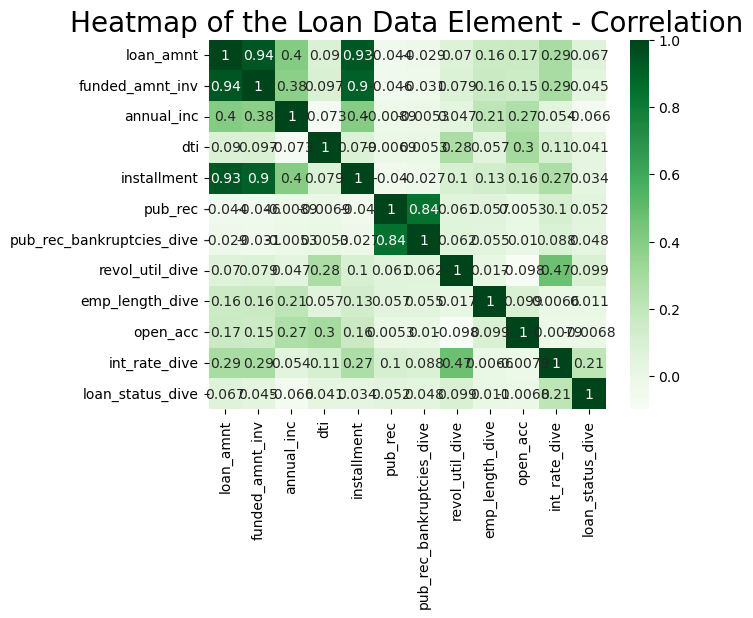

In [129]:
#Heatmap Creation / Generation
sns.heatmap(corr_df.corr(),annot=True, cmap='Greens')
plt.title('Heatmap of the Loan Data Element - Correlation', size=20)
plt.show()

#### Observation :
- Positive Correlation between Loan Amount Requested, Funded Anount and Installment.
- Positive Correlation for loan applicants with Public Derogatory records and Public Bankruptcy Records
- Interest Rate is higher for applicants with revolving line utilization rate (revolving credit line).

## !!*********************End of Analysis**************************!!

## Observation Summary :
#### Following are observations based on the analysis of charged off loans. The probability of defaulting is high when:
- Applicants are availing loan for Home Improvement and have high Annual Income Range (60K - 70K)
- Applicants with Annual Income range between 35k - 70k and availing loan for Debt Consolidation.
- Higher Annual Income Range applicants are disbursed loans with higher interest rates.
- Higher Loans amounts are disbursed with higher interest rates (>= 14%).
    - Note: Fully Paid Loans across all Annual Income Range, Grades are arougn 10% - 12%
- Loan applicant with Home Ownership is Mortgage and avail higher loan amount (>=14K) with high interest rate (>14%)
- Loan Applicants with Grade F or G, and are sanctioned higher loan amount (> 14K) with high interest rate (>14%)
    - Note: Important to take note of the Grades, as loan applicants with smaller loan amount and interest are also in these Grade but have fully paod loans. But it is likely that if same applicant requests for higher loan amount (>=14k), the loan sanctioned will be with higher interest rate (>14%)
- Loan Applicants with Verified status and with loan sanction is >=14K
- Loan Applicant in Grade G and high interest rate (>15%)
- Loan Applicants with >10 years of experience and sanction higher loan amount (> 10K) with high interest rate (>14%)
- Loan Applicants with purpose of Debt Consolidation or Small Business, and when santioned higher loan amount (>=14K) with high interest rate (>14%)
